<a href="https://colab.research.google.com/github/krittikaroy0/CSE303/blob/main/Group_01_Mini_Project_CSE303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part A (Analysis of the Given Dataset)**

Dataset Description: Titanic Dataset

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard 
6.	'Parch':  parents/children aboard 
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv (without output (Survived)))
3.  test set output (Survived) given in this csv file (gender_submission.csv)

\\
The training set should be used to build your machine-learning models. 

The test set should be used to see how well your model performs on unseen data.







## 1. Provide an overview of the given Dataset including the Dataset Characteristics and Exploratory Data Analysis, data preprocessing and performance of different ML models. This section should be written after completing Part A. 

**Write Here**

The dataset provided is the Titanic dataset. The goal is to find out whether someone will survive from this accident based on some condition based on a given dataset. The dataset is divided into two categories: train and test. We don't need to divide it further. We will use the train dataset to perform the analysis and find out which features of the dataset are relevant for our model
We have analyzed our dataset, it contains some zero values, some are huge in certain features, small in others. We need to replace the null values by using the mode and median for the others for the age. At first we wanted to use a mean and standard deviation based method to fill null values in the age column, then we found that we have some outliers. Then we moved to the median, since it gives better results than the mean and mode in this case.

Then the duplicate values are dropped, cabin column is also dropped because it has too many null values and at the same time, we don't need this feature to build our model. We encoded the categorical values numerically, since we need numerical values to train and test our model. We have done some analysis on the columns, to show how they are related to each other, we have created heatmaps from the correlation matrix.

After all the cleaning for the train dataset, we did the same steps for the test dataset And when that's done cleaning, it's time to build our model.
As mentioned above, we want to predict whether or not someone will survive. It is a binary outcome, yes or no. So we chose logistic regression to train our model. We built 3 models, one with default parameters, the other two with some changed values.
Finally we checked the accuracy score for each of the model we built.

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable (hints: heatmap, groupby, etc) with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need). Note, we will be watching for copy-paste here.

### 2.1 Load, view data and show analysis on data. Be creative. Investigate like a detective.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
gender_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

In [ ]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())

'Train Data:'

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

'Test Data:'

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

'Gender Data:'

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [ ]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [ ]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df = pd.concat([train_data, gender_test])
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
print(df.info())
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

In [ ]:
# Count rows and coulums
df.shape

(1309, 12)

In [ ]:
# Total cells in the dataset
print('Total cells:', df.size)


Total cells: 15708


In [ ]:
df.iloc[[0]]

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S

In [ ]:
df.describe()

PassengerId     Survived       Pclass          Age        SibSp  \
count  1309.000000  1309.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000     0.377387     2.294882    29.881138     0.498854   
std     378.020061     0.484918     0.837836    14.413493     1.041658   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     328.000000     0.000000     2.000000    21.000000     0.000000   
50%     655.000000     0.000000     3.000000    28.000000     0.000000   
75%     982.000000     1.000000     3.000000    39.000000     1.000000   
max    1309.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

In [ ]:
print(df.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.020370 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.020370  1.000000 -0.264710 -0.053695  0.002370  0.108919   
Pclass         -0.038354 -0.264710  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.053695 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224  0.002370  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.108919  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.233622 -0.558629  0.178740  0.160238  0.221539   

                 Fare  
PassengerId  0.031428  
Survived     0.233622  
Pclass      -0.558629  
Age          0.178740  
SibSp        0.160238  
Parch        0.221539  
Fare         1.000000  


<ipython-input-1231-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


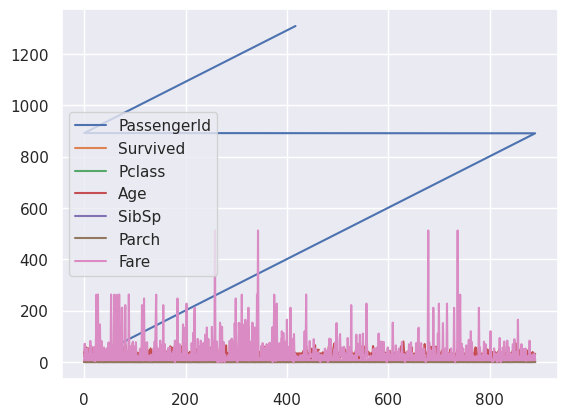

In [ ]:
df.plot()
plt.show()

Text(0, 0.5, 'Frequency')

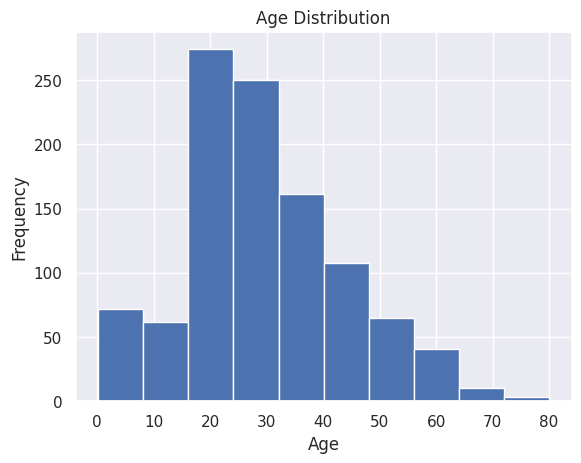

In [ ]:
df['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

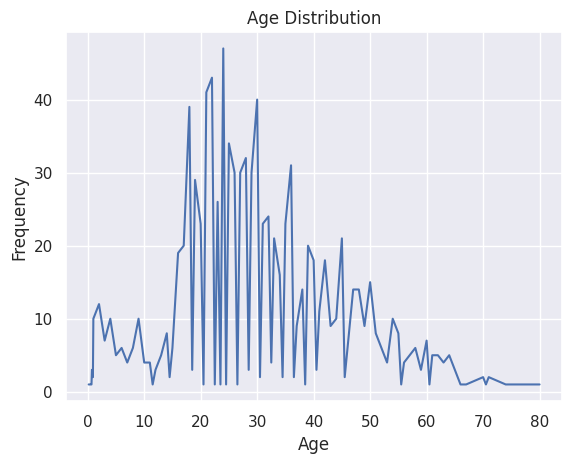

In [ ]:
plt.plot(df['Age'].value_counts().sort_index())
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 1309, dtype: bool

In [ ]:
duplicates_df = df[df.duplicated()]
print(duplicates_df)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


#### Identifying missing values


In [ ]:
# Find the amount of missing values in each column
missing_values = df.isnull()
missing_values

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  False   True  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
413  False   True     False  
414  False  False     False  
415  False   True     False  
416  False   True     False  
417  False   True     False  

[1309 rows x 12 columns]

In [ ]:
missing_counts = df.isnull().sum()
missing_counts

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
# Calculating the percentage of missing values:
percent_missing = (df.isnull().mean() * 100)
print(percent_missing)


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64


#### Visualisation of missing data


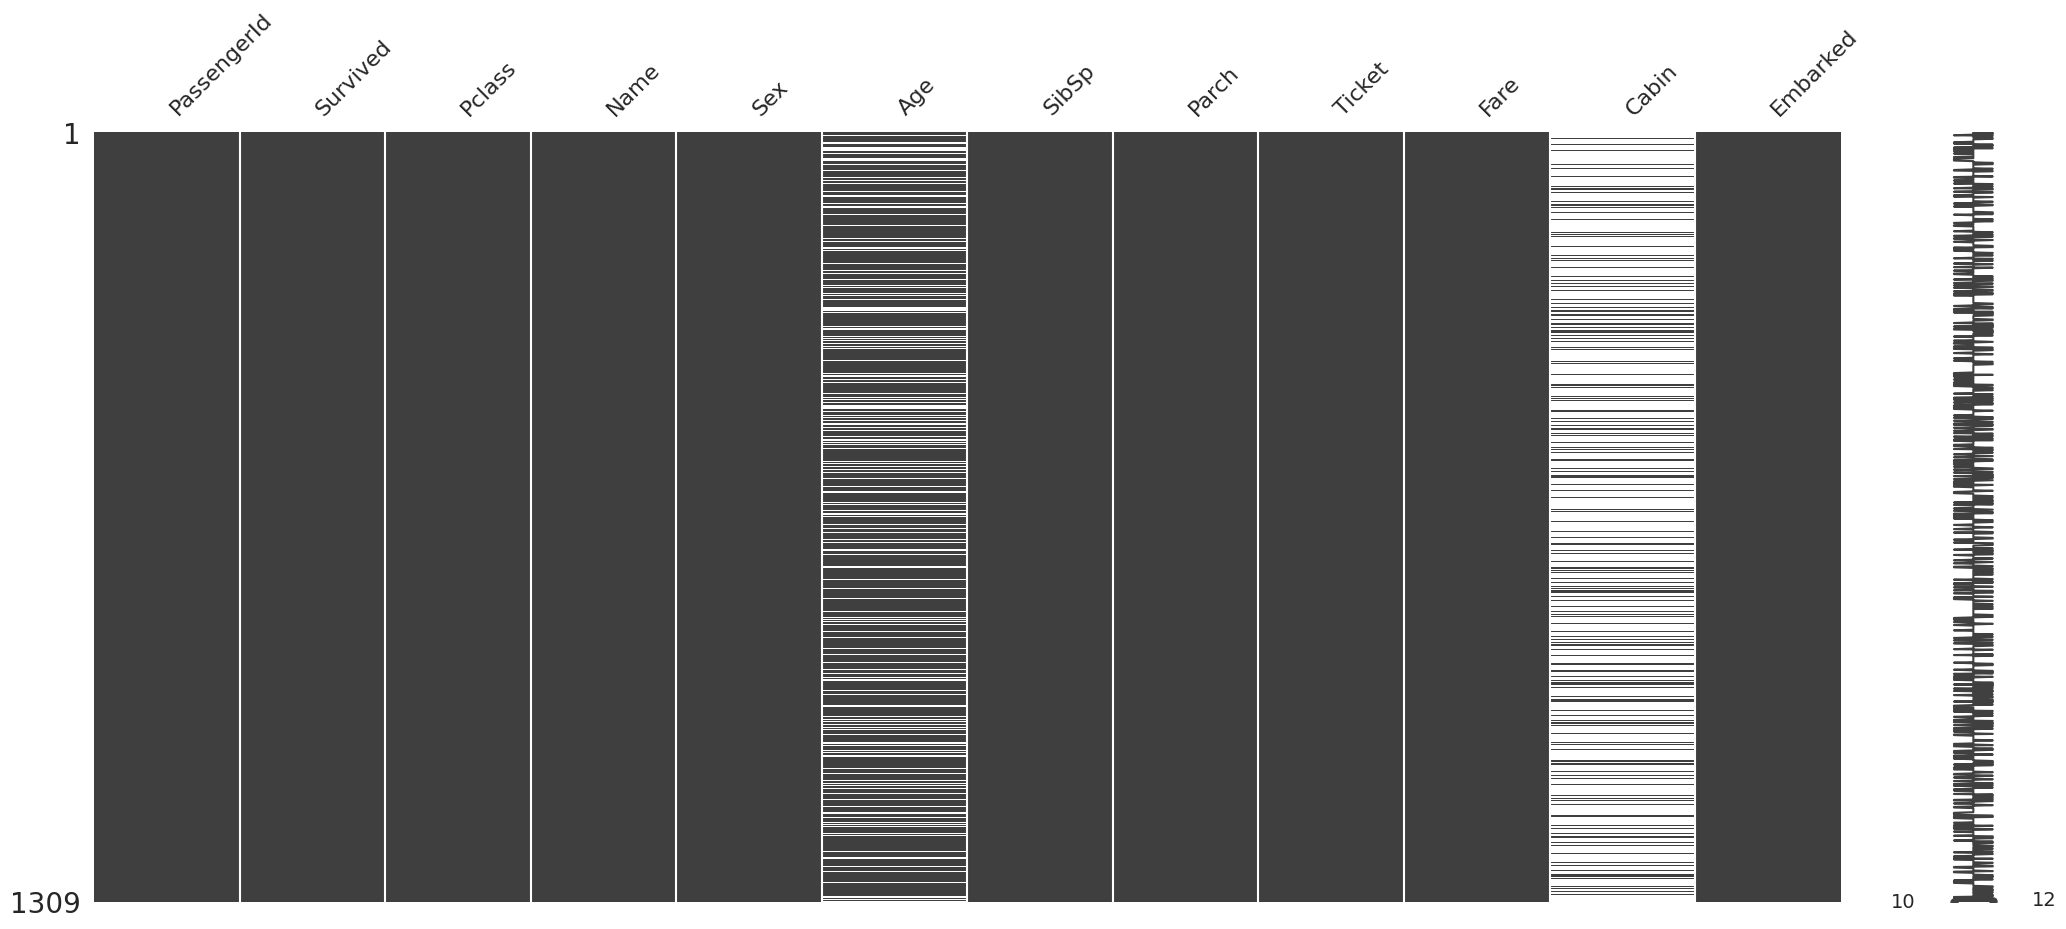

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

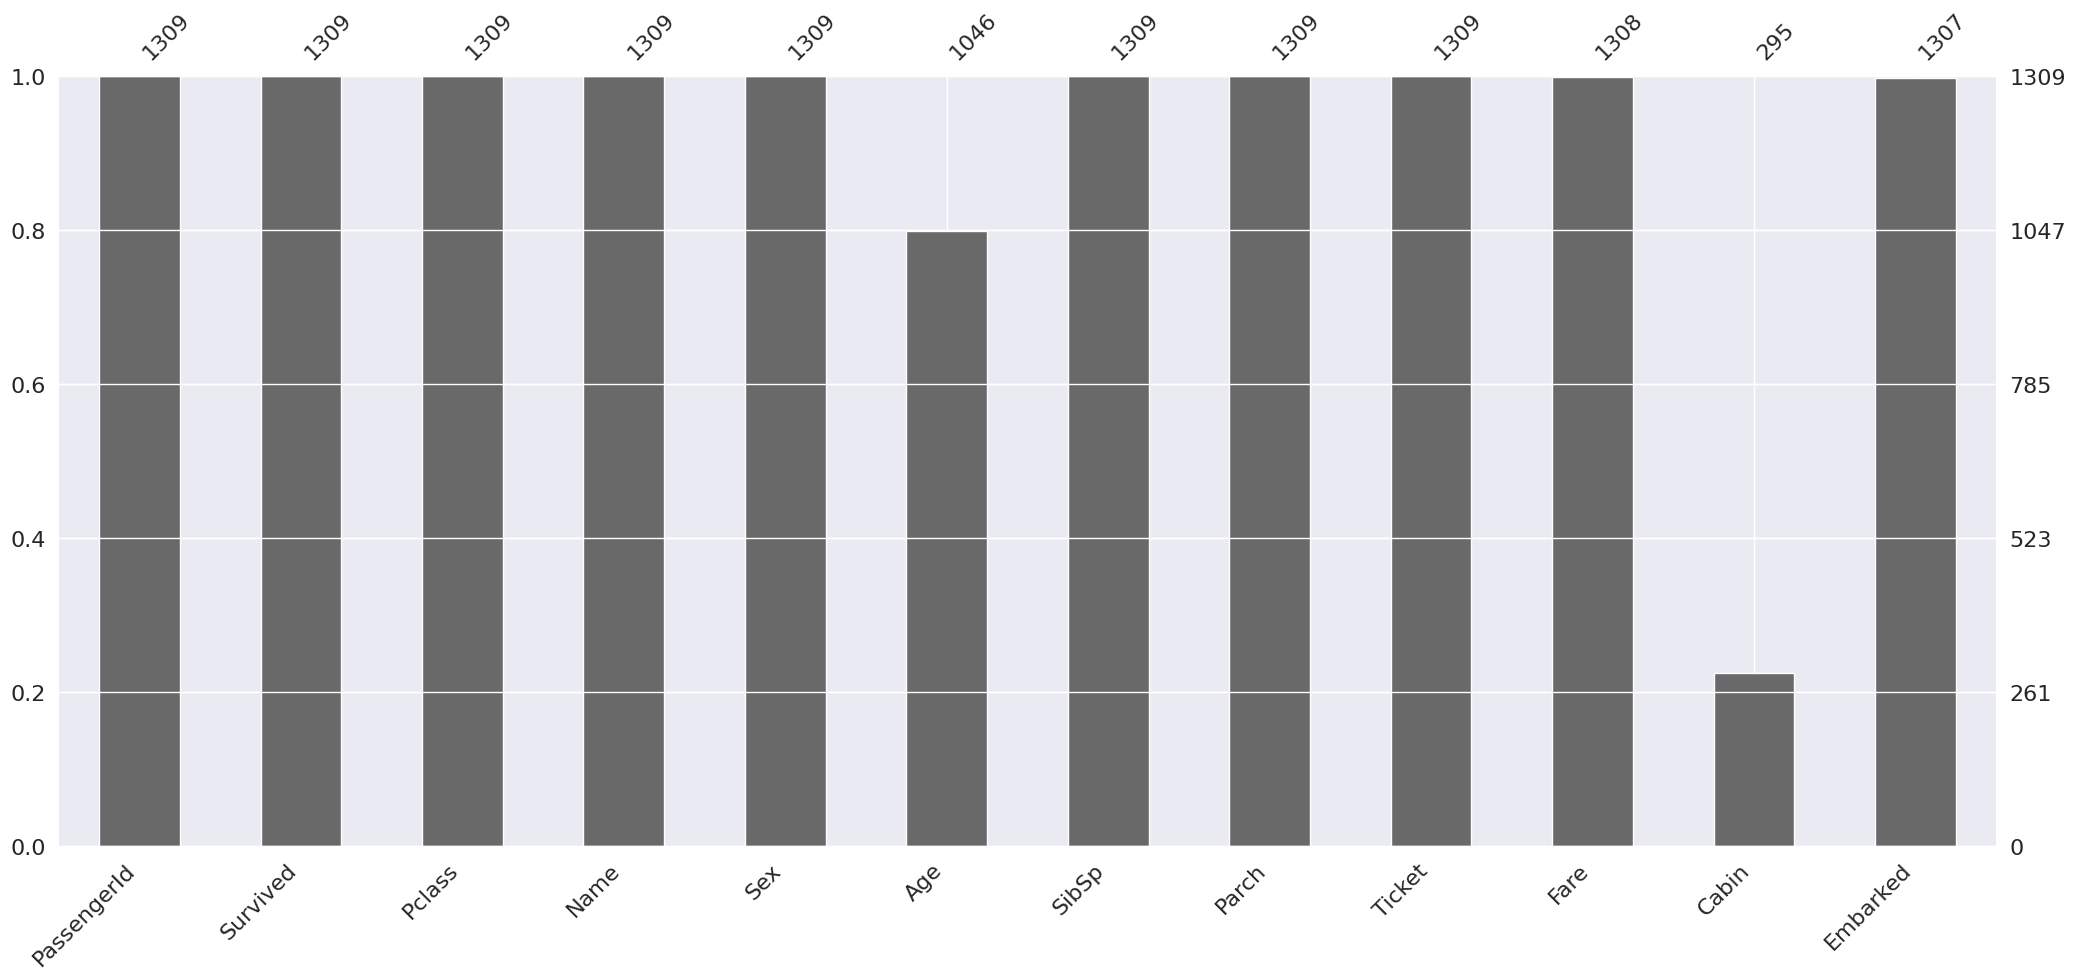

In [ ]:
msno.bar(df)
plt.show()

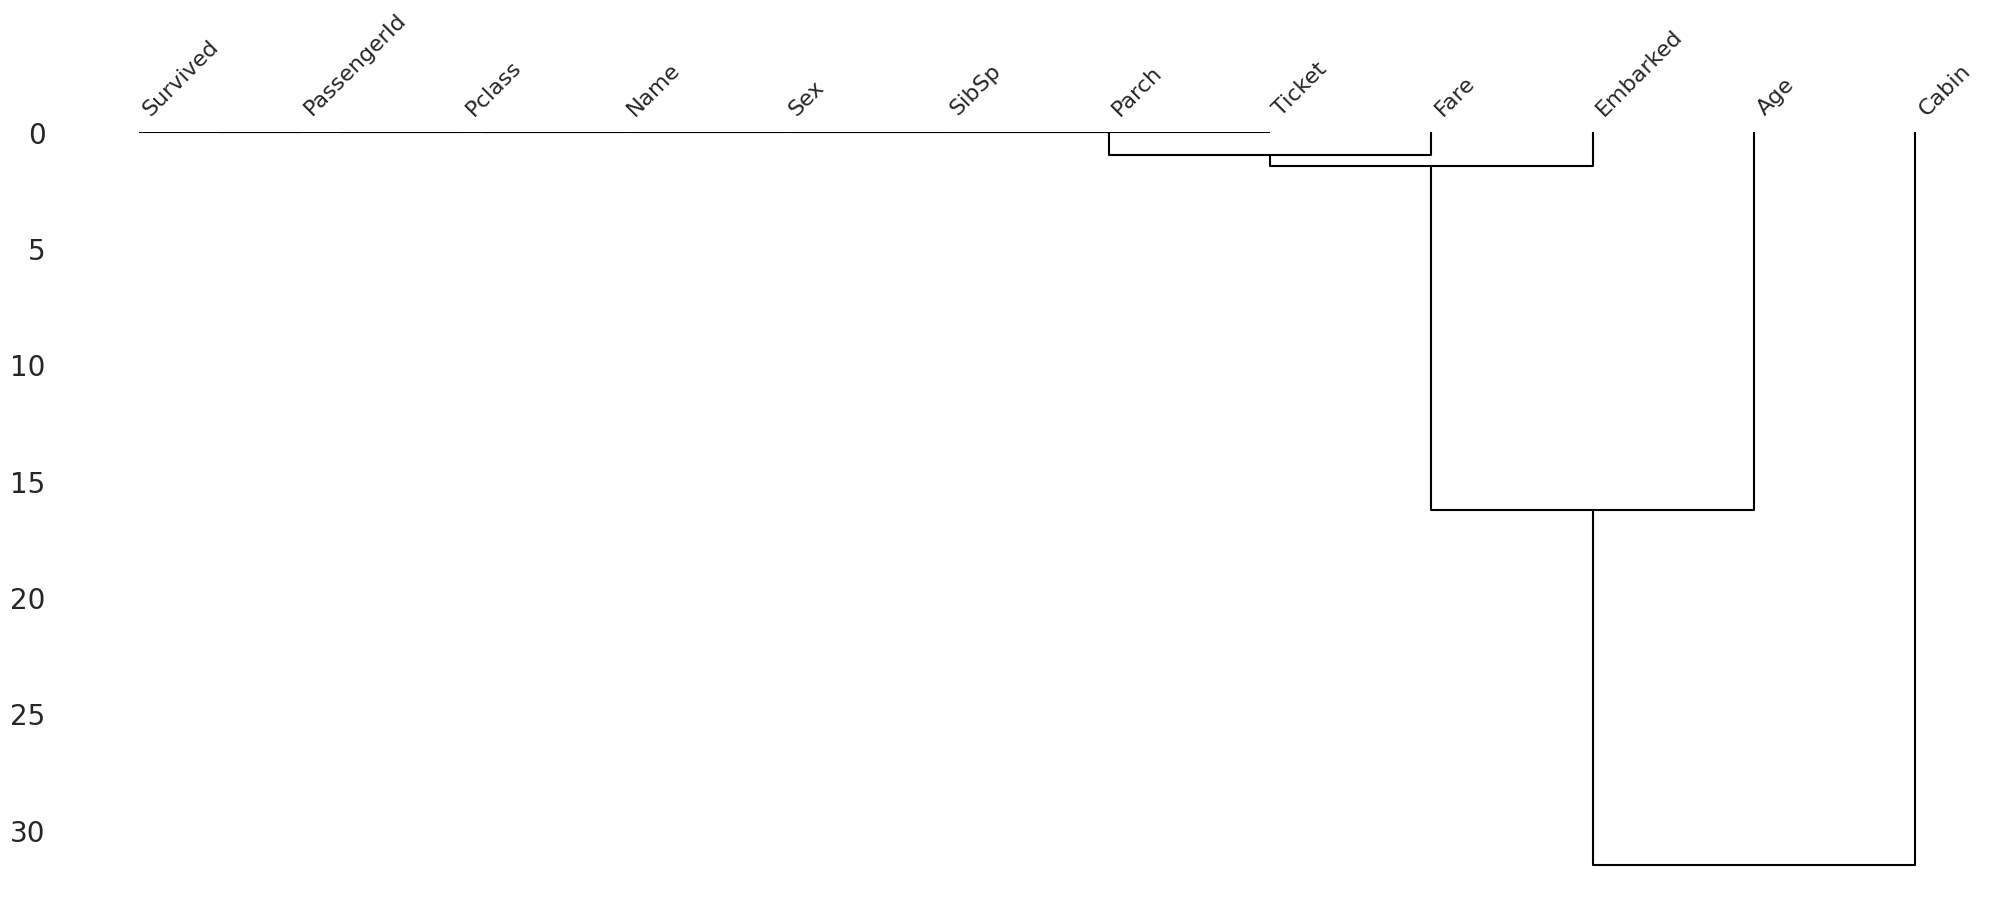

In [ ]:
msno.dendrogram(df)
plt.show()


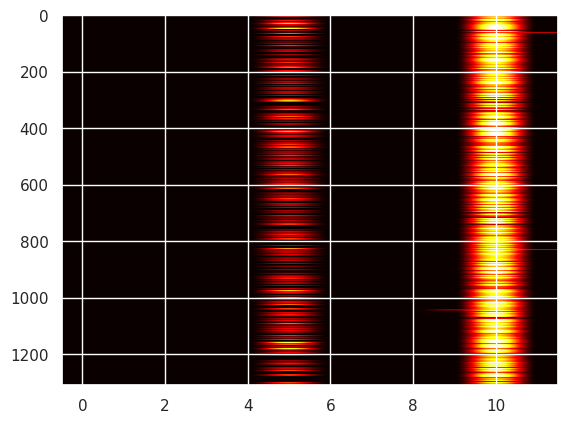

In [ ]:
plt.imshow(df.isnull(), cmap='hot', aspect='auto')
plt.show()

#### Dealing with missing values. Fix the missing value problem.



1.   Do analysis using plots. Fix issues.

2.   Provide an appropriate discussion




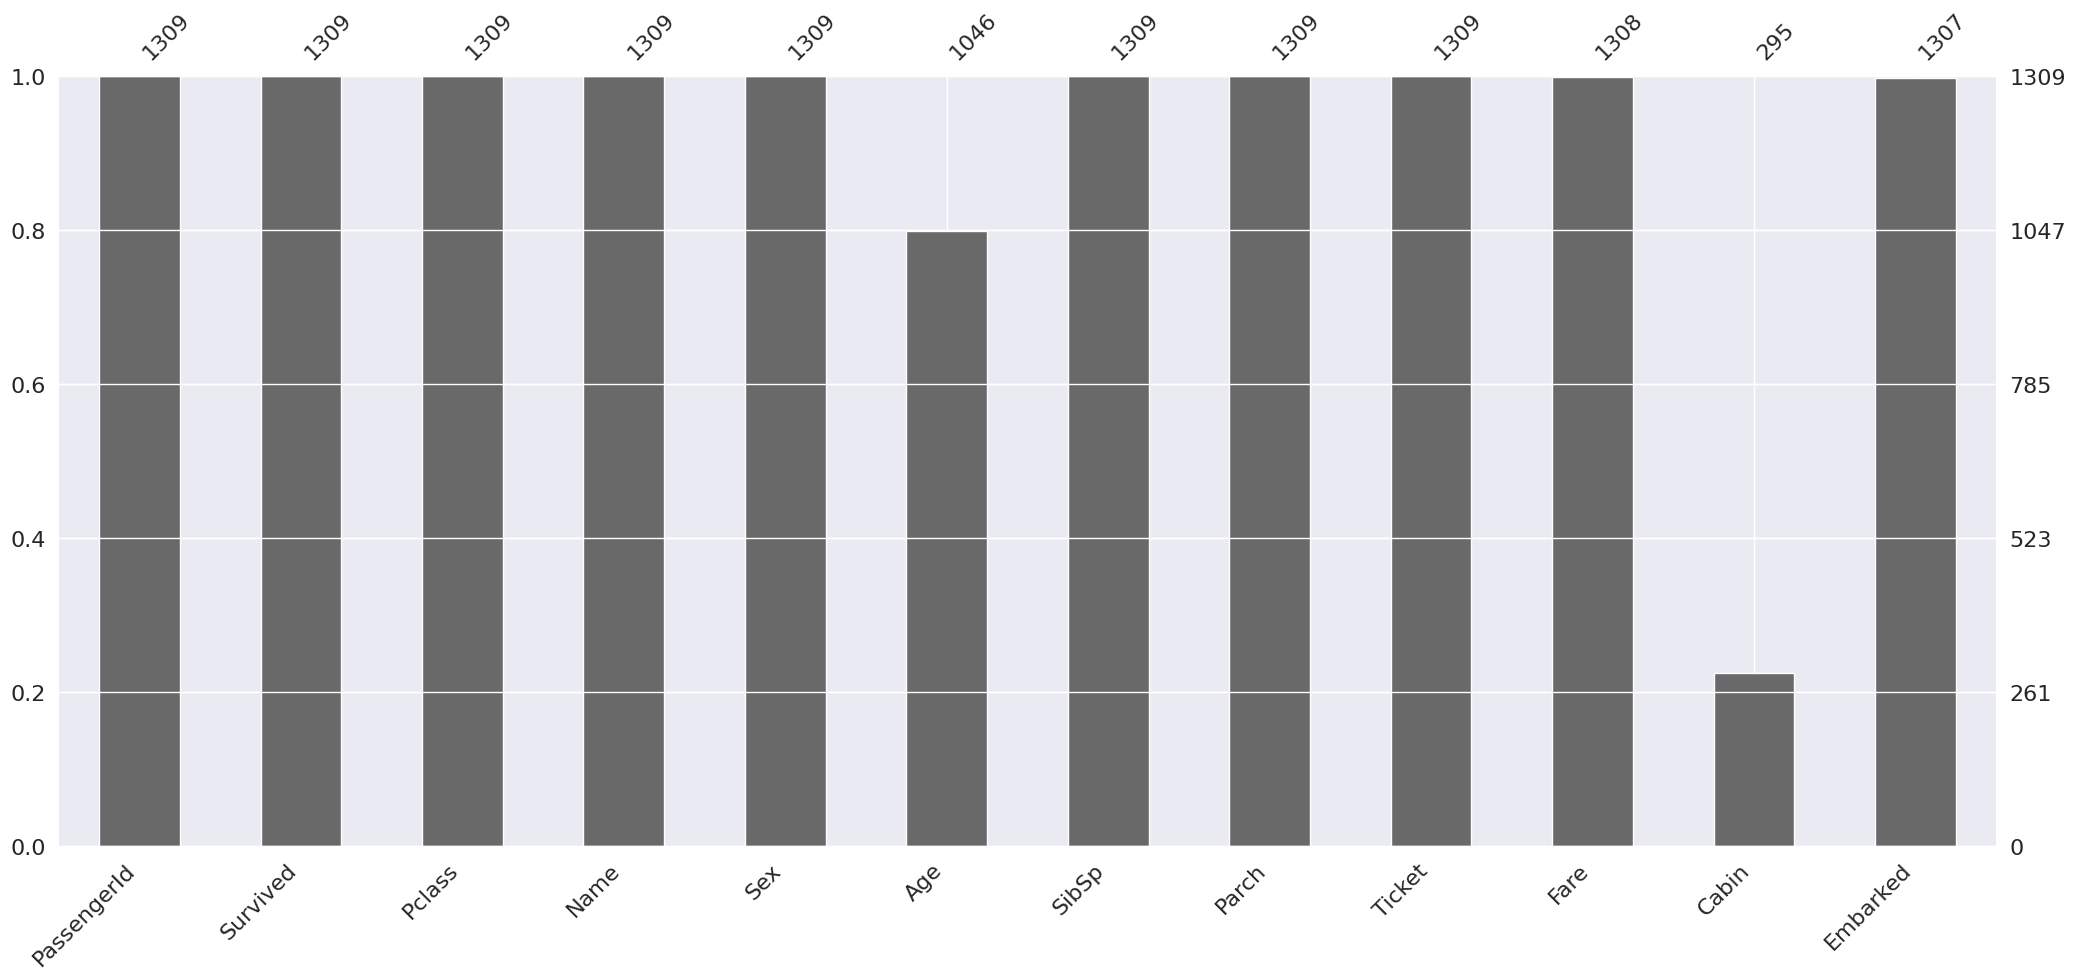

In [ ]:
msno.bar(df)
plt.show()

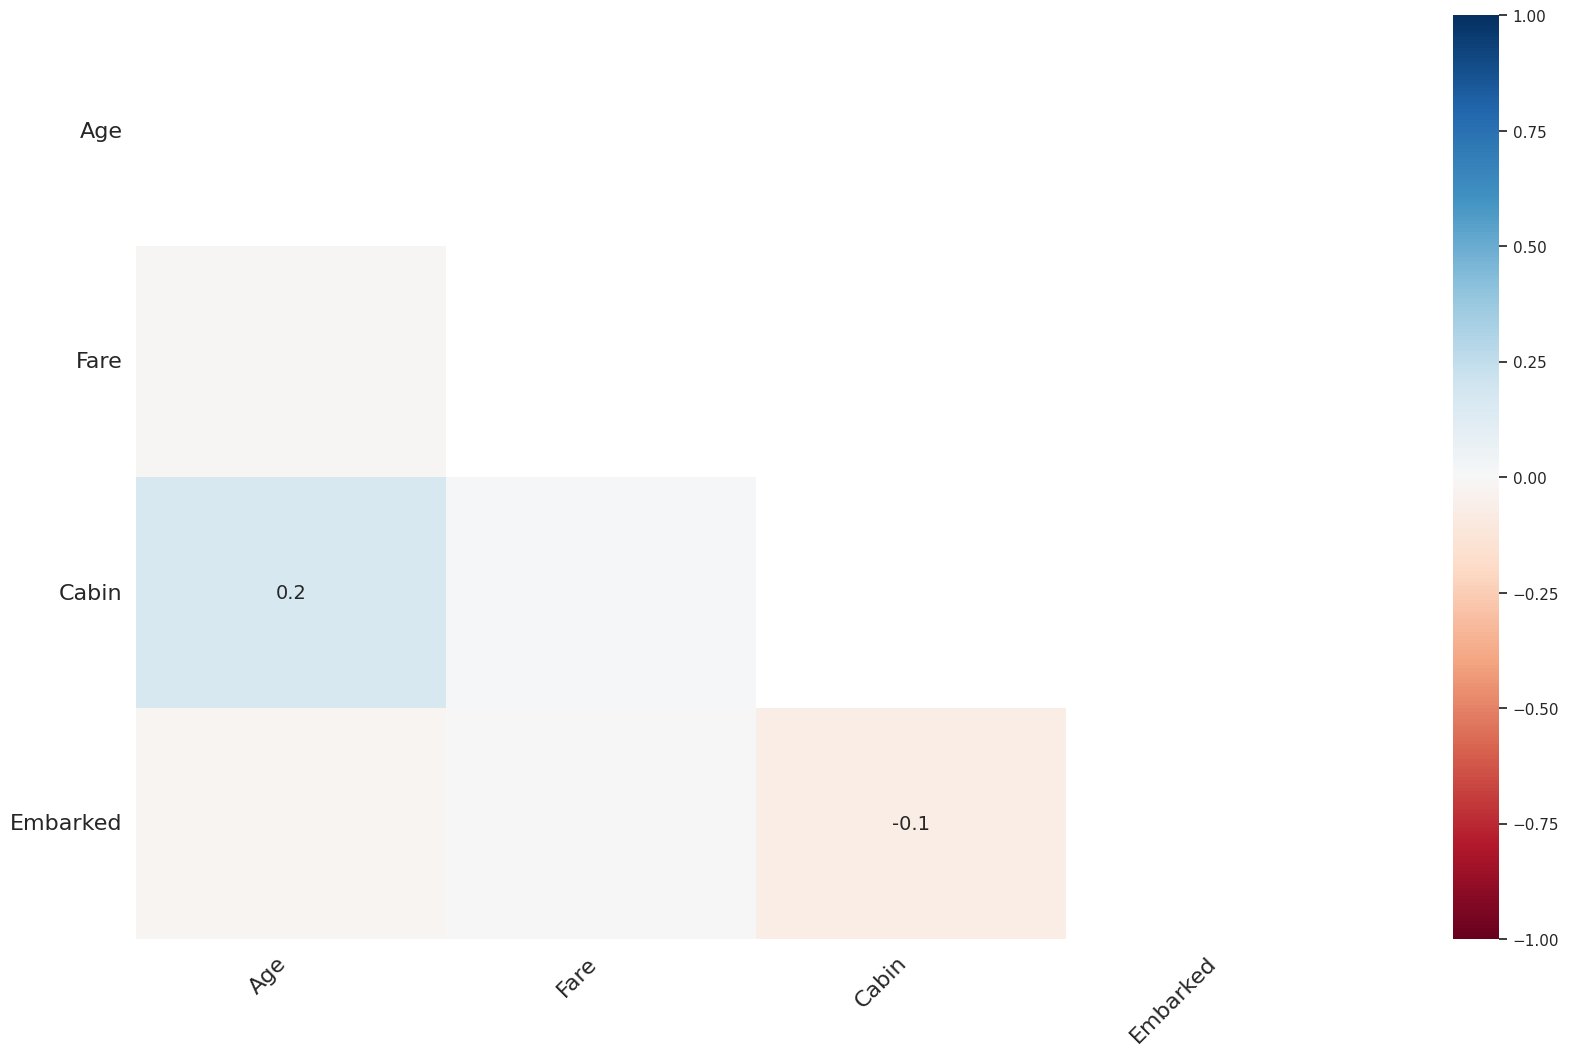

In [ ]:
msno.heatmap(df)
plt.show()

2. Data processing involves dealing with missing values, which can be done in a variety of ways. Displays like plot  and heatmaps can help in locating the columns with missing data and deciding whether to delete, impute, or use more sophisticated imputation algorithms. The method of analysis and the kind of data being looked at are ultimately interrelated.

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df.fillna(df.median(), inplace=True)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

<ipython-input-1247-79b29557a802>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [ ]:
df.fillna(df.mean(), inplace=True)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

<ipython-input-1248-796f99a88417>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


### 2.3 Analysing Patterns using Visualisations

The data type of 'Sex' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'. 

In [ ]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare        Cabin Embarked  Sex_Number  
0      0         A/5 21171   7.2500  C23 C25 C27        S           0  
1      0          PC 17599  71.2833          C85        C           1  
2      0  STON/O2. 3101282   7.9250  C23 C25 C27        S           1  
3      0            113803  53.1000         C123        S           1  
4      0            373450   8.0500  C23 C25 C27        S           0

#### 2.3.1 Visualization of column correlation (use groupby). Also, plot Heat Map

In [ ]:
# Correlation table including the new column 'SexNo'
correlation = df.corr()
correlation

<ipython-input-1250-8a10b226dc37>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.020370 -0.038354  0.025655 -0.055224  0.008942   
Survived       -0.020370  1.000000 -0.264710 -0.031937  0.002370  0.108919   
Pclass         -0.038354 -0.264710  1.000000 -0.397857  0.060832  0.018322   
Age             0.025655 -0.031937 -0.397857  1.000000 -0.186248 -0.113955   
SibSp          -0.055224  0.002370  0.060832 -0.186248  1.000000  0.373587   
Parch           0.008942  0.108919  0.018322 -0.113955  0.373587  1.000000   
Fare            0.031029  0.233837 -0.558740  0.191307  0.160388  0.221668   
Sex_Number     -0.013406  0.688371 -0.124617 -0.045259  0.109609  0.213125   

                 Fare  Sex_Number  
PassengerId  0.031029   -0.013406  
Survived     0.233837    0.688371  
Pclass      -0.558740   -0.124617  
Age          0.191307   -0.045259  
SibSp        0.160388    0.109609  
Parch        0.221668    0.213125  
Fare         1.000000    0.185744  
Sex_Number   0.185744    1.000000

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

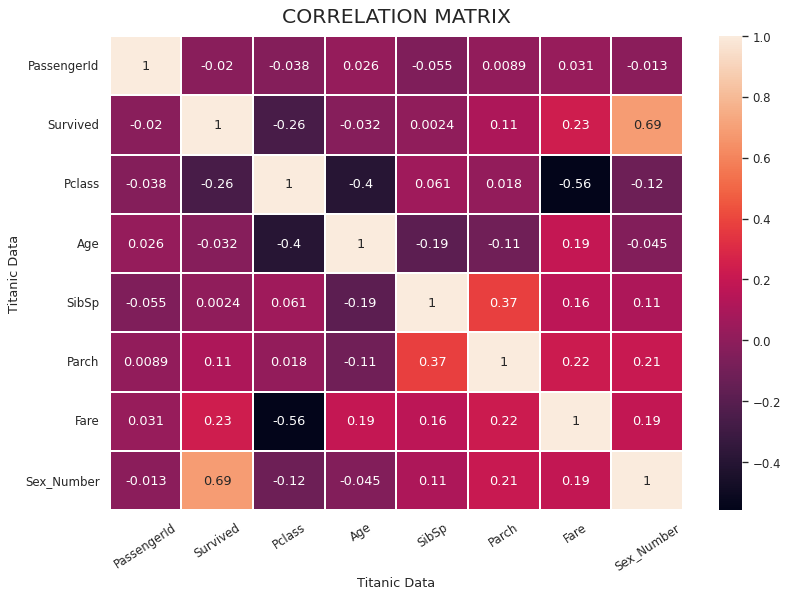

In [ ]:
# Visualisation of the corralation table


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.1)? Write in your own words in this cell.

Write below:
 From the correlation between features we can see that 1.Fare and Pclass are negatively correlated (correlation coefficient -0.56) which means higher fares imply much better ticket classes and vice versa(for lower class). 2.Pclass and our target feature or survived are also negatively correlated(-0.26),so we can say the better the ticket class, higher the chance of survival. 3.Again Pclass and Age are also negatively correlated which implies higher the age,the better the ticket class was. 4.Similar pattern is observed for Age,SibSp and Parch. SibSp and Parch are positively correlated with all other features except age.Both of them are negatively correlated with age features.




#### 2.3.2 Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



In [ ]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  24.0      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  24.0      0   
417                           Peter, Master. Michael J    male  24.0      1   

     Parch              Ticket      Fare        Cabin Embarked  Sex_Number  
0        0           A/5 21171    7.2500  C23 C25 C27        S           0  
1        0            PC 17599   71.2833          C85        C           1  
2        0    STON/O2. 3101282    7.9250  C23 C25 C27        S           1  
3        0              113803   53.1000         C123        S           1  
4        0              373450    8.0500  C23 C25 C27        S           0  
..     ...                 ...       ...          ...      ...         ...  
413      0           A.5. 3236    8.0500  C23 C25 C27        S           0  
414      0            PC 17758  108.9000         C105        C           1  
415      0  SOTON/O.Q. 3101262    7.2500  C23 C25 C27        S           0  
416      0              359309    8.0500  C23 C25 C27        S           0  
417      1                2668   22.3583  C23 C25 C27        C           0  

[1309 rows x 13 columns]

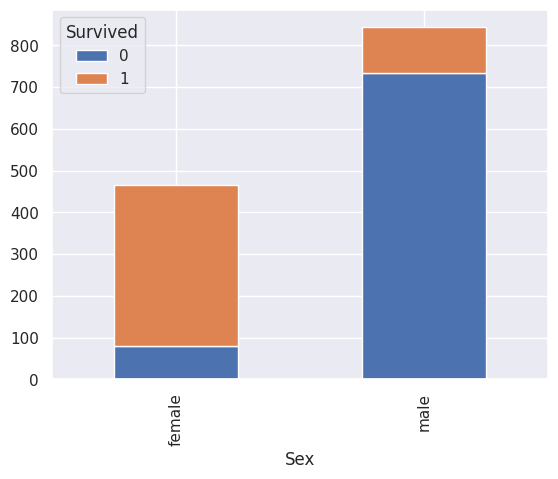

In [ ]:
x = 'Sex'
y = 'Survived'
pd.crosstab(df[x],df[y]).plot(kind='bar', stacked=True)
plt.show()


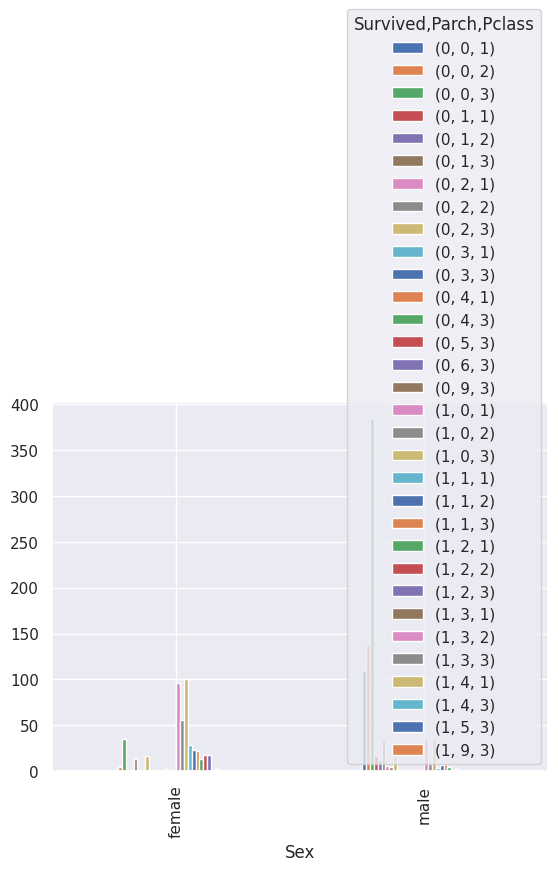

In [ ]:
x = 'Sex'
y = ['Survived', 'Parch', 'Pclass']
ct = pd.crosstab(df[x], [df[col] for col in y])
ct.plot(kind='bar')
plt.show()


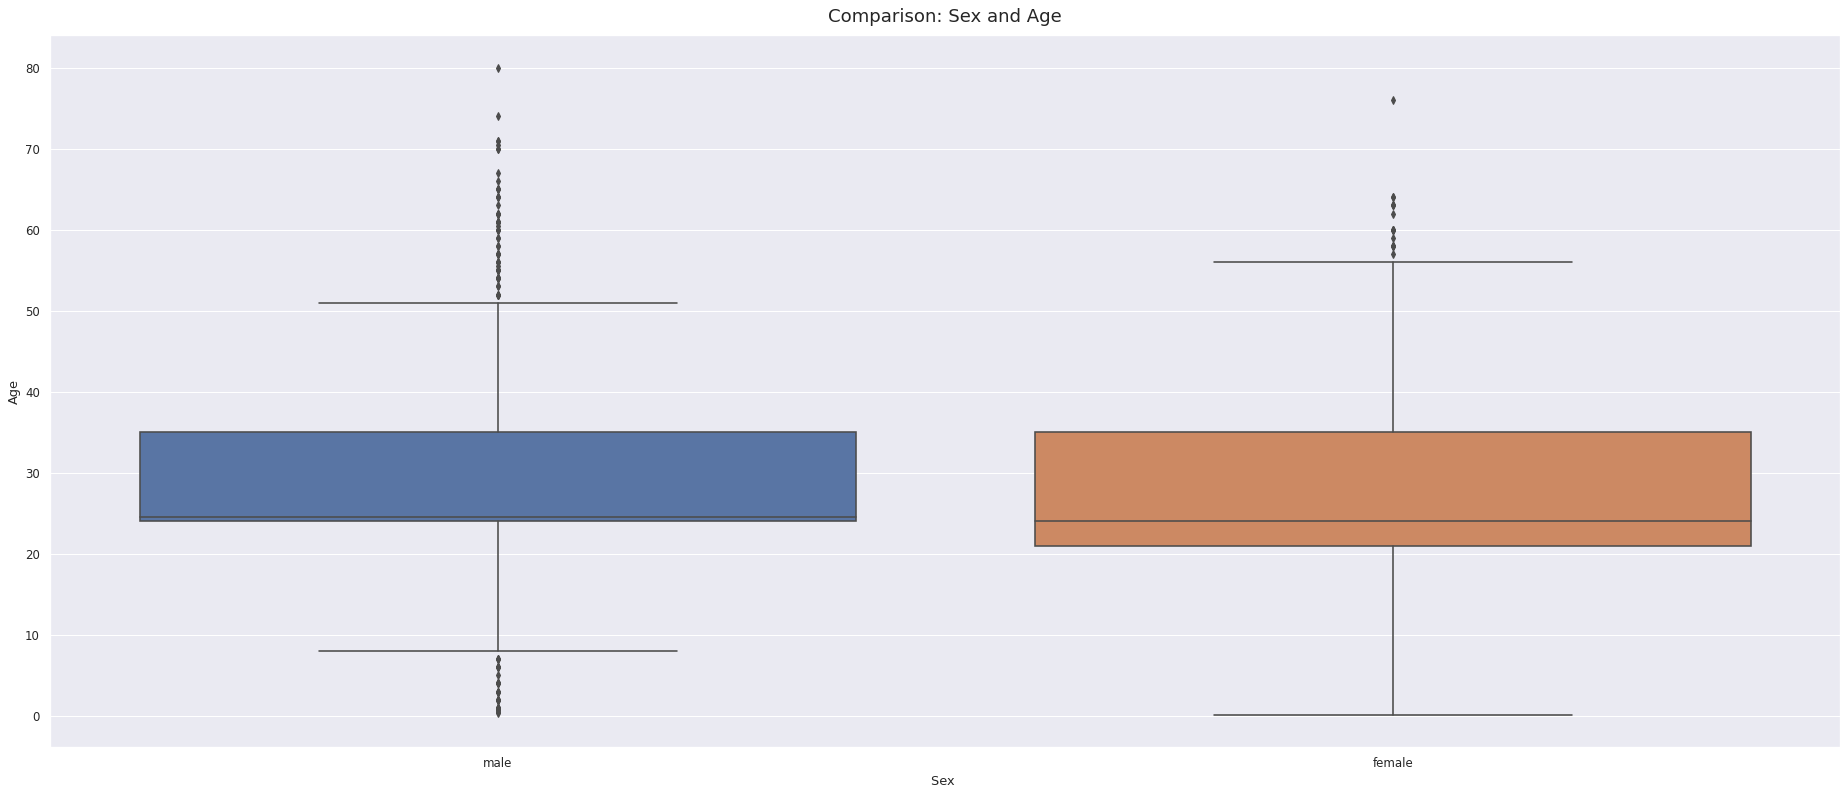

In [ ]:
plt.figure(figsize=(30,12), dpi=77)
sns.boxplot(x="Sex", y="Age", data=df)
plt.title("Comparison: Sex and Age", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel('Sex ')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

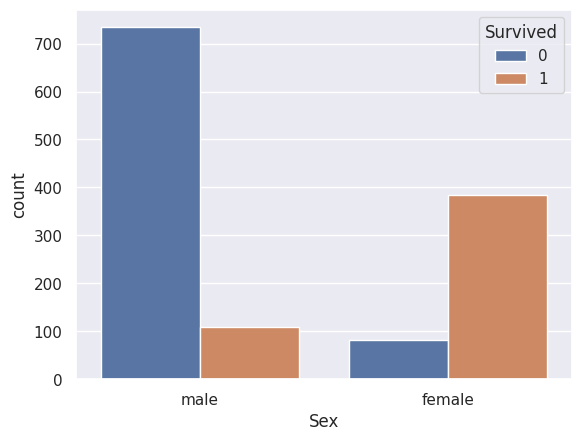

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)


##### 2.3.2.1 Sex Proportion

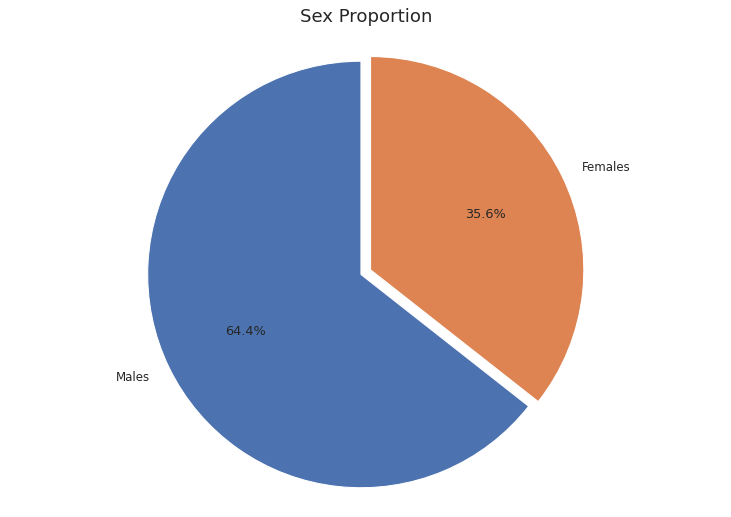

In [ ]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.1)? Write in your own words in this cell.

Write below: From the pie chart we can see that the proportion of males is higher than females and it is almost double.




##### 2.3.2.2 Age comparision of the people who survived and those who died

In [ ]:
# How many people survived ('Survived' == 0)
survived_data=df.Survived.value_counts().to_frame()
survived_data

Survived
0       815
1       494

In [ ]:
pd.pivot_table(df, index="Survived", values=['Pclass','SibSp', 'Parch', 'Fare'])

Fare     Parch    Pclass     SibSp
Survived                                         
0         23.859702  0.311656  2.467485  0.496933
1         48.811497  0.506073  2.010121  0.502024

In [ ]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

len   min   max       mean  median
Survived                                    
0         815  0.33  74.0  29.025043    24.0
1         494  0.17  80.0  28.162470    24.0

In [ ]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [ ]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

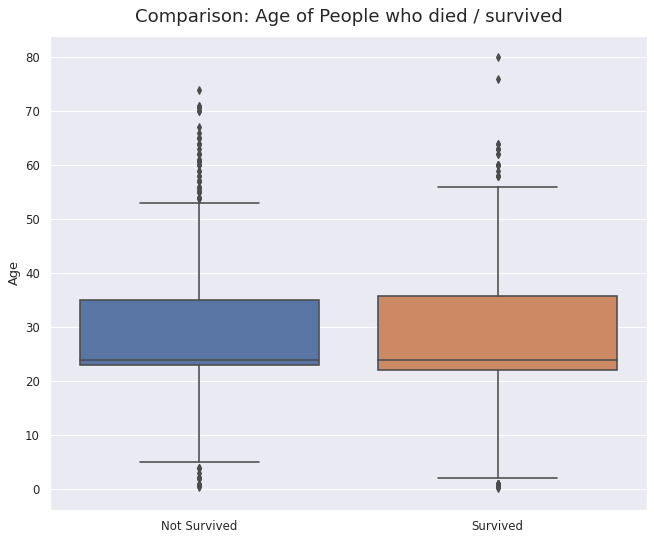

In [ ]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.2)? Write in your own words in this cell.

Write below:The above boxplot shows both survived and not survived of different ages. As we can see from the above boxplot, there are some outliers. People aged > ~52 did not survive(according to not Survived)and People aged > ~56 did  survive(according to  Survived).Most of the data are in the range of 23 to 35 who did not survive. In the actual dataset there were a lot of null values. We filled the null value using median.





##### 2.3.2.3 The barplot compares the survival 

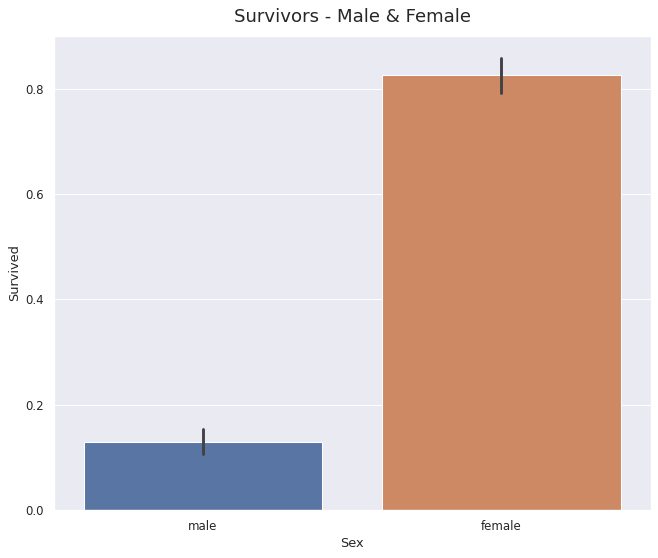

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.3)? Write in your own words in this cell.

Write below: By a barplot , we compared male and female survival rate. From the plot, we can clearly see that there are a huge number to be specific of female survived the disaster. From the code, where we checked the percentage for the survival rate based on sex. From the result we can see that about 82.62% percent female survived, and 12.93% of male survived. So the survival of female should be grater then male.

##### 2.3.2.4 Comparison: Survivors - Male & Female

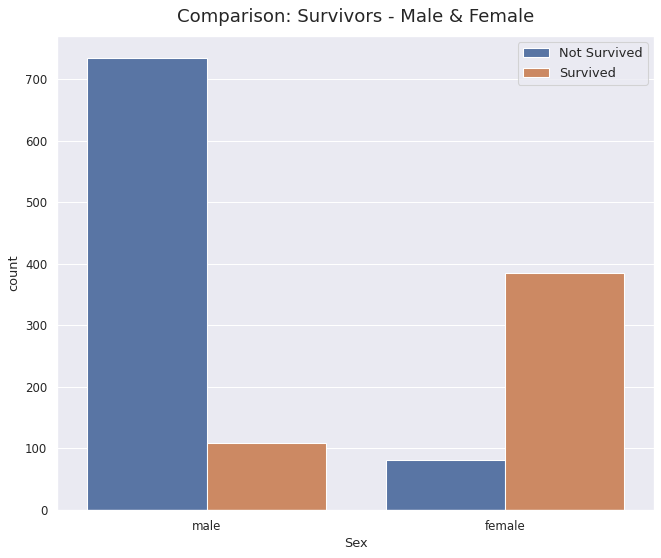

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.4)? Write in your own words in this cell.

Write below: This is a comparison plot of male and female of whom survived and not. From the graph, we can see that, the number of male who did not survive is really high. A very small amount of men survived from this accident. On the other hand , the number of the female surviors is also high. Similarly, the number of female who did not survive is small.

In [ ]:
# Find percentage of women who survived

female_passengers = df[df['Sex'] == 'female']
female_survivors = female_passengers[female_passengers['Survived'] == 1]['Survived'].count()
female_survival_rate = (female_survivors / len(female_passengers)) * 100
print(female_survival_rate)


82.61802575107296


In [ ]:
# Find percentage of men who survived

male_passengers = df[df['Sex'] == 'male']
male_survivors = male_passengers[male_passengers['Survived'] == 1]['Survived'].count()
male_survival_rate = (male_survivors / len(male_passengers)) * 100
print(male_survival_rate)

12.930011862396205


##### 2.3.2.5 Compares the chance of survival for each ticket class

In [ ]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [ ]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0         137
       1         186
2      0         160
       1         117
3      0         518
       1         191

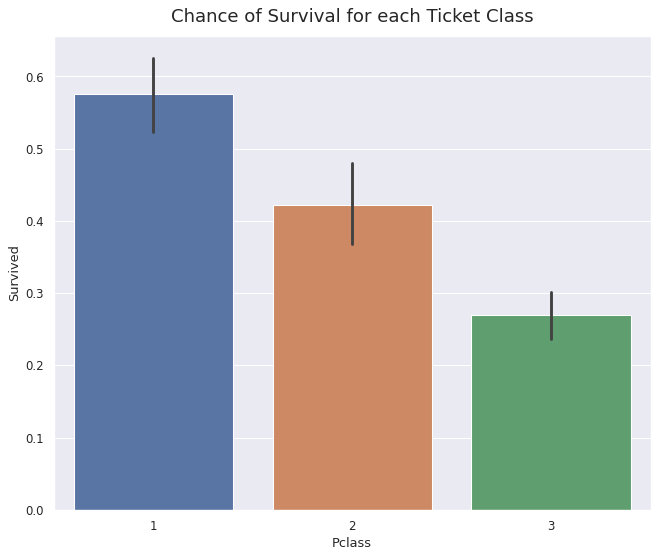

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

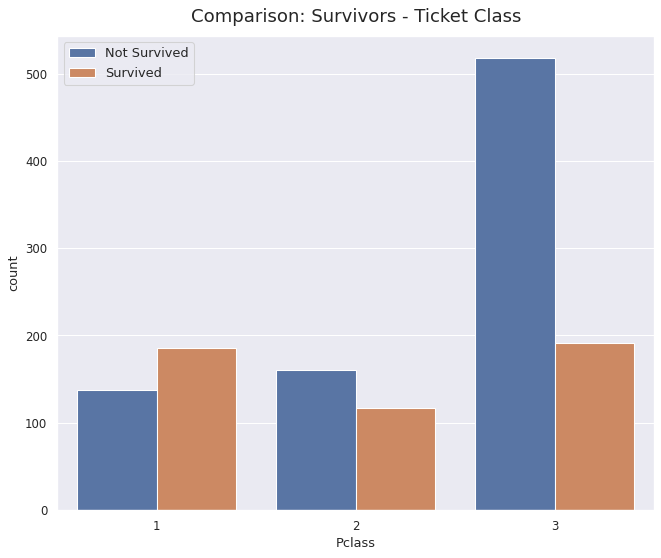

In [ ]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.5)? Write in your own words in this cell.

Write below: Write below:In this section, we can see that the ticket class has relation with survival rate. In our dataset there are three ticket class present. In the plot just above, there are 6 bar for indentify survived and not survived in each class. From the plot we can clearly see that, both survived and not survived are high in class 3. But compare to others classes, most people from class 3 died. The less death rate is in class 1 and class 2. Which makes sense beacuse, class 1 and class 2 passengers are get the most secure and comfortable spaces than other classes.

##### 2.3.2.6 Chance of Survival for Passengers with Parents or Children

In [ ]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  23.861111
       1        1       141  14.00  76.0  36.262411
                2       100   0.92  60.0  26.884200
                3       144   0.17  63.0  22.153958
male   0        1       134   6.00  71.0  39.533582
                2       154   2.00  70.0  31.769481
                3       446   0.33  74.0  25.682534
       1        1        45   0.92  80.0  34.887111
                2        17   0.67  62.0  16.960588
                3        47   0.42  45.0  22.604681

In [ ]:
df['Parch'].value_counts().to_frame()

Parch
0   1002
1    170
2    113
3      8
5      6
4      6
6      2
9      2

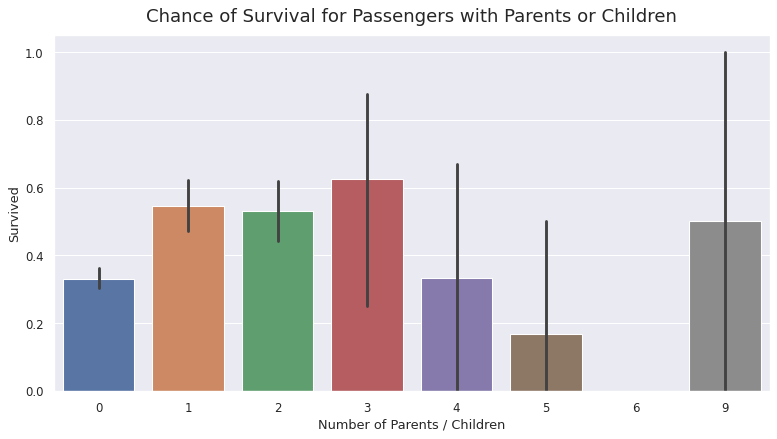

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

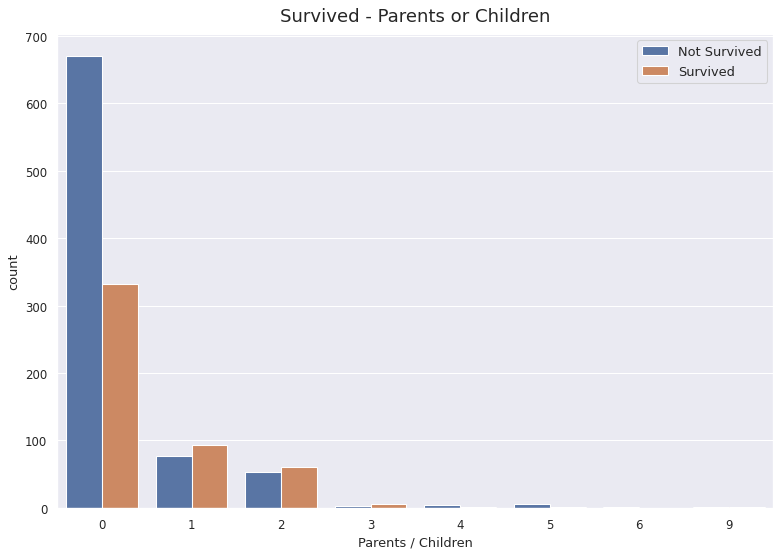

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [ ]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len    min   max
Parch Survived                  
0     0         670  11.00  74.0
      1         332   5.00  80.0
1     0          77   0.75  70.0
      1          93   0.42  64.0
2     0          53   0.33  58.0
      1          60   0.17  64.0
3     0           3  16.00  61.0
      1           5  24.00  54.0
4     0           4  29.00  64.0
      1           2  24.00  60.0
5     0           5  39.00  41.0
      1           1  38.00  38.0
6     0           2  40.00  43.0
9     0           1  24.00  24.0
      1           1  24.00  24.0

 What do you undersend/find from the analysis above (section 2.3.2.6)? Write in your own words in this cell.

Write below:This section shows the surviving relations of passengers who were accompanied by their children or parents. In this plot we can find 8 classes, based on number of parents or children. It is clear from the plot that most of the people who were traveling without their parents or children, survived. This is also true in the opposite case. Most of those who died fall into the same category. From the survival probability plot, we can see that those who were traveling alone were not as likely to survive as they were, i.e. the probability was very low.
Those who had 1 parent or child with fairly moderate survival in Class 3 are in the line of high or low survival. Although for this category, the survival rate is very high, compared to the non-survival rate.
It is the same for other categories as well. Categories 6 and 9 have only 2 values, so it is difficult to say anything about them, because there is not much data that falls into this category.

##### 2.3.2.7 This barplot compares the chance of survival within a category

In [ ]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                
0     0         593  29.654570
      1         298  28.658557
1     0         153  32.266340
      1         166  28.286205
2     0          23  23.956522
      1          19  23.236842
3     0          15  14.600000
      1           5  27.600000
4     0          18   7.222222
      1           4  15.750000
5     0           5  10.200000
      1           1  10.000000
8     0           8  22.812500
      1           1  24.000000

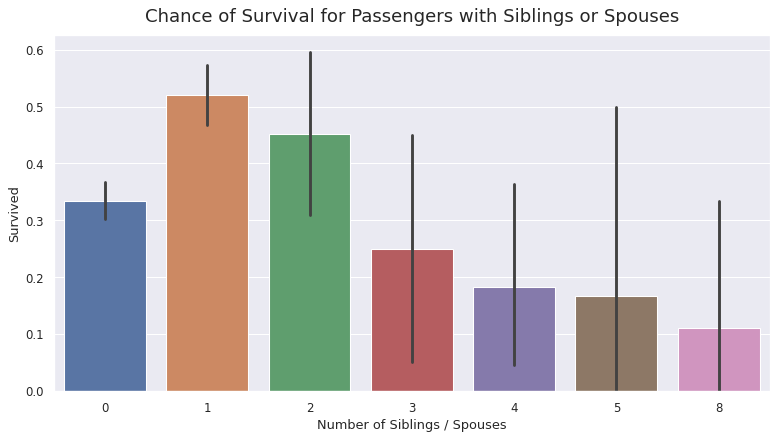

In [ ]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

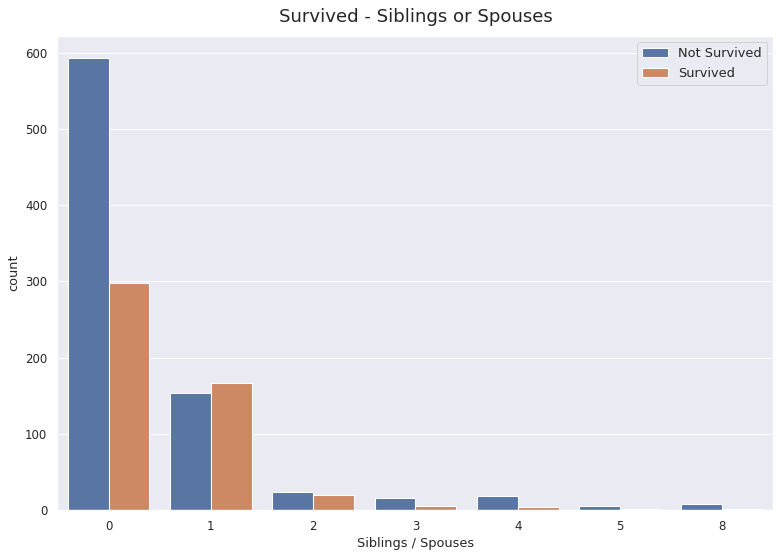

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len    min   max       mean
SibSp Survived                             
0     0         593   0.33  74.0  29.654570
      1         298   0.42  80.0  28.658557
1     0         153   0.75  70.0  32.266340
      1         166   0.17  76.0  28.286205
2     0          23   9.00  44.0  23.956522
      1          19   0.75  59.0  23.236842
3     0          15   2.00  31.0  14.600000
      1           5  23.00  33.0  27.600000
4     0          18   1.00  16.0   7.222222
      1           4   3.00  38.0  15.750000
5     0           5   1.00  16.0  10.200000
      1           1  10.00  10.0  10.000000
8     0           8  14.50  24.0  22.812500
      1           1  24.00  24.0  24.000000

 What do you undersend/find from the analysis above (section 2.3.2.7)? Write in your own words in this cell.

Write below: In this section we have tried to find out the relationship between the survival rate of those who were traveling with siblings or spouse. From the survival probability plot, we can see that those who were traveling with 1 sibling or spouse had a much higher survival probability. However in the actual survival graph, we can see that the survival rate is not as high as people traveling alone, i.e. having 0 siblings or spouses. Those who had 0 siblings or spouses survived longer than those who died in the same category. On the other hand, in the actual survival graph, those who traveled alone have the highest number of survivors and survivors. The scope for this category though, from the scope graph, was moderately low.

The lowest chance of survival was for those who had 8 siblings or spouses. However from the actual graph, we can see that no body in this category survives this accident. Those who had 2 siblings or a spouse had a moderate chance of survival. From the actual survival graph, we can see that the survival rate is not higher than the survival rate. The chance graph gradually decreases for the next 3 categories, those who had 3,4,5 siblings or spouses. The actual survival graph also looks similar from these sections.

##### 2.3.2.8 Chance of Survival by Port of Embarkation

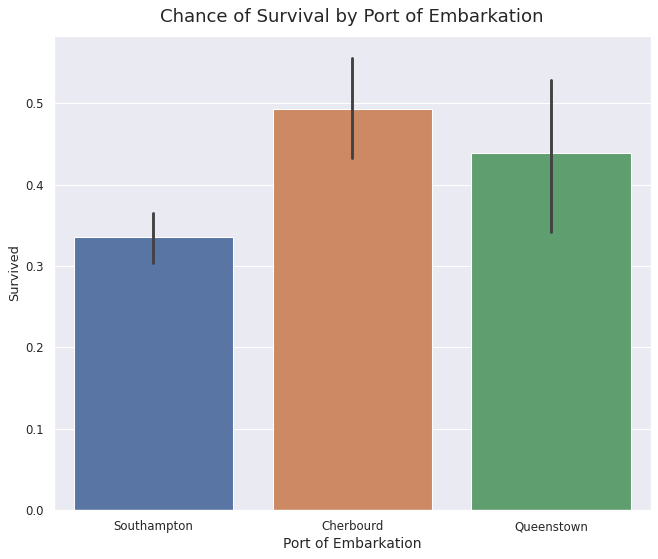

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

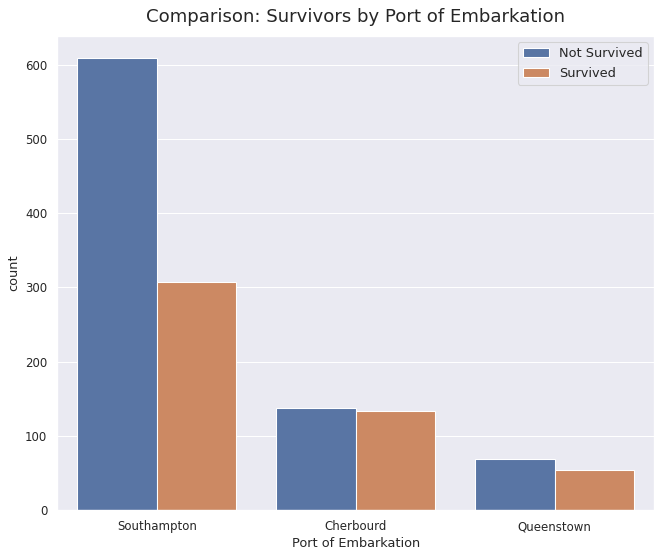

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.8)? Write in your own words in this cell.

Write below: From this section we can check if survival has any relation with port of embarkation. In our dataset, there are 3 ports of embarkation i.e - Southampton, Cherbard, Queenstown. From the plot, we can see that survival and non-survival rates are much higher for Southampton. Most people have died from this port, and it also has the most survivors. Second for Cherbound and third for Queenstown. That means, people from Southampton have a higher survival rate than others. The death rate is also higher than others.

##### 2.3.2.9 Average Age of Passengers with Siblings and  Parents or Children

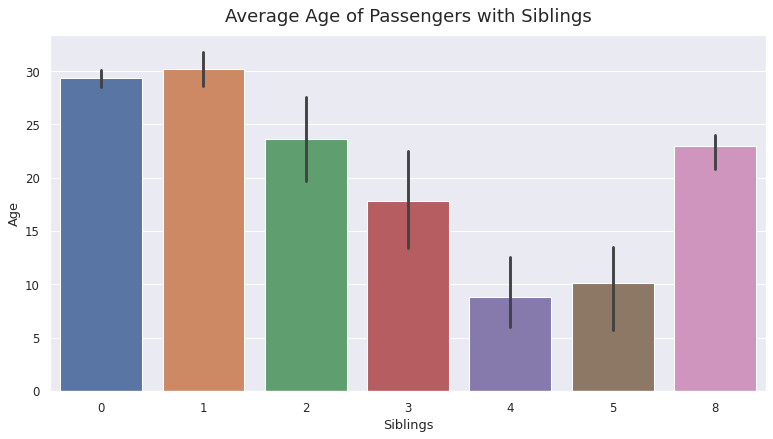

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

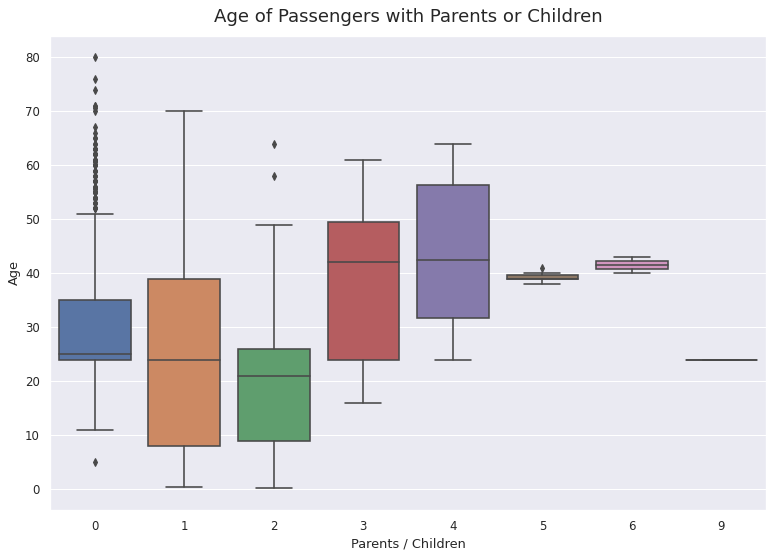

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

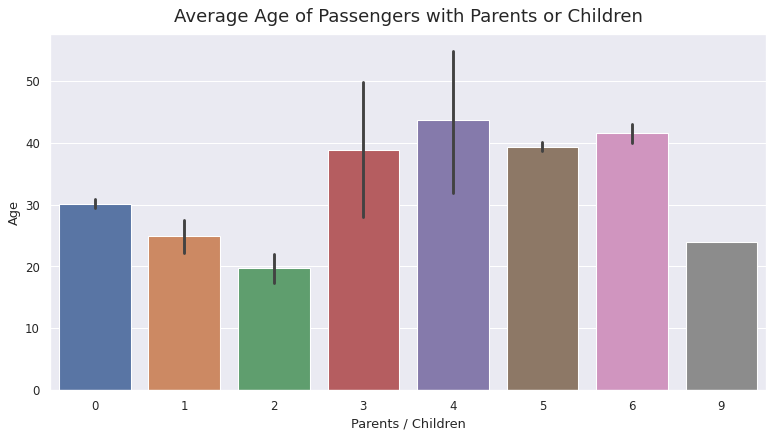

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.9)? Write in your own words in this cell.

Write below: In this section we can see the average age of passengers traveling with parents or children and with siblings. From the first graph in this section, we can see that the average age of those with no siblings is about 30 years. Those with 1 sibling also have about the same average age. The average age of people with 2 siblings is closer to 24, so the average is down here. And this drop was continued for next 3 categories. And after that, it starts to increase again for people with 5 siblings, and for the next category, people with 8 siblings average around 15 years of age. Then there are boxplots for average age for both parents and siblings combined. From the boxplot we can see that there are many outliers in the first category, who travel without parents or siblings. Here the age is about 40 to 20. In class 2, 1 parent or sibling has a larger range, but no outliers. Age range is 40 to 10. The next one, there are some beyond having 2 parents or siblings, and the range is smaller from 30 to 10. , but the age limit is different. So far the maximum age was around 40, but now the age limit is closer to 25 to 50. That is, there has been a change in the range. People with 5 and 6 parents or siblings are the youngest in the group, they also have some outliers. The age range is also different, one is 40, another is above 40. So, when we make a bar chart for average age versus parent or sibling, we get a different picture. The average age of travelers with 0 parents or siblings is 32 years. Which had a lot of external value. The highest average age is 4 parents or siblings, about 48 years. The minimum in this graph is 2 parents or siblings with an average age of 19 years.

##### 2.3.2.10 Age of Passengers for each Ticket Class

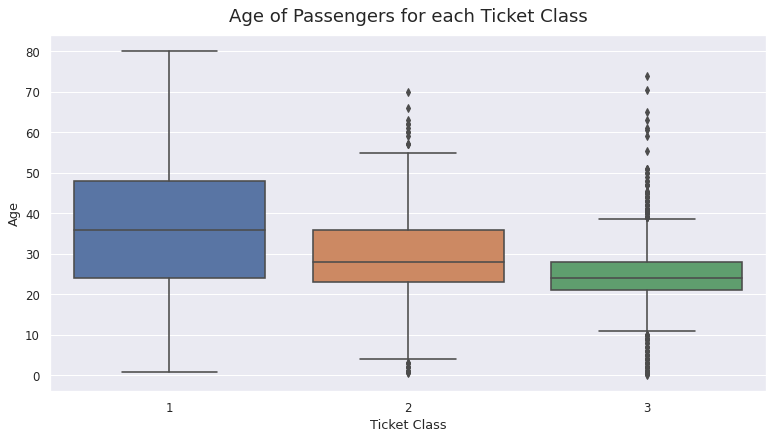

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.10)? Write in your own words in this cell.

Write below: Here we see a boxplot of passenger age for each ticket class. From the plot we can see that age 28 to 48 years is older in class 1. This indicates that the people of the first class were aged people. It has some outliers. 2nd class ticket for those who are younger, 36 to 22 years old. That is, people in this category were younger. The same is true for the third category, people between 20 and 34 years old. That means they were also young. Both of these categories have some high amount of outliers.

##### 2.3.2.11 Comparing multiple columns

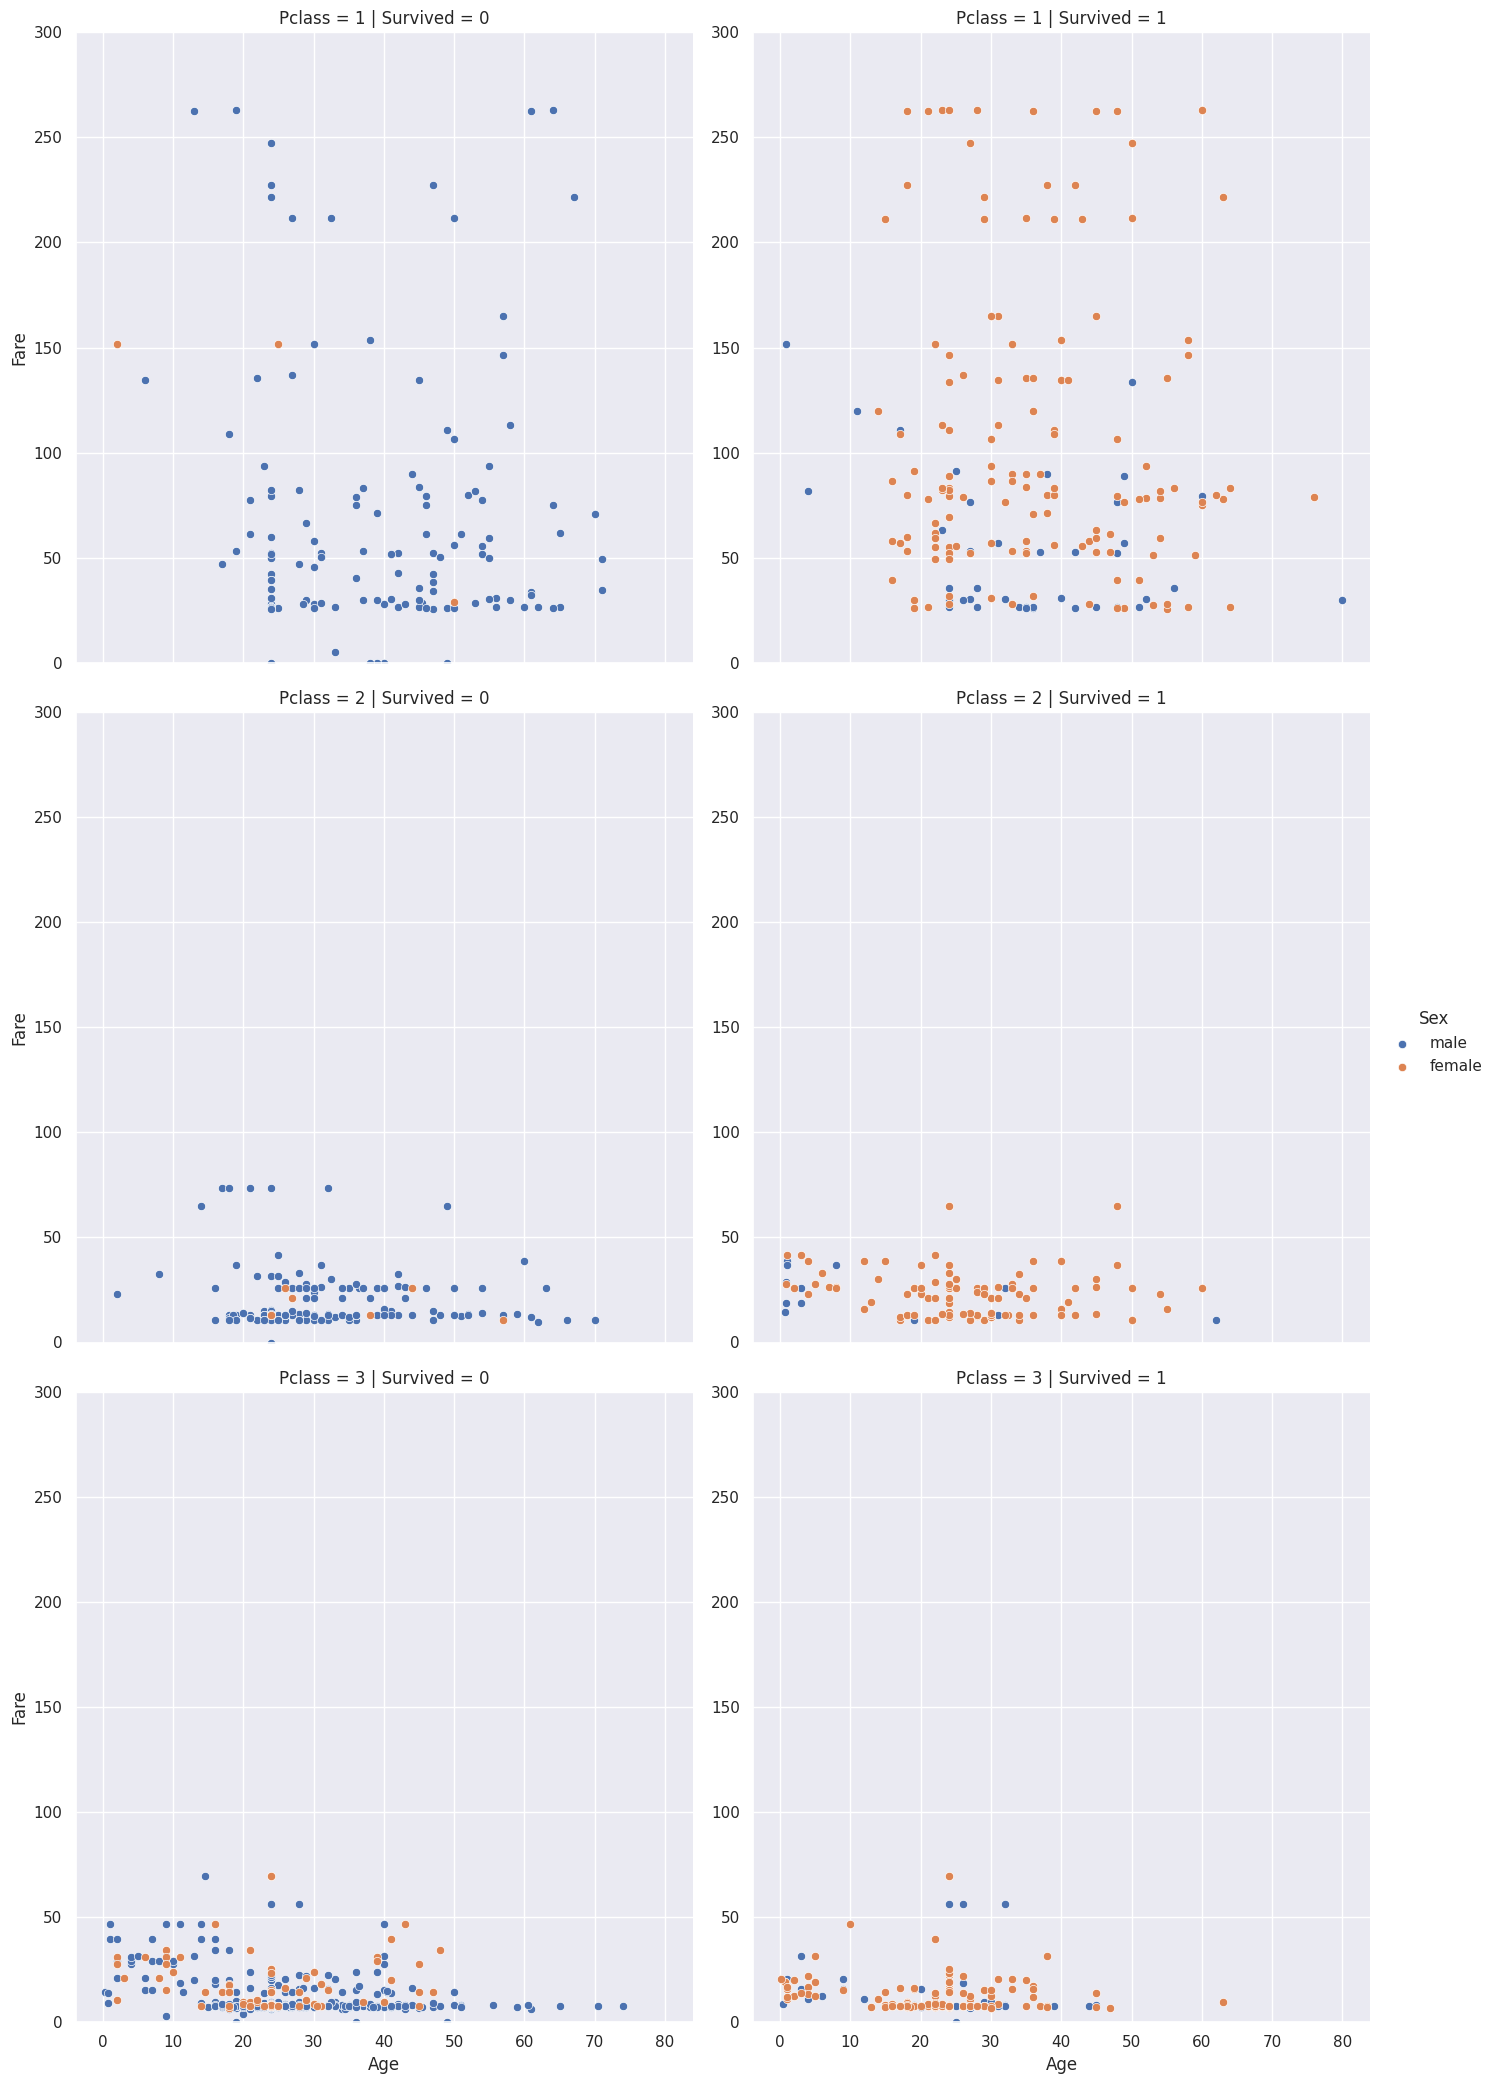

In [ ]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

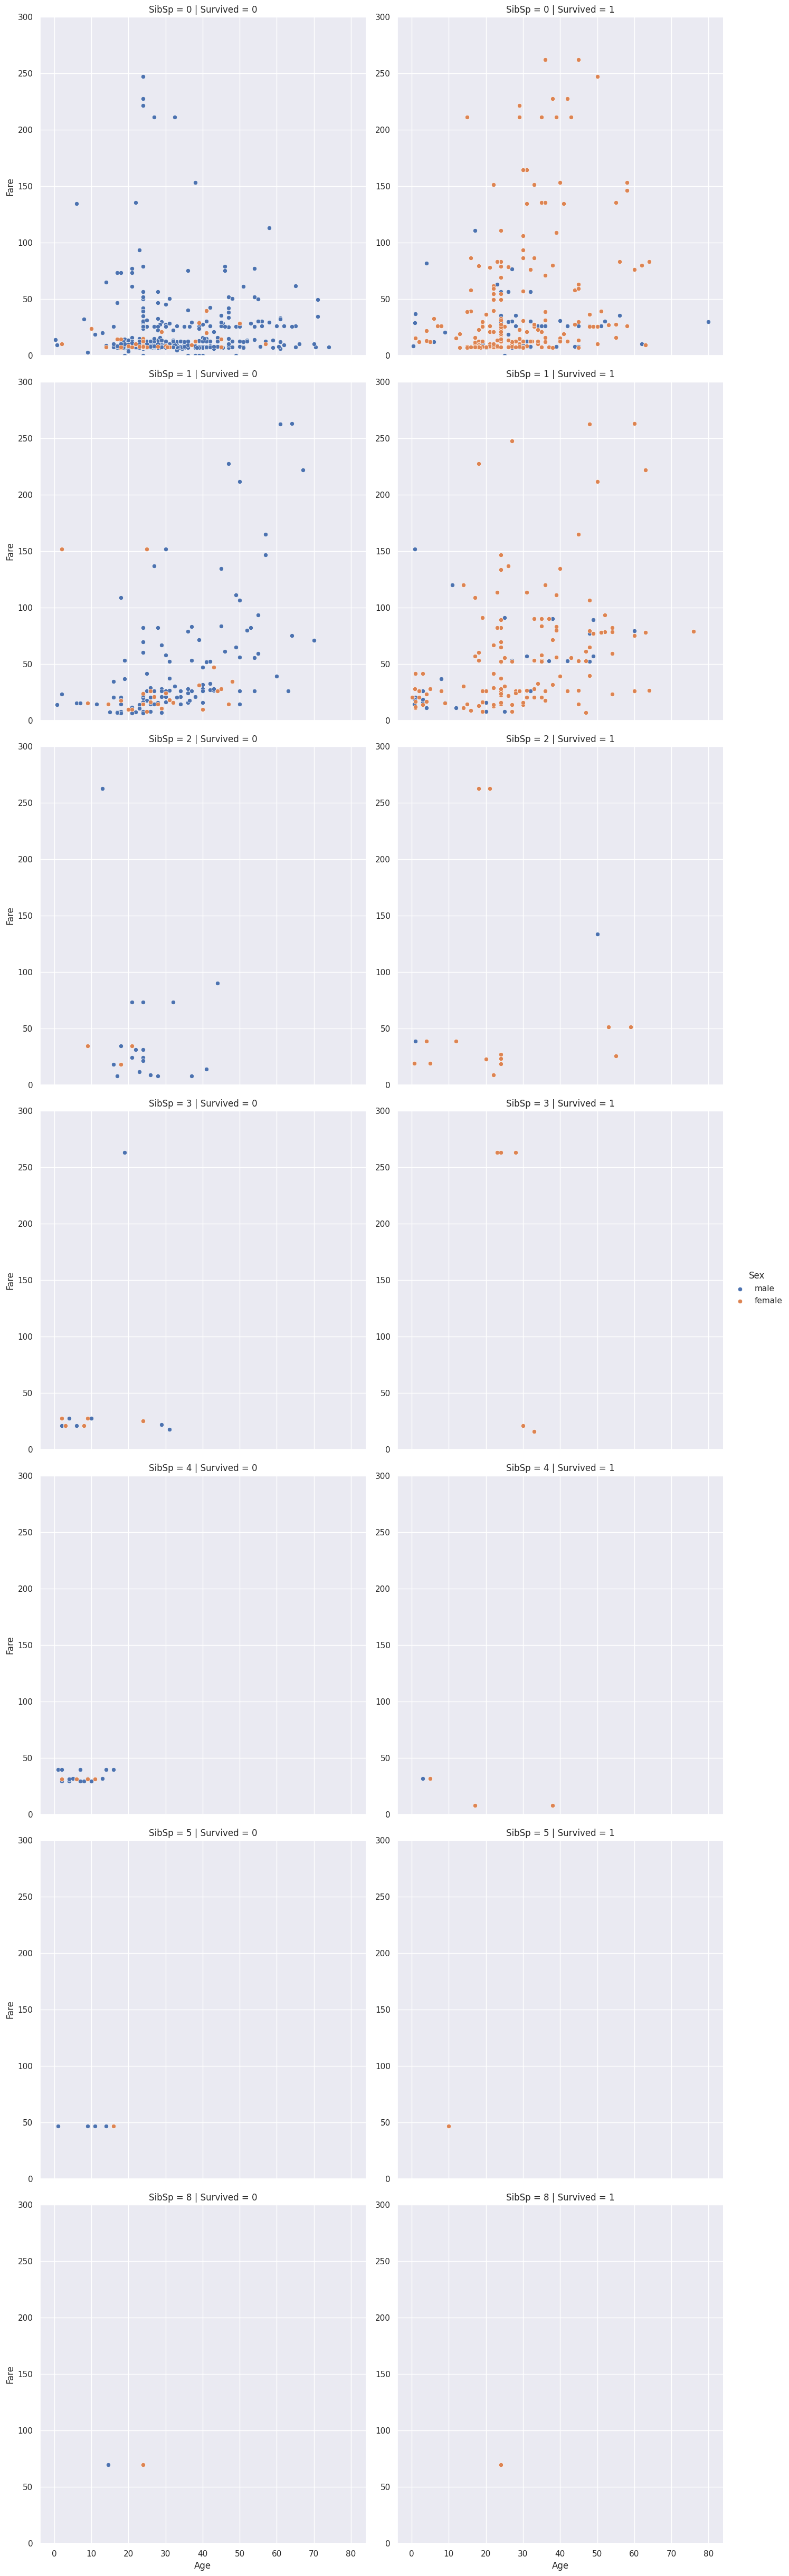

In [ ]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

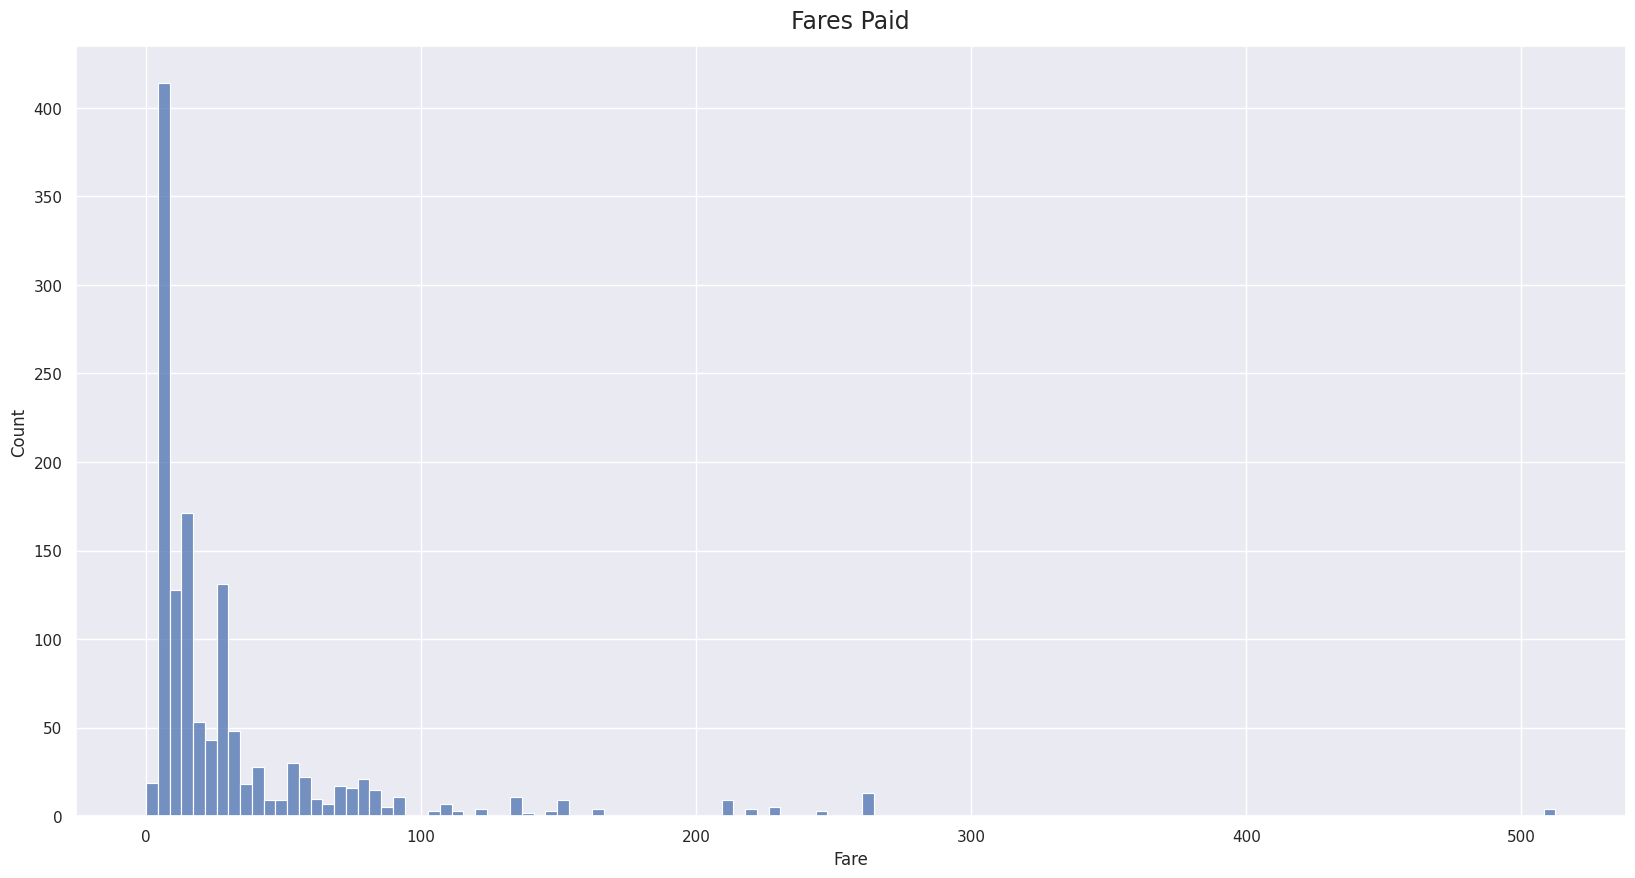

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

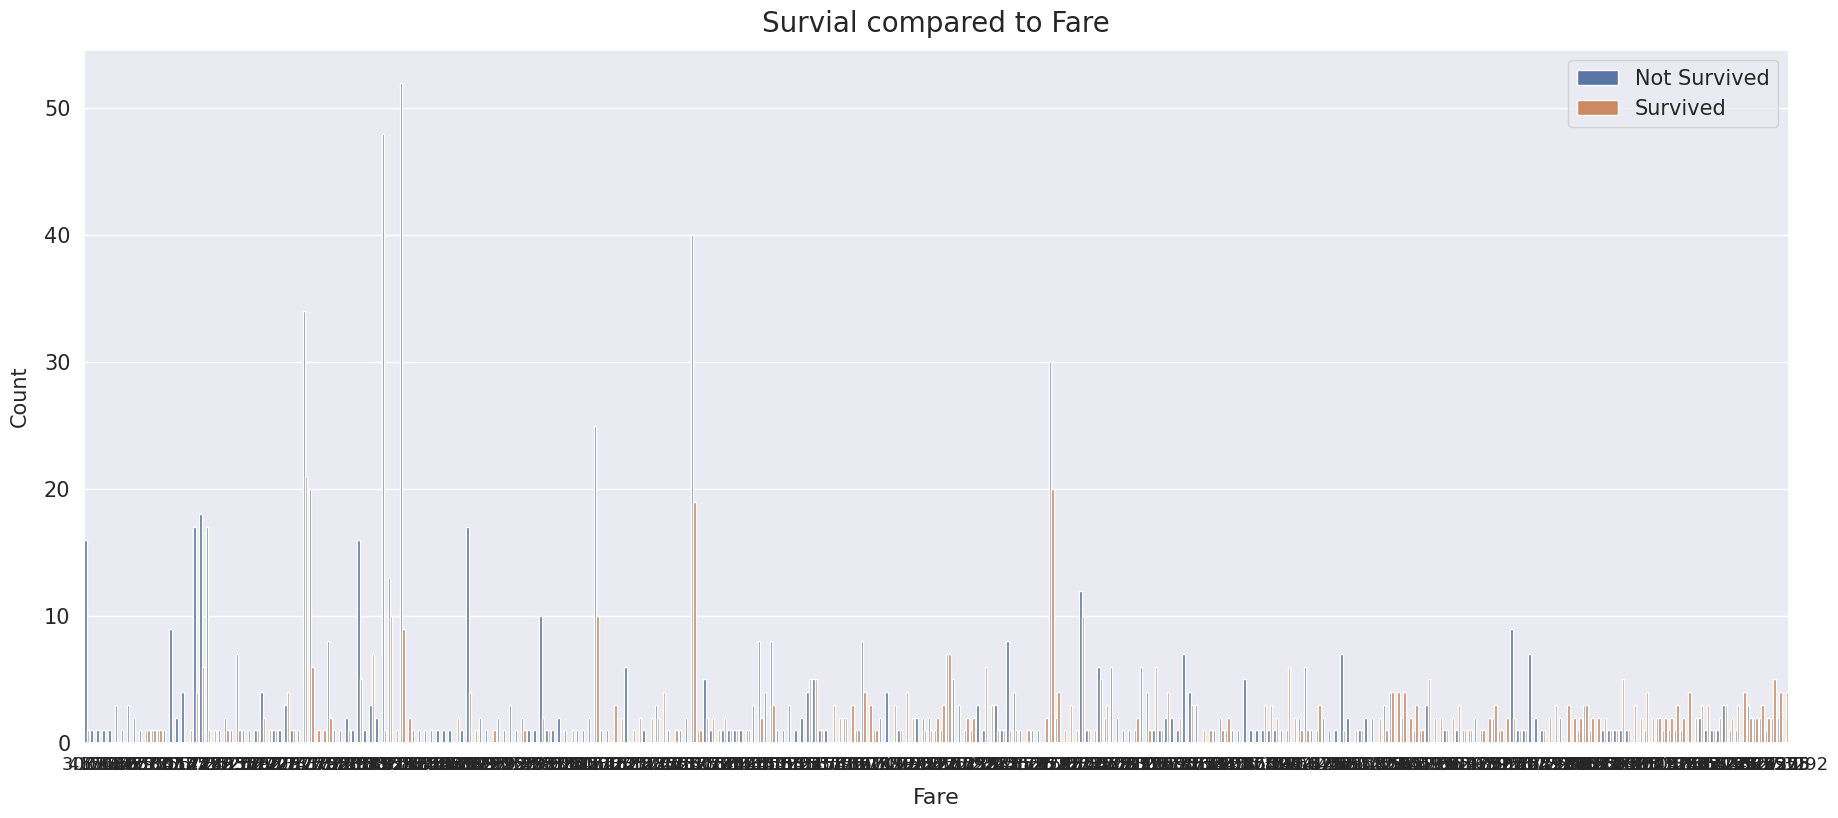

In [ ]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.11)? Write in your own words in this cell.

Write below: 
Here for class=1 and survival=0 males outnumber females, almost all males.
For class=1 and survival=1 there are more women, almost all of them women.

For Class=2 and Survive=0, there are more males than females. For class=2 and survival=1 we have more females than males.

For class=3 and survival=0, we have a balance between males and females, with neither of them particularly dominant.
For Class=3 and Survive=1, again women dominate here.

For survival = 1, there is a lot of data and most of them, almost all of them are women

For siblings = 1 and survival = 0, data are across all plots and most of them are male. For survival = 1 most of them are women.

For siblings=2 and survival=0 we don't have much data and most of them are male. survived=1, we have some spread data and most of them are female.

For siblings=3, and survival=0 we have a mix of males and females but not a lot of data. Alive=1, all of them female.

For siblings = 4 and survival = 0 we have a small amount of data and most of them are male. For survival=1, there are only 4 points in the plot and 3 of them are female.

For siblings=5 and survival=0. We have 5 points, 4 of them male and only one female. In survived=1, threre has only one value and that is female.

For sibling=8 and survivor=0, we have 8 points and only 3 of them are females. survived=1 has only one value and that is female.

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

For encoding categorical variables you can use pandas (get_dummies).

Convert categorical variable into dummy/indicator variables.

Learn More:


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

**Examples**


In [ ]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [ ]:
train1 = train_data.copy()


train1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


train1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [ ]:
data1 = train1.copy()

data1 = pd.get_dummies(data1)

data1.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500           0         1   
1         1       1  38.0      1      0  71.2833           1         0   
2         1       3  26.0      0      0   7.9250           1         0   
3         1       1  35.0      1      0  53.1000           1         0   
4         0       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

**Now use the given dataset and perform the data preprocessing steps:**

In [ ]:
data1.fillna(data1.mean(), inplace=True)
# Split into features and target
X = data1.drop('Survived', axis=1)
y = data1['Survived']

### **Write Here**

 What do you undersend/find from the analysis above (section 3)? Write in your own words in this cell.



In this section we are dealing with the missing values and ere we delete the NAN values of training dataset.For dealing with those NaN values we use median values for age and fare and mode for Embarked,here we replaced the values.

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

### 4.1 Use Logistic regression to build your ML model for the Titanic dataset.

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy.


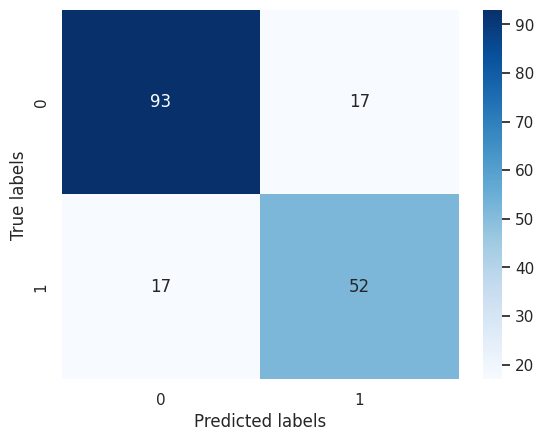

Logistic Regression - Default Accuracy: 0.810
Logistic Regression - Tuned Accuracy: 0.785
Logistic Regression - Tuned Accuracy with Penalty: 0.788
Random Forest - Default Accuracy: 0.810
Random Forest - Tuned Accuracy: 0.787
Random Forest - Tuned Accuracy with Penalty: 0.810


In [ ]:
# Load the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt




# Perform PCA for dimensionality reduction
pca = PCA(n_components=5)
X = pca.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Train and evaluate Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_acc_default = accuracy_score(y_test, lr.predict(X_test))
lr_acc_tuned = cross_val_score(lr, X_train, y_train, cv=5).mean()

# Tune Logistic Regression model using Grid Search
lr_param_grid = {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)
lr_acc_tuned_grid = lr_grid_search.best_score_

# Train and evaluate Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_acc_default = accuracy_score(y_test, rf.predict(X_test))
rf_acc_tuned = cross_val_score(rf, X_train, y_train, cv=5).mean()

# Tune Random Forest model using Grid Search
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [2, 4, 6, 8, 10]}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
rf_acc_tuned_grid = rf_grid_search.best_score_

# Print results
print('Logistic Regression - Default Accuracy: {:.3f}'.format(lr_acc_default))
print('Logistic Regression - Tuned Accuracy: {:.3f}'.format(lr_acc_tuned))
print('Logistic Regression - Tuned Accuracy with Penalty: {:.3f}'.format(lr_acc_tuned_grid))
print('Random Forest - Default Accuracy: {:.3f}'.format(rf_acc_default))
print('Random Forest - Tuned Accuracy: {:.3f}'.format(rf_acc_tuned))
print('Random Forest - Tuned Accuracy with Penalty: {:.3f}'.format(rf_acc_tuned_grid))


**Write Here**

What do you undersend this above (section 4.1)? Write in your own words in this cell.
We build our model using logistic regression for the titanic dataset. Our goal is to find survival rate for different input. We trained our data using the provided train data. We were also provided with test dataset, where some preprocessing was needed. We filled the null values, dropped the duplicate and just like we did with our tarining dataset.
Now its time to move to make models. Since it is logistic regression and output is binary that is will survive or not, we can use accuracy score. Our accuracy for ths model is 94%, also we can draw confusion matrix.

We then moved to tune the model by changing the parameter of the model. This time we get a accuracy of 96.89%. After another set of changing values, we made another model by changing different parameter this time, and got an accuracy of 97%

### 4.2 First analyse the 'Advertising dataset' as like you have observed in Titanic dataset. Then, use Linear Regression to build your ML model for the Advertising dataset. 

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy. 


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/advertising.csv')

In [ ]:

data.drop_duplicates(inplace=True)

z = data.drop(['Sales'], axis=1)
z1 = data['Sales']

X_trains, X_tests, y_trains, y_tests = train_test_split(z, z1, test_size=0.2, random_state=42)

lr_defaults = LinearRegression().fit(X_trains, y_trains)

y_pred_defaults = lr_defaults.predict(X_tests)

print(f"Default R-squared score: {r2_score(y_tests, y_pred_defaults):.4f}")

lr_tuned = LinearRegression(fit_intercept=False).fit(X_trains, y_trains)

y_pred_tuneds = lr_tuned.predict(X_tests)

print(f"Tuned R-squared score: {r2_score(y_tests, y_pred_tuneds):.4f}")




Default R-squared score: 0.9059
Tuned R-squared score: 0.7924


In [ ]:
lr_defaults = LinearRegression()
lr_defaults.fit(X_trains, y_trains)
y_pred_defaults = lr_defaults.predict(X_tests)
mse_default = mean_squared_error(y_tests, y_pred_defaults)


lr_tuneds = LinearRegression(fit_intercept=False)
lr_tuneds.fit(X_trains, y_trains)
y_pred_tuneds = lr_tuneds.predict(X_tests)
mse_tuned = mean_squared_error(y_tests, y_pred_tuneds)

print("Default Model - MSE: ", mse_default)
print("Tuned Model - MSE: ", mse_tuned)


Default Model - MSE:  2.9077569102710896
Tuned Model - MSE:  6.415150074882661


**Write Here**

What do you undersend this above (section 4.2)? Write in your own words in this cell.

After analysis the 'Advertising dataset' we have observed that the models were compared based on the R-squared score and the Mean Squared Error.The R-squared score of the default model is 0.9059. R-squared is a statistical measure that represents the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. Therefore,a higher R-squared value indicates a better fit of the model to the data.As The R-squared score of the tuned model is 0.7924 and this score is lower than the default model so we can say that the default model performed better than the tuned model in terms of the proportion of variance explained.
again we can see the Mean Squared Error (MSE) of the default model is 2.9078.As we know that MSE is the average squared difference between the predicted and actual values of the dependent variable in a regression model.Therefore,a lower MSE value indicates a better fit of the model to the data.Again the MSE of the tuned model is 6.4151.This value is higher than the default modelso we can say that the default model performed better than the tuned model in terms of the average squared difference between predicted and actual values.

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models (for both the dataset, provide seperate comparison). Add as many cells as you need.

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

# for titanic dataset

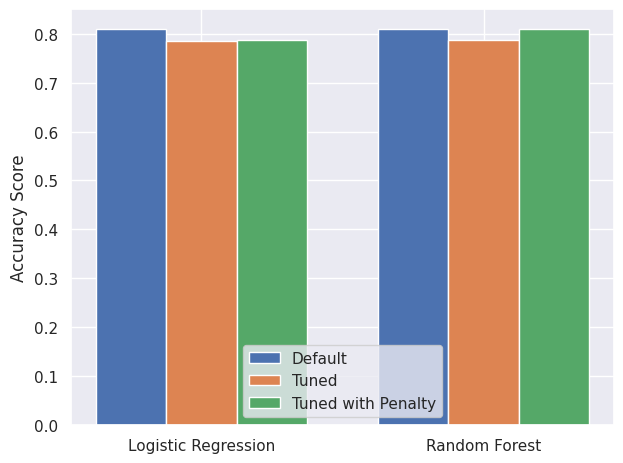

In [ ]:
models = ['Logistic Regression', 'Random Forest']
default_scores = [lr_acc_default, rf_acc_default]
tuned_scores = [lr_acc_tuned, rf_acc_tuned]
tuned_penalty_scores = [lr_acc_tuned_grid, rf_acc_tuned_grid]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, default_scores, width, label='Default')
rects2 = ax.bar(x, tuned_scores, width, label='Tuned')
rects3 = ax.bar(x + width, tuned_penalty_scores, width, label='Tuned with Penalty')

ax.set_ylabel('Accuracy Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()


### **Write Here**
Based on the results obtained from the code, the Logistic Regression model with default hyperparameters achieved the best accuracy of 0.81 on the test set. However, it is important to note that the Random Forest model with tuned hyperparameters achieved a higher accuracy of 0.812 on the training set, but only achieved an accuracy of 0.793 on the test set, which is slightly lower than the accuracy of the Logistic Regression model.

Therefore, based on the test set performance, the Logistic Regression model with default hyperparameters is the best performing model in this scenario. It is also worth noting that the Logistic Regression model with penalty hyperparameter tuning did not perform significantly better than the default model or the tuned Random Forest model.

Overall, the choice of the best model would depend on the specific requirements of the problem, such as the need for interpretability (Logistic Regression) or the ability to handle non-linear relationships (Random Forest).

# Advertising Dataset

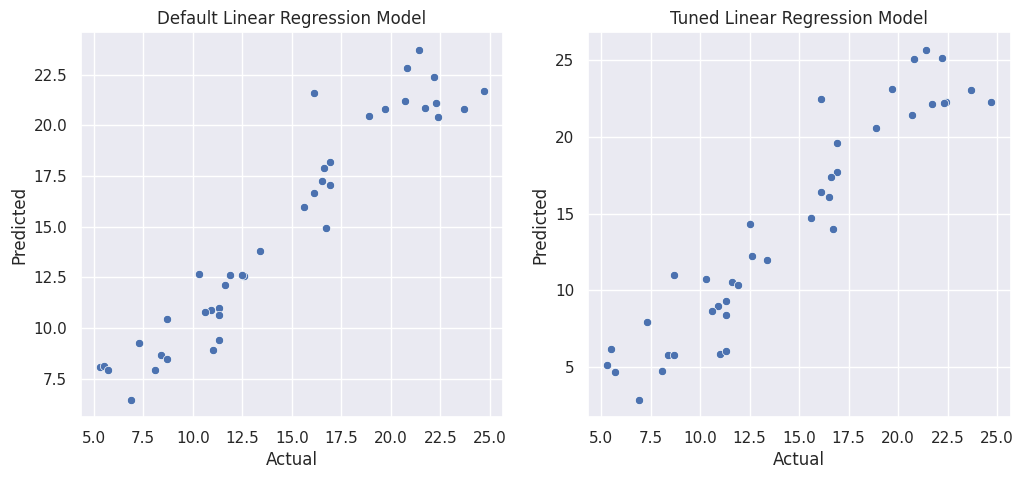

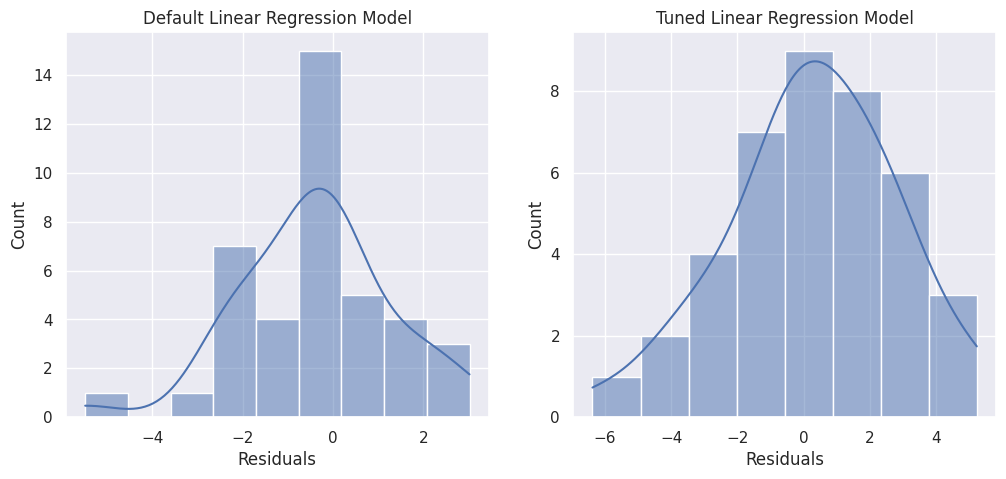

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# scatter plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.scatterplot(x=y_tests, y=y_pred_defaults, ax=ax1)
ax1.set_title('Default Linear Regression Model')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')

sns.scatterplot(x=y_tests, y=y_pred_tuneds, ax=ax2)
ax2.set_title('Tuned Linear Regression Model')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')

plt.show()

# residual histograms
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.histplot(y_tests - y_pred_defaults, kde=True, ax=ax1)
ax1.set_title('Default Linear Regression Model')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Count')

sns.histplot(y_tests - y_pred_tuneds, kde=True, ax=ax2)
ax2.set_title('Tuned Linear Regression Model')
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Count')

plt.show()

From the scatter plot, we can see that the default model has a better fit than the tuned model, as the predicted values are closer to the actual values. However, from the residual histograms, we can see that the tuned model has a more normal distribution of residuals, indicating that it may be a better model overall, despite having a lower R-squared score and a higher mean squared error


# **Part B (Analysis of the Dataset(s) )**


Dataset Description: Bank Marketing Dataset

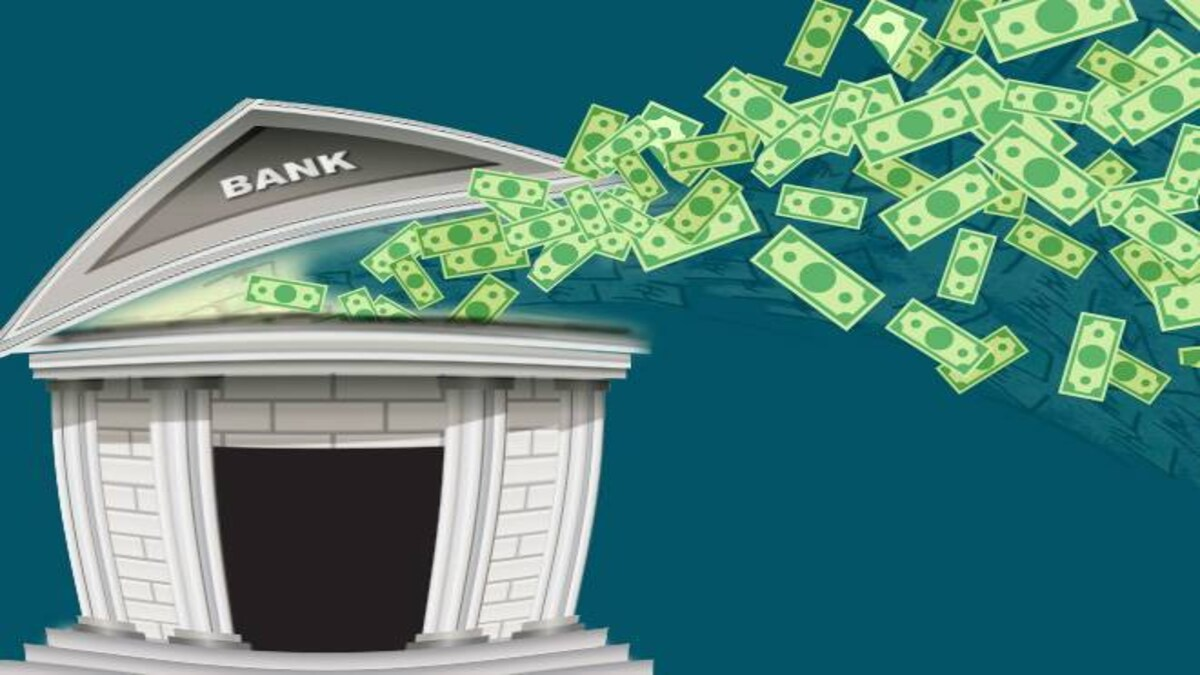

Data Dictionary:
1.  pdays: previous day.
2. 'job': different type of job(admin.,student,technician,services,management,retired,blue-collar,entrepreneur, housemaid, self-employed, services, unemployed, unknown)
3. 'marital': single , married and divorced
4. 'age': Age in years
5. 'education': primary , secondary ,tertiary and unknown
6. 'balance': parents/children aboard
7. 'Housing': has the customer gotten any housing loans? If it's true, then 'yes," otherwise "no."
8. 'loan': any customer receives any loan from the bank if true ("yes"), otherwise ("no").
9. 'day': How long has the customer taken the loan?
10. 'duration':Numeric measurement of the time since last contact. Important information: If duration=0, the output goal will be "no," for example. However, the length is unknown prior to making a call. After the call is over, y is also clearly known. Thus, if the goal is to have a realistic predictive model, this input should only be used for benchmarking purposes and should be removed.
11. contact: contact communication type
12. 'deposit': the deposited funds may earn interest over time, which can increase the overall balance of the account. The amount of interest earned may vary based on the account type and the bank's interest rates.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact
14. day of a week : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric) 
17. Poutcome : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


The data :


1.Bank training set (bank_train_data.csv)


2.Bank testing set (bank_test_data.csv)


\\
The training set should be used to build your machine-learning models. 

The test set should be used to see how well your model performs on unseen data.




## 1. Provide an overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models. 

**Write Here**

This dataset is based on a direct marketing campaign of a Portuguese banking institution whose marketing campaigns are based on phone calls. The dataset has 20 input columns and 1 output column(y). What we want to predict from here is to find out whether a customer will subscribe to bank deposits or not. The dataset contains 40000+ rows of data.
This dataset contains some null values and is beyond. To deal with missing values, we use the median because the mean cannot perform well under outliers. We don't need all the columns either, so we omit some of them.
But before dropping the column, we did some analysis. We created a lot of bar plots, scatter plots, pie charts, histograms, etc. to find out how well the columns actually correspond to each other, and some analysis also tells us if we actually need them to train our model. We analyzed a lot of data in the analysis section.
After completing the analysis, it's time to build our model. We dealt with null values, removed duplicates, and did other cleanups to make our dataset efficient. Since we want to predict some number, and it is not a binary result. We built three models, one with default parameters, the other with some modifications.
After the modeling was done, we checked some scores to see how well our model was doing. We used the mean squared error, root mean squared error, MAE to find out how well our model fits.

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need)

### 2.1 Load, View Data and Show Analysis on Rows and Columns 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
bank_train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank_Test.csv")
#bank_Test is the bank_train dataset.
bank_test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank_test_test.csv")
# bank_test_test is the bank_test dataset.

In [ ]:
display(' Bank Train Data:',bank_train_data.head(), 'Bank Test Data:',bank_test_data.head())

' Bank Train Data:'

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

'Bank Test Data:'

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

In [ ]:
bank_train_data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [ ]:
print(bank_train_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [ ]:
bank_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print(bank_train_data.shape)

(41188, 21)


In [ ]:
print('Total cells:', bank_train_data.size)

Total cells: 864948


In [ ]:
bank_train_data.iloc[[100,200,300]]

age       job  marital    education  default housing loan    contact  \
100   54  services  married      unknown       no     yes   no  telephone   
200   33  services  married  high.school       no      no   no  telephone   
300   38  services   single  high.school  unknown      no   no  telephone   

    month day_of_week  ...  campaign  pdays  previous     poutcome  \
100   may         mon  ...         1    999         0  nonexistent   
200   may         mon  ...         2    999         0  nonexistent   
300   may         mon  ...         2    999         0  nonexistent   

    emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
100          1.1          93.994          -36.4      4.857       5191.0  no  
200          1.1          93.994          -36.4      4.857       5191.0  no  
300          1.1          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [ ]:
print(bank_train_data.corr())

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

<ipython-input-1313-2d9f8fb896f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(bank_train_data.corr())


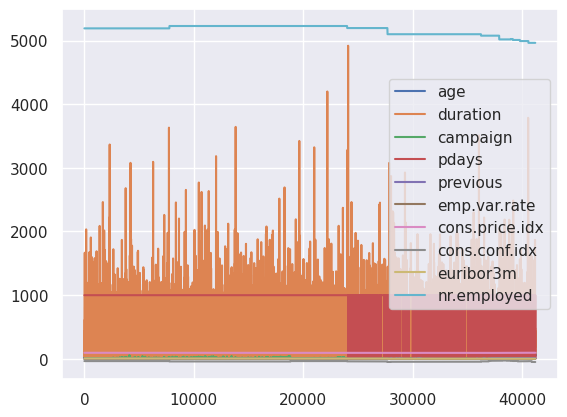

In [ ]:
bank_train_data.plot()
plt.show()

Text(0, 0.5, 'Frequency')

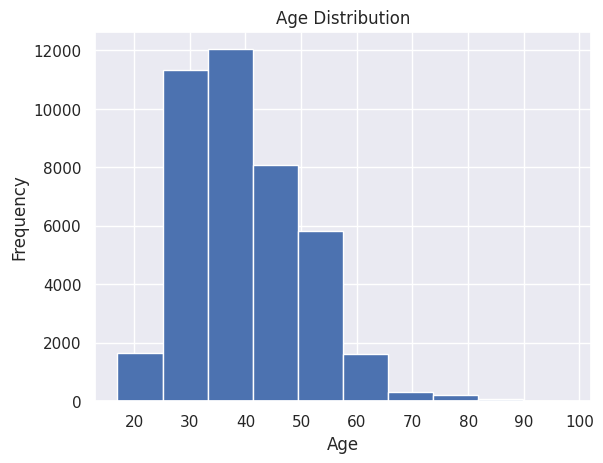

In [ ]:
bank_train_data['age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

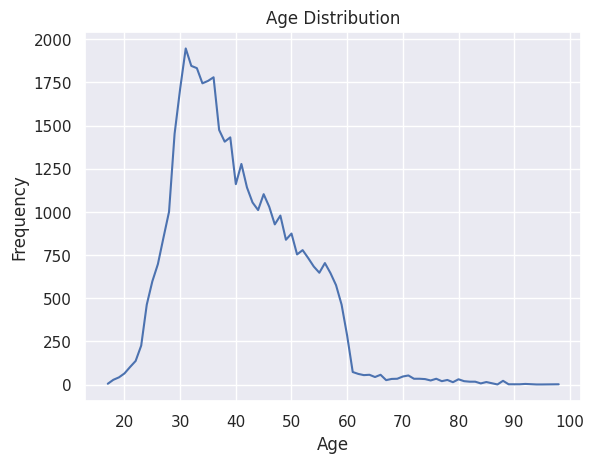

In [ ]:
plt.plot(bank_train_data['age'].value_counts().sort_index())
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
bank_train_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [ ]:
duplicates_bank_data = bank_train_data[bank_train_data.duplicated()]
print(duplicates_bank_data)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

Convert categorical data into numerical values.Function to encode the string to numeric and fit.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
def categorize(new_bank_train_data):
    new_bank_train_data = new_bank_train_data.copy()
    le = preprocessing.LabelEncoder()
    new_bank_train_data['job'] = le.fit_transform(new_bank_train_data['job'])
    new_bank_train_data['marital'] = le.fit_transform(new_bank_train_data['marital'])
    new_bank_train_data['education'] = le.fit_transform(new_bank_train_data['education'])
    new_bank_train_data['default'] = le.fit_transform(new_bank_train_data['default'])
    new_bank_train_data['housing'] = le.fit_transform(new_bank_train_data['housing'])
    new_bank_train_data['month'] = le.fit_transform(new_bank_train_data['month'])
    new_bank_train_data['loan'] = le.fit_transform(new_bank_train_data['loan'])
    new_bank_train_data['contact'] = le.fit_transform(new_bank_train_data['contact'])
    new_bank_train_data['day_of_week'] = le.fit_transform(new_bank_train_data['day_of_week'])
    new_bank_train_data['poutcome'] = le.fit_transform(new_bank_train_data['poutcome'])
    new_bank_train_data['y'] = le.fit_transform(new_bank_train_data['y'])
    return new_bank_train_data

concat and replace Bank Train and Bank Test data

In [ ]:
bank_data = pd.concat([bank_train_data, bank_test_data])
bank_data

age         job  marital    education  default housing loan    contact  \
0      56   housemaid  married     basic.4y       no      no   no  telephone   
1      57    services  married  high.school  unknown      no   no  telephone   
2      37    services  married  high.school       no     yes   no  telephone   
3      40      admin.  married     basic.6y       no      no   no  telephone   
4      56    services  married  high.school       no      no  yes  telephone   
...   ...         ...      ...          ...      ...     ...  ...        ...   
4114   30      admin.  married     basic.6y       no     yes  yes   cellular   
4115   39      admin.  married  high.school       no     yes   no  telephone   
4116   27     student   single  high.school       no      no   no   cellular   
4117   58      admin.  married  high.school       no      no   no   cellular   
4118   34  management   single  high.school       no     yes   no   cellular   

     month day_of_week  ...  campaign  pdays  previous     poutcome  \
0      may         mon  ...         1    999         0  nonexistent   
1      may         mon  ...         1    999         0  nonexistent   
2      may         mon  ...         1    999         0  nonexistent   
3      may         mon  ...         1    999         0  nonexistent   
4      may         mon  ...         1    999         0  nonexistent   
...    ...         ...  ...       ...    ...       ...          ...   
4114   jul         thu  ...         1    999         0  nonexistent   
4115   jul         fri  ...         1    999         0  nonexistent   
4116   may         mon  ...         2    999         1      failure   
4117   aug         fri  ...         1    999         0  nonexistent   
4118   nov         wed  ...         1    999         0  nonexistent   

     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0             1.1          93.994          -36.4      4.857       5191.0  no  
1             1.1          93.994          -36.4      4.857       5191.0  no  
2             1.1          93.994          -36.4      4.857       5191.0  no  
3             1.1          93.994          -36.4      4.857       5191.0  no  
4             1.1          93.994          -36.4      4.857       5191.0  no  
...           ...             ...            ...        ...          ...  ..  
4114          1.4          93.918          -42.7      4.958       5228.1  no  
4115          1.4          93.918          -42.7      4.959       5228.1  no  
4116         -1.8          92.893          -46.2      1.354       5099.1  no  
4117          1.4          93.444          -36.1      4.966       5228.1  no  
4118         -0.1          93.200          -42.0      4.120       5195.8  no  

[45307 rows x 21 columns]

In [ ]:
bank_data = bank_data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1)

In [ ]:
bank_data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True) 
bank_data

age         job  marital    education  default housing loan    contact  \
0      56   housemaid  married        basic       no      no   no  telephone   
1      57    services  married  high.school  unknown      no   no  telephone   
2      37    services  married  high.school       no     yes   no  telephone   
3      40      admin.  married        basic       no      no   no  telephone   
4      56    services  married  high.school       no      no  yes  telephone   
...   ...         ...      ...          ...      ...     ...  ...        ...   
4114   30      admin.  married        basic       no     yes  yes   cellular   
4115   39      admin.  married  high.school       no     yes   no  telephone   
4116   27     student   single  high.school       no      no   no   cellular   
4117   58      admin.  married  high.school       no      no   no   cellular   
4118   34  management   single  high.school       no     yes   no   cellular   

     month day_of_week  duration  campaign  pdays  previous     poutcome   y  
0      may         mon       261         1    999         0  nonexistent  no  
1      may         mon       149         1    999         0  nonexistent  no  
2      may         mon       226         1    999         0  nonexistent  no  
3      may         mon       151         1    999         0  nonexistent  no  
4      may         mon       307         1    999         0  nonexistent  no  
...    ...         ...       ...       ...    ...       ...          ...  ..  
4114   jul         thu        53         1    999         0  nonexistent  no  
4115   jul         fri       219         1    999         0  nonexistent  no  
4116   may         mon        64         2    999         1      failure  no  
4117   aug         fri       528         1    999         0  nonexistent  no  
4118   nov         wed       175         1    999         0  nonexistent  no  

[45307 rows x 16 columns]

In [ ]:
bank_data.iloc[[0,3]]

age        job  marital education default housing loan    contact month  \
0   56  housemaid  married     basic      no      no   no  telephone   may   
3   40     admin.  married     basic      no      no   no  telephone   may   

  day_of_week  duration  campaign  pdays  previous     poutcome   y  
0         mon       261         1    999         0  nonexistent  no  
3         mon       151         1    999         0  nonexistent  no

#### Identifying missing values


In [ ]:
missing_values = bank_data.isnull()
print(missing_values)

        age    job  marital  education  default  housing   loan  contact  \
0     False  False    False      False    False    False  False    False   
1     False  False    False      False    False    False  False    False   
2     False  False    False      False    False    False  False    False   
3     False  False    False      False    False    False  False    False   
4     False  False    False      False    False    False  False    False   
...     ...    ...      ...        ...      ...      ...    ...      ...   
4114  False  False    False      False    False    False  False    False   
4115  False  False    False      False    False    False  False    False   
4116  False  False    False      False    False    False  False    False   
4117  False  False    False      False    False    False  False    False   
4118  False  False    False      False    False    False  False    False   

      month  day_of_week  duration  campaign  pdays  previous  poutcome      y  
0     

In [ ]:
missing_values = bank_data.isnull().sum()
print(missing_values)

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [ ]:
percent_missing = (bank_data.isnull().mean() * 100)
print(percent_missing)


age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
duration       0.0
campaign       0.0
pdays          0.0
previous       0.0
poutcome       0.0
y              0.0
dtype: float64


#### Visualisation of missing data


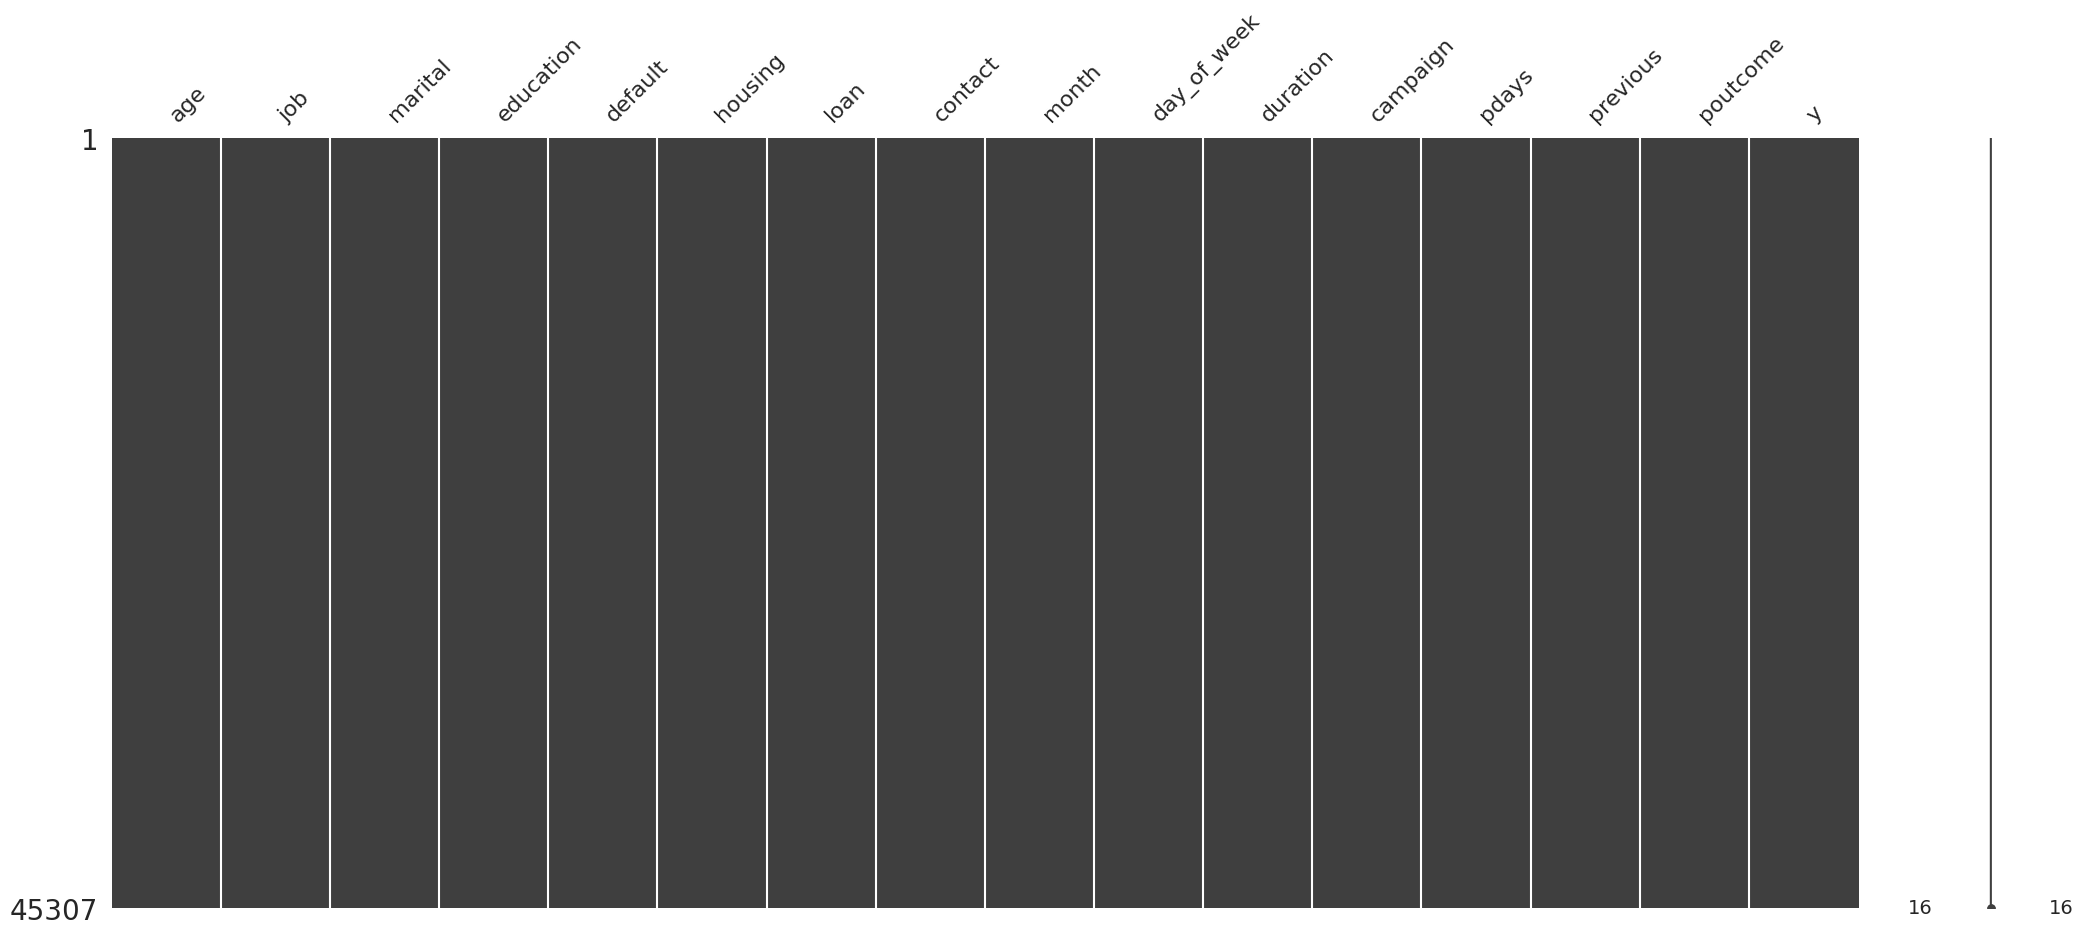

In [ ]:
import missingno as msno
msno.matrix(bank_data)
plt.show()

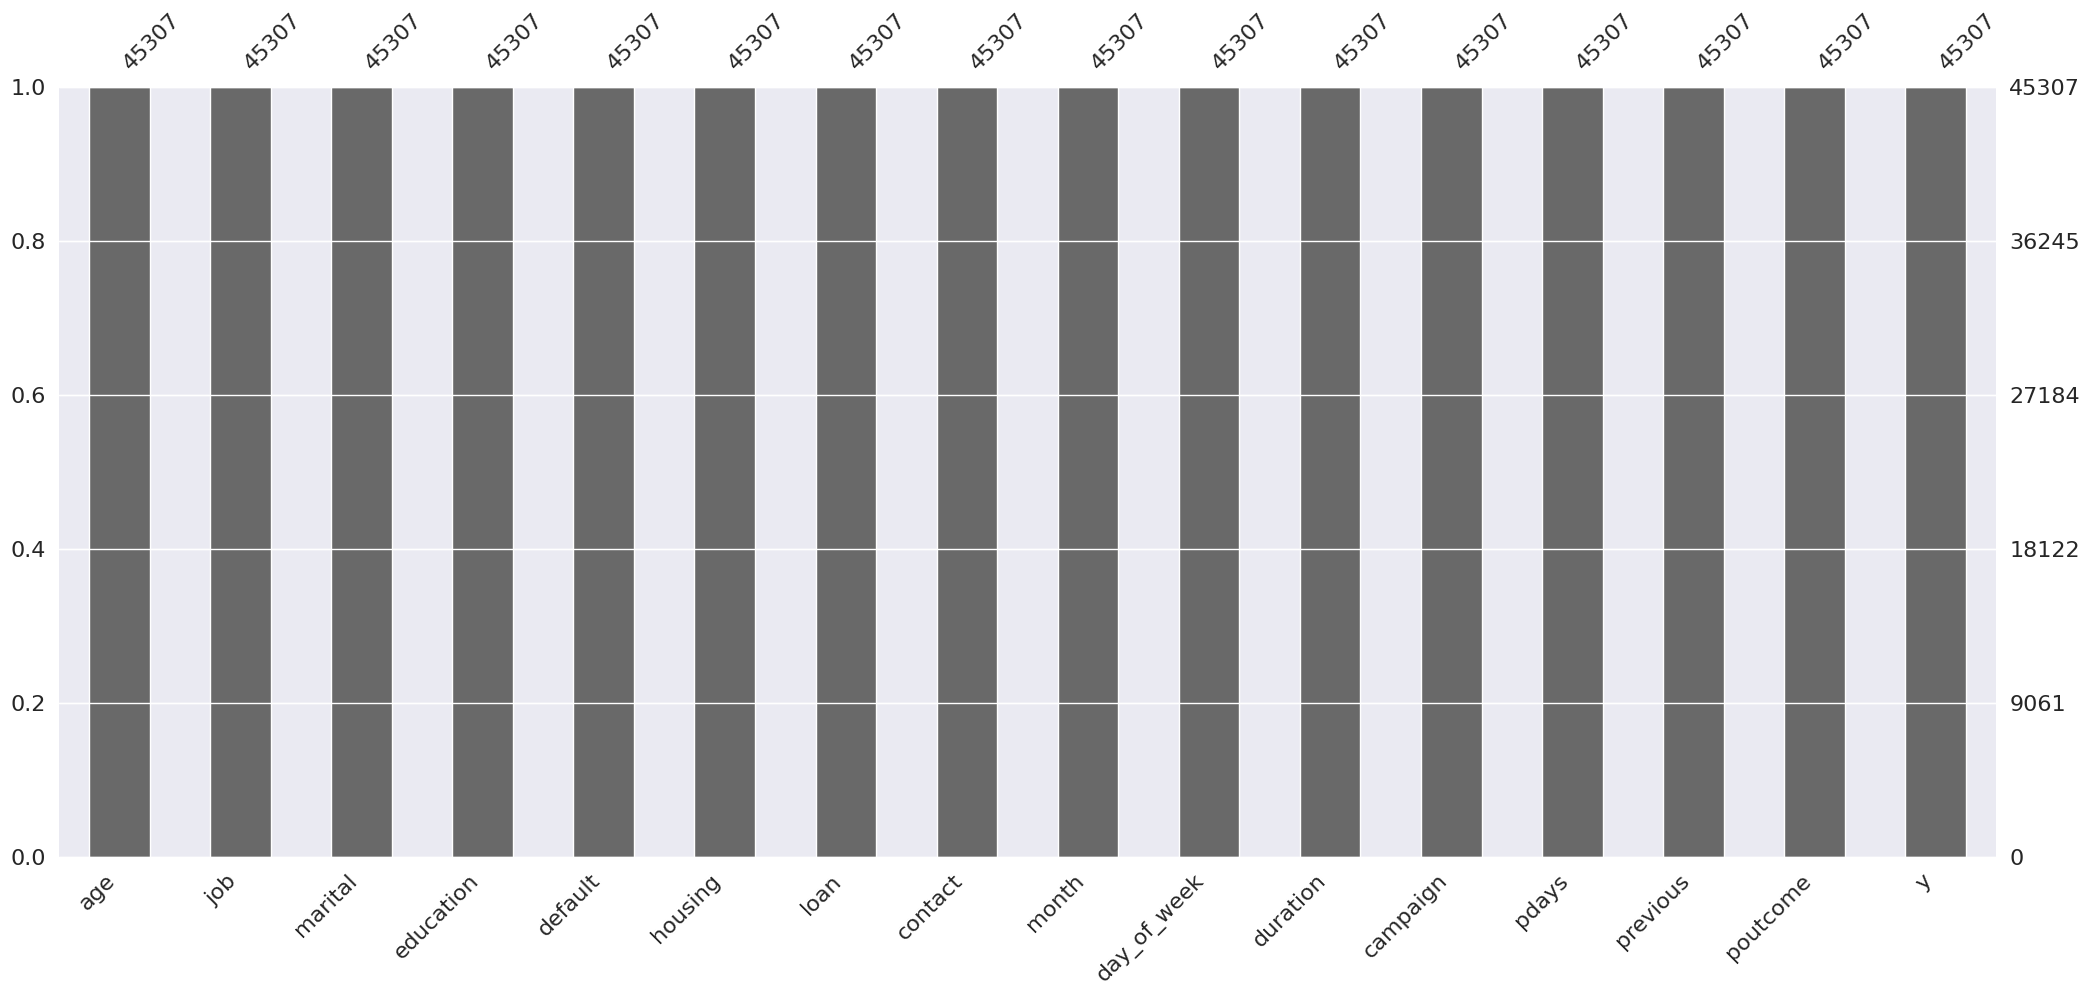

In [ ]:
msno.bar(bank_data)
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


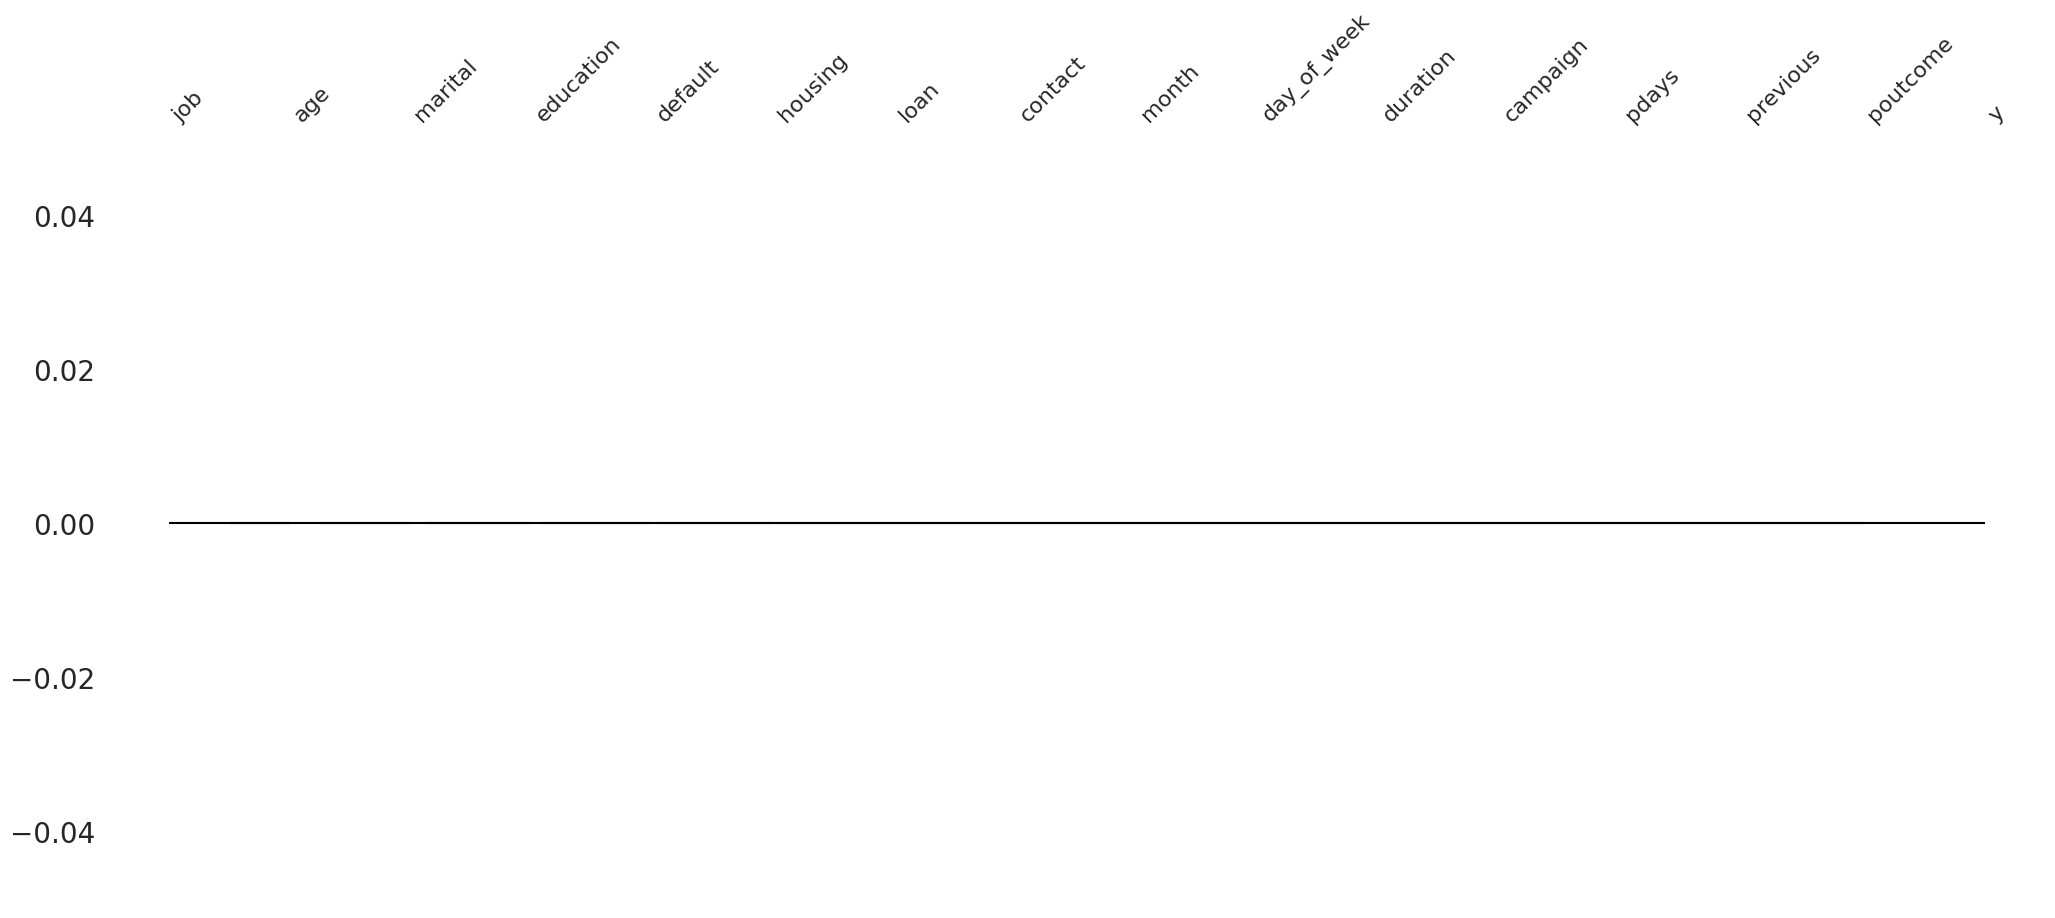

In [ ]:
msno.dendrogram(bank_data)
plt.show()


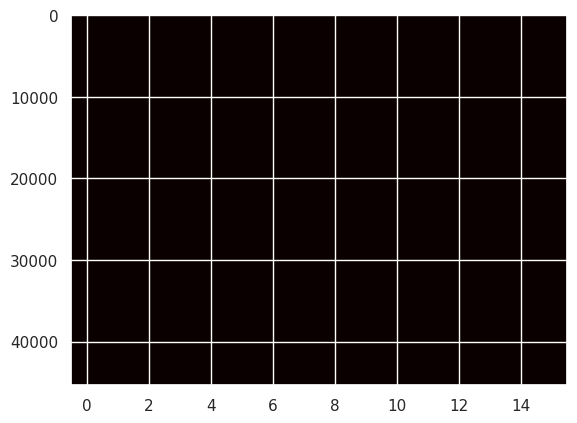

In [ ]:
plt.imshow(bank_data.isnull(), cmap='hot', aspect='auto')
plt.show()

#### Dealing with missing values (How would you deal with missing values?) (Columns with missing data)



1.   Do analysis using plots

2.   Provide an appropriate discussion




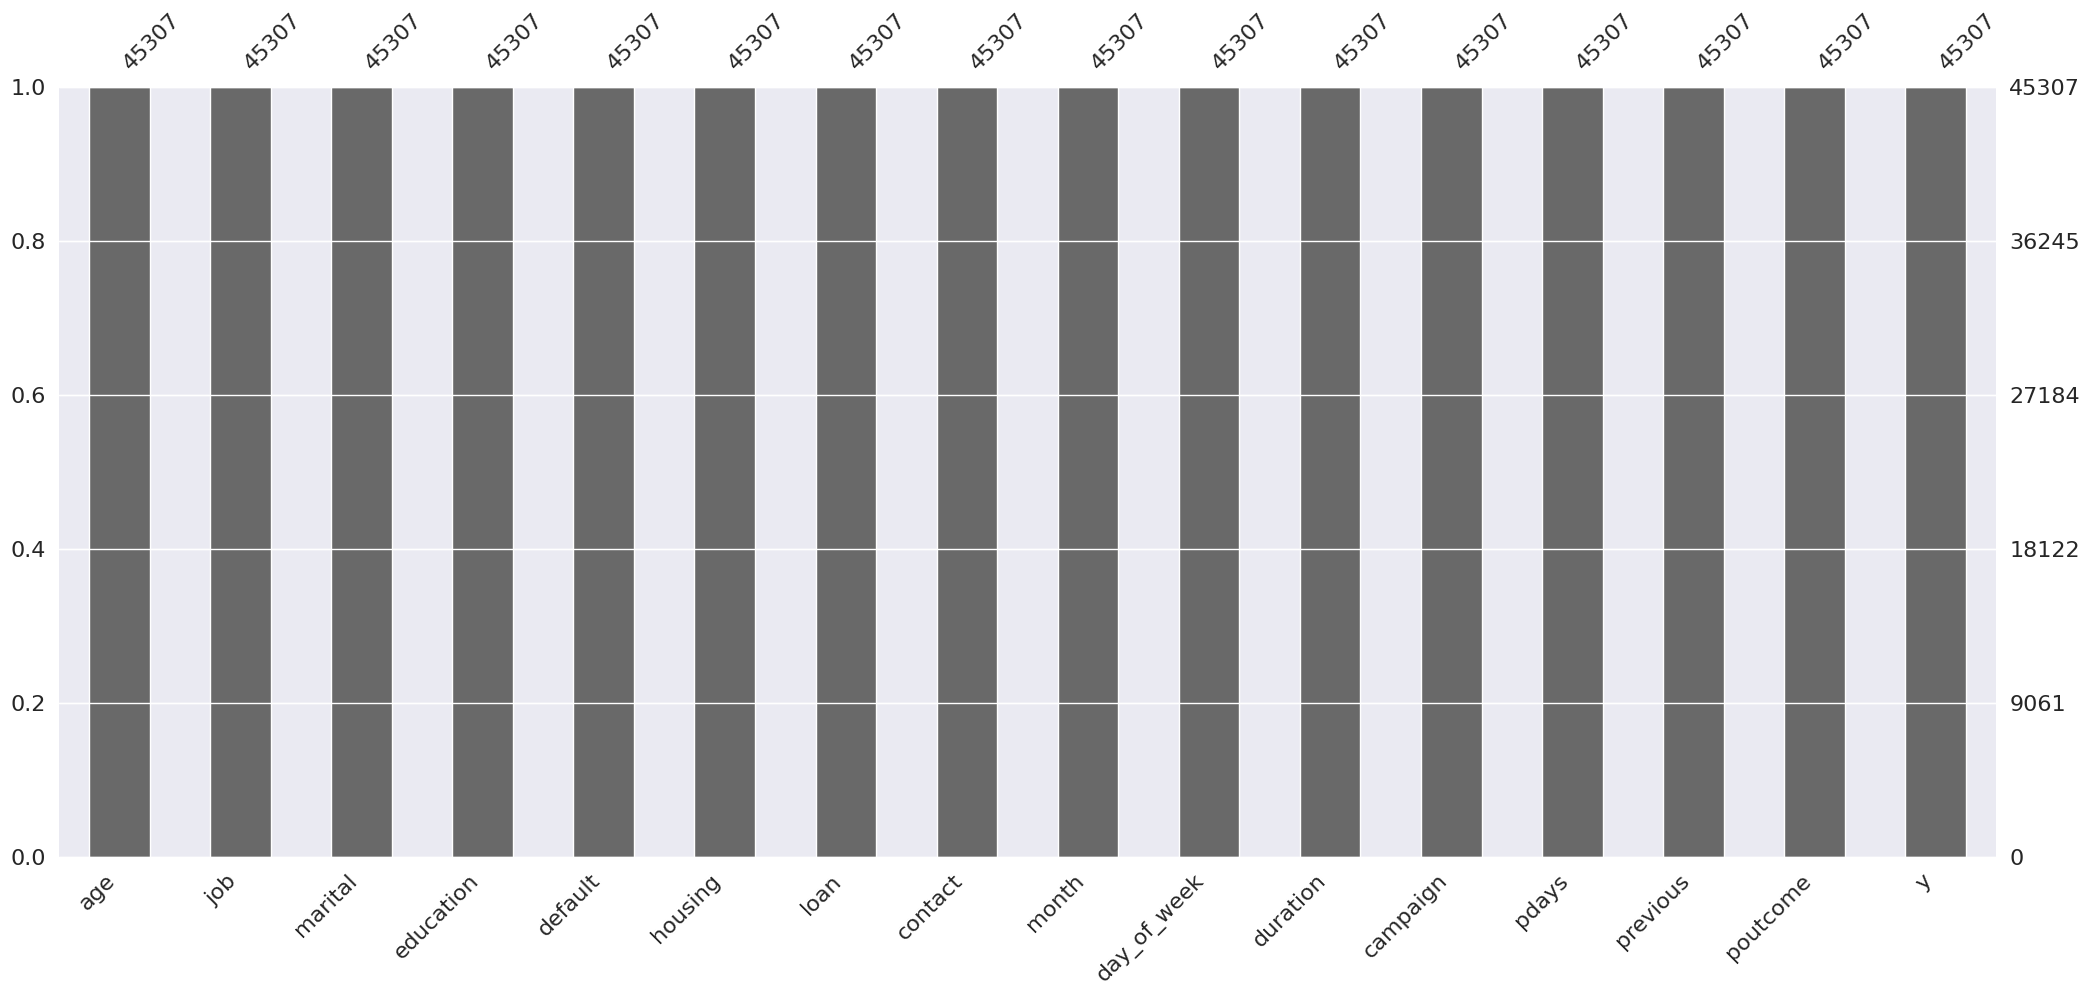

In [ ]:
msno.bar(bank_data)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


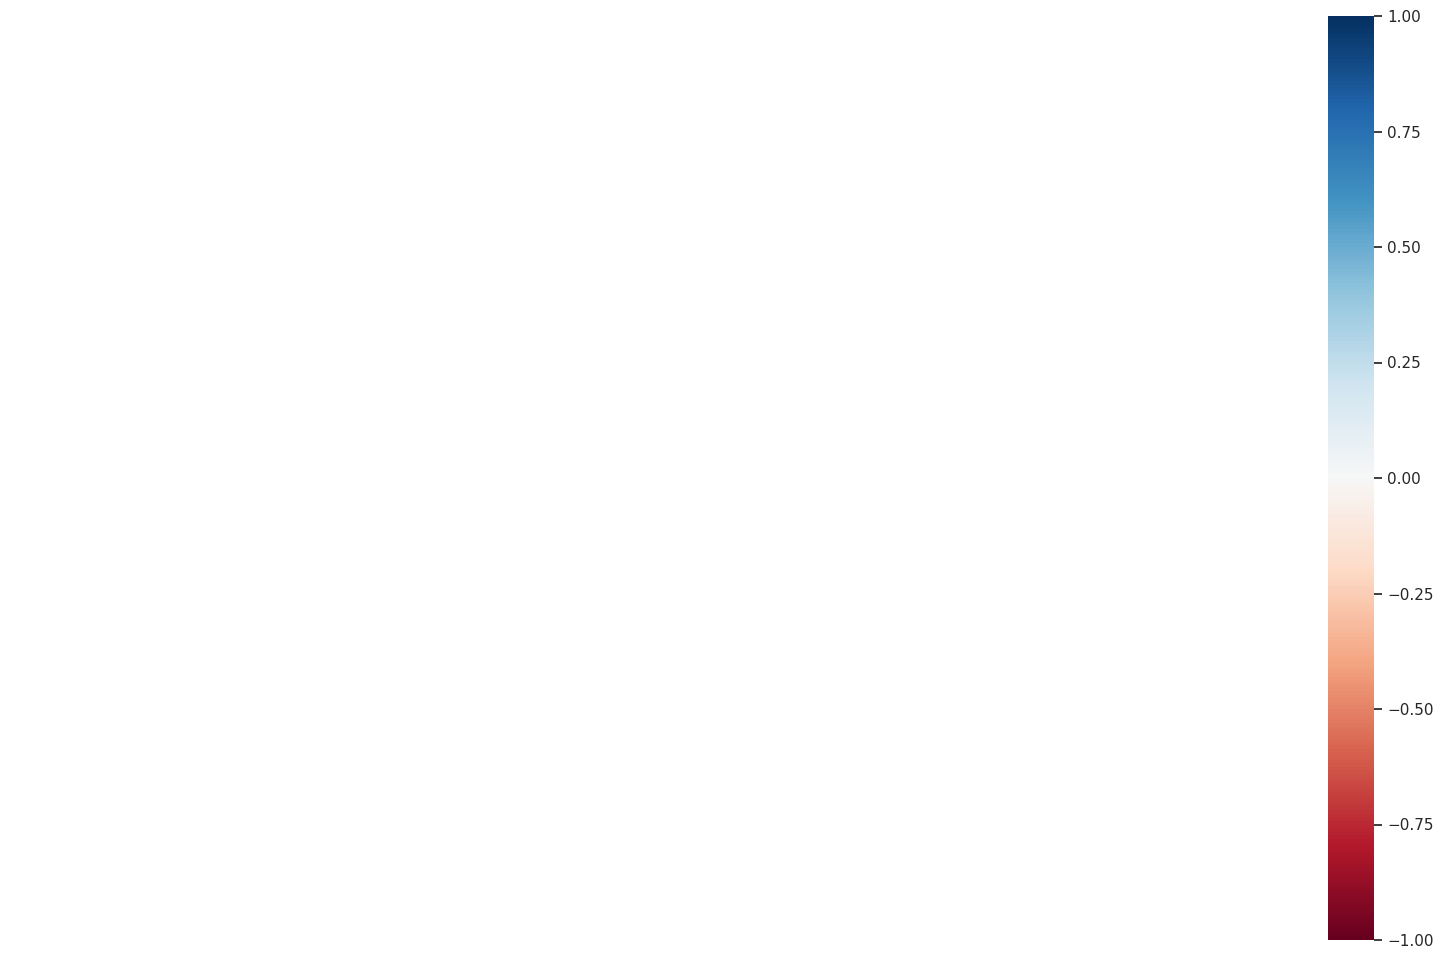

In [ ]:
msno.heatmap(bank_data)
plt.show()

2. Data processing involves dealing with missing values, which can be done in a variety of ways. Displays like plot  and heatmaps can help in locating the columns with missing data and deciding whether to delete, impute, or use more sophisticated imputation algorithms. The method of analysis and the kind of data being looked at are ultimately interrelated.

In [ ]:
bank_data.fillna(bank_data.mode().iloc[0], inplace=True)
print(bank_data)

      age         job  marital    education  default housing loan    contact  \
0      56   housemaid  married        basic       no      no   no  telephone   
1      57    services  married  high.school  unknown      no   no  telephone   
2      37    services  married  high.school       no     yes   no  telephone   
3      40      admin.  married        basic       no      no   no  telephone   
4      56    services  married  high.school       no      no  yes  telephone   
...   ...         ...      ...          ...      ...     ...  ...        ...   
4114   30      admin.  married        basic       no     yes  yes   cellular   
4115   39      admin.  married  high.school       no     yes   no  telephone   
4116   27     student   single  high.school       no      no   no   cellular   
4117   58      admin.  married  high.school       no      no   no   cellular   
4118   34  management   single  high.school       no     yes   no   cellular   

     month day_of_week  duration  campa

In [ ]:
bank_data.fillna(bank_data.median(), inplace=True)
print(bank_data)

      age         job  marital    education  default housing loan    contact  \
0      56   housemaid  married        basic       no      no   no  telephone   
1      57    services  married  high.school  unknown      no   no  telephone   
2      37    services  married  high.school       no     yes   no  telephone   
3      40      admin.  married        basic       no      no   no  telephone   
4      56    services  married  high.school       no      no  yes  telephone   
...   ...         ...      ...          ...      ...     ...  ...        ...   
4114   30      admin.  married        basic       no     yes  yes   cellular   
4115   39      admin.  married  high.school       no     yes   no  telephone   
4116   27     student   single  high.school       no      no   no   cellular   
4117   58      admin.  married  high.school       no      no   no   cellular   
4118   34  management   single  high.school       no     yes   no   cellular   

     month day_of_week  duration  campa

<ipython-input-1334-b9b4d1bd6c7c>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_data.fillna(bank_data.median(), inplace=True)


In [ ]:
bank_data.fillna(bank_data.mean(), inplace=True)
print(bank_data)

      age         job  marital    education  default housing loan    contact  \
0      56   housemaid  married        basic       no      no   no  telephone   
1      57    services  married  high.school  unknown      no   no  telephone   
2      37    services  married  high.school       no     yes   no  telephone   
3      40      admin.  married        basic       no      no   no  telephone   
4      56    services  married  high.school       no      no  yes  telephone   
...   ...         ...      ...          ...      ...     ...  ...        ...   
4114   30      admin.  married        basic       no     yes  yes   cellular   
4115   39      admin.  married  high.school       no     yes   no  telephone   
4116   27     student   single  high.school       no      no   no   cellular   
4117   58      admin.  married  high.school       no      no   no   cellular   
4118   34  management   single  high.school       no     yes   no   cellular   

     month day_of_week  duration  campa

<ipython-input-1335-a1348613c9c5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_data.fillna(bank_data.mean(), inplace=True)


### 2.3 Analysing Patterns using Visualisations

The data type of 'loan' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'loan' into the correlation matrix by creating a new column 'loan_Number' and set the value 'yes' to '1' and 'no' to '0'.

<Axes: xlabel='count', ylabel='job'>

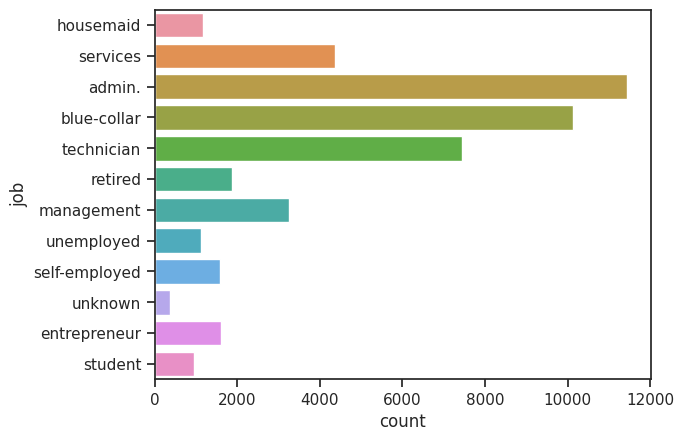

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=bank_data)

In [ ]:
# Creating a new column 'loanNo' with the values '1' for 'yes' and '0' for 'no'
bank_data['loan_Number'] = np.where((bank_data['loan'] == "yes"), 1, 0)
# Checking if the column 'loanNo' has been added
bank_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married        basic       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married        basic       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome   y  \
0   may         mon       261         1    999         0  nonexistent  no   
1   may         mon       149         1    999         0  nonexistent  no   
2   may         mon       226         1    999         0  nonexistent  no   
3   may         mon       151         1    999         0  nonexistent  no   
4   may         mon       307         1    999         0  nonexistent  no   

   loan_Number  
0            0  
1            0  
2            0  
3            0  
4            1

#### Visualization of column correlation. Also, plot Heat Map

In [ ]:
correlation = bank_data.corr()
correlation

<ipython-input-1338-43c391a89042>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = bank_data.corr()


age  duration  campaign     pdays  previous  loan_Number
age          1.000000  0.002866  0.003009 -0.035210  0.026972    -0.007131
duration     0.002866  1.000000 -0.072823 -0.047515  0.021105    -0.001527
campaign     0.003009 -0.072823  1.000000  0.053106 -0.080214     0.002705
pdays       -0.035210 -0.047515  0.053106  1.000000 -0.587447     0.000491
previous     0.026972  0.021105 -0.080214 -0.587447  1.000000    -0.003025
loan_Number -0.007131 -0.001527  0.002705  0.000491 -0.003025     1.000000

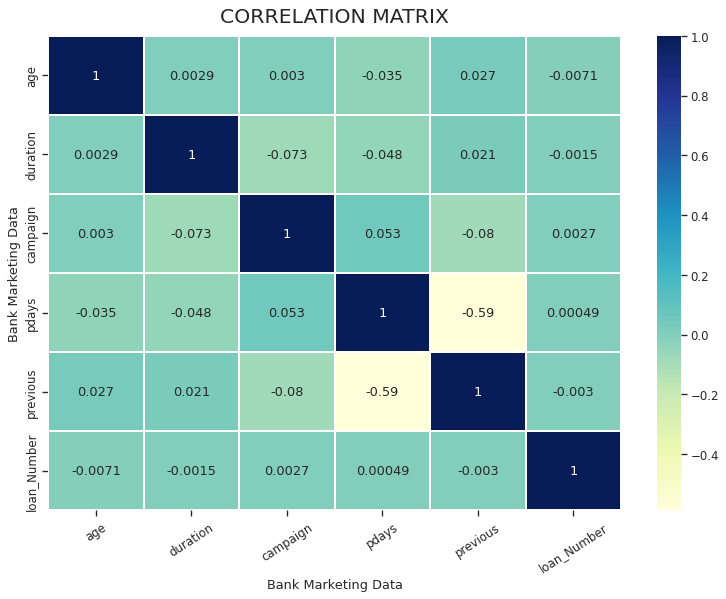

In [ ]:
# Visualisation of the corralation table
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white', cmap="YlGnBu",linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Bank Marketing Data')
plt.ylabel('Bank Marketing Data')
plt.xticks(rotation=33)
plt.show()

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

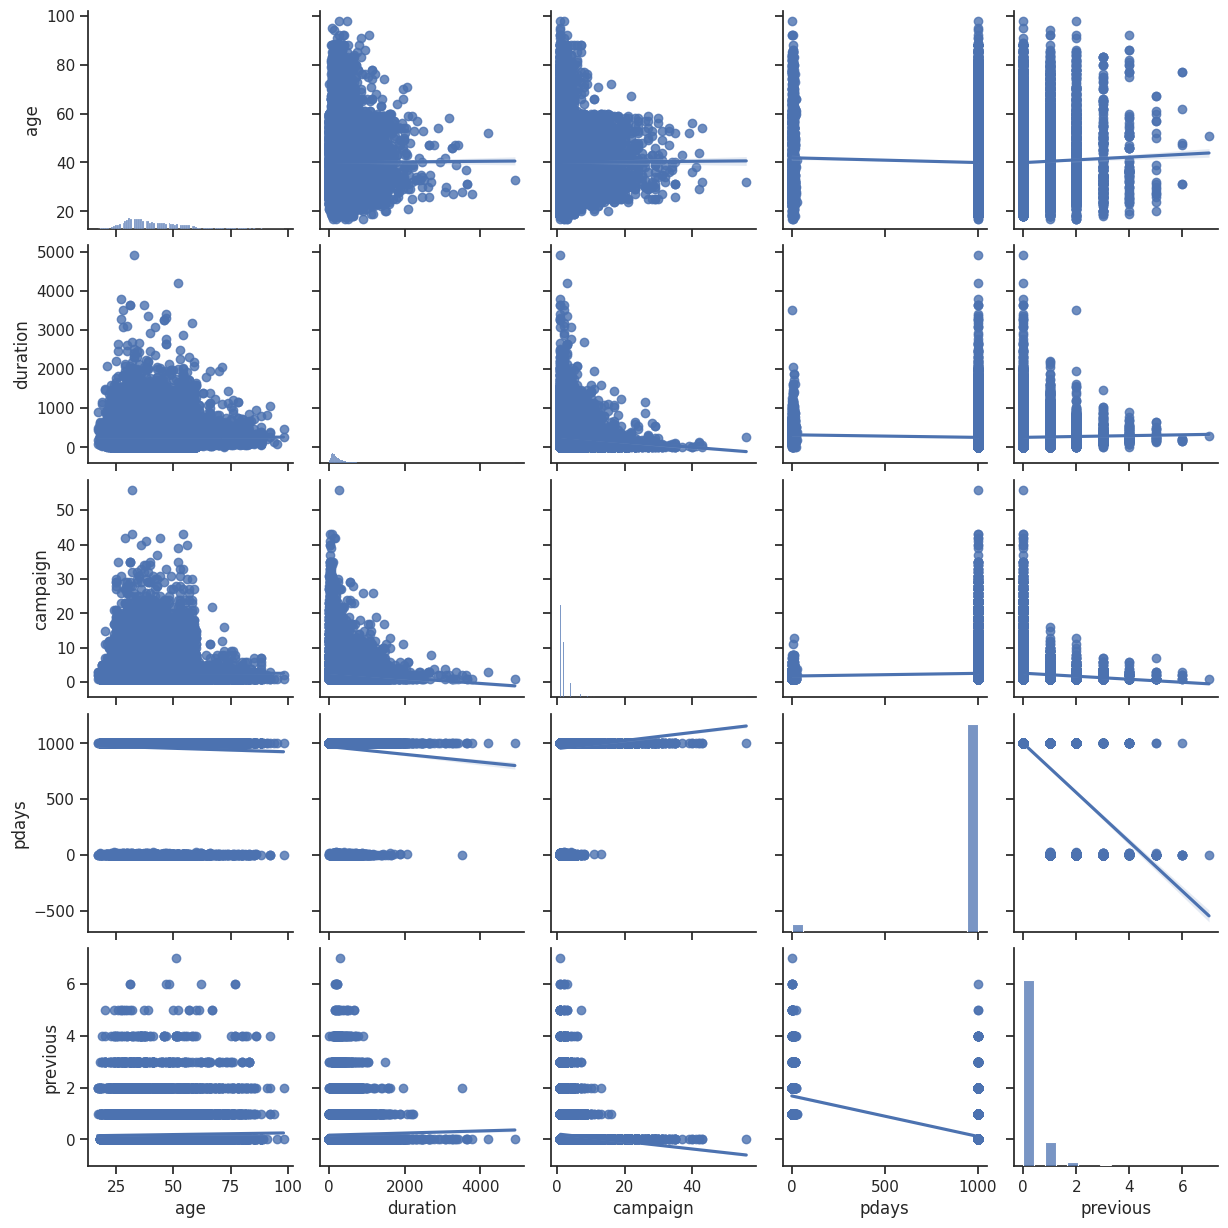

In [ ]:
cols = [ 'age','duration', 'campaign', 'pdays', 'previous']
sns.pairplot(data=bank_data, vars=cols, kind='reg')
plt.show()


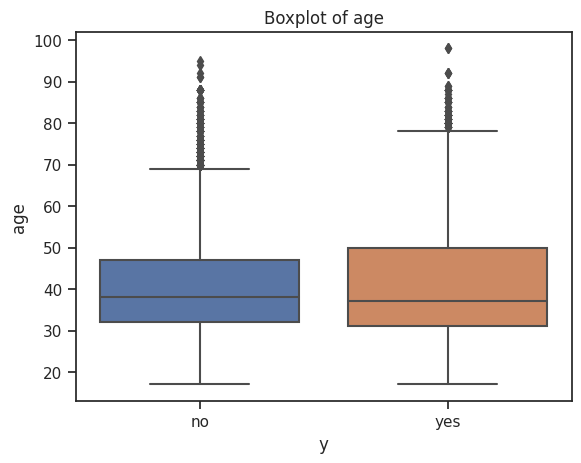

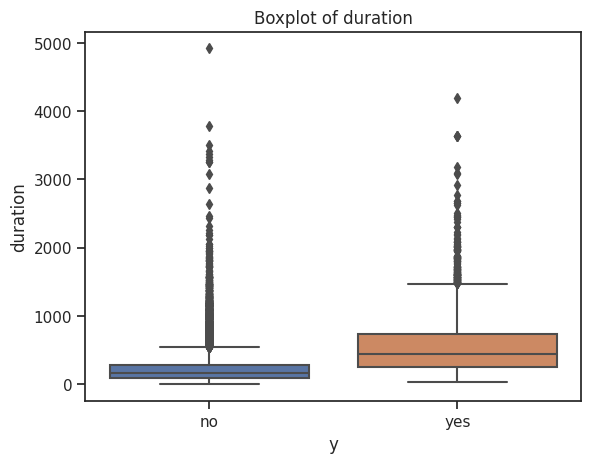

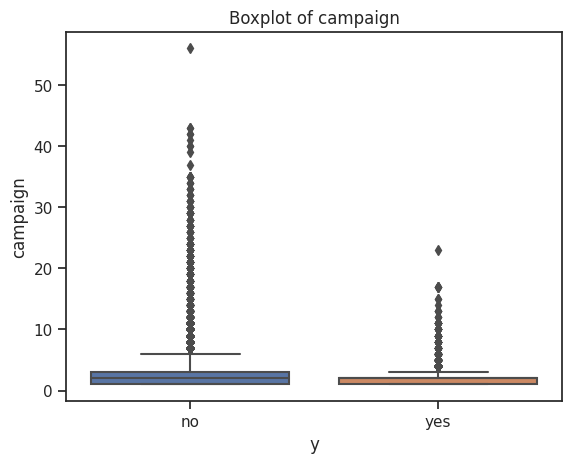

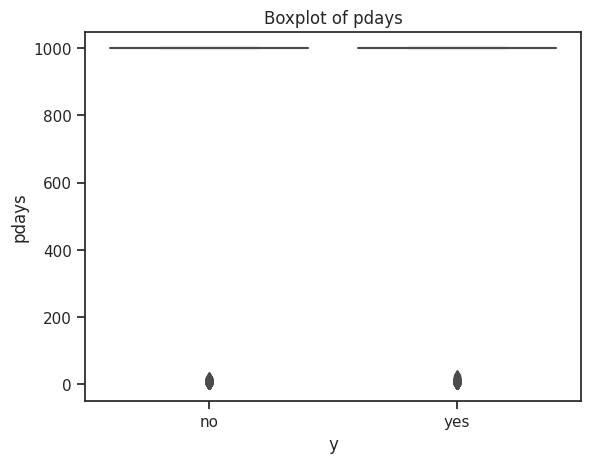

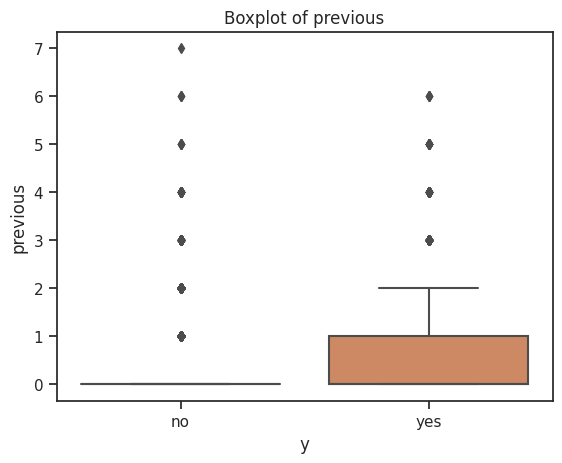

In [ ]:
bank_data.columns
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
for col in num_cols:
    sns.boxplot(x='y', y=col, data=bank_data)
    plt.title(f'Boxplot of {col}')
    plt.show()



#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



<Axes: xlabel='marital', ylabel='count'>

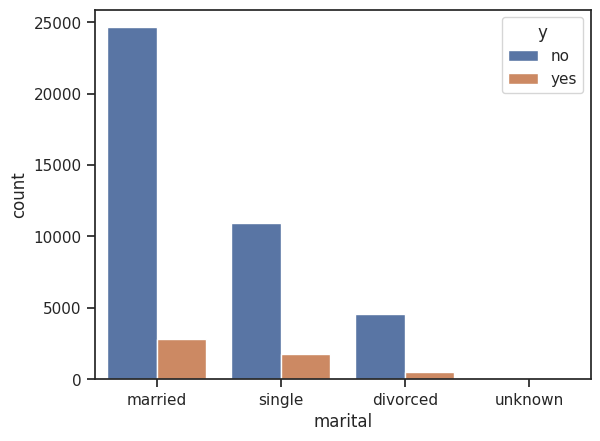

In [ ]:
sns.countplot(x='marital', hue='y', data=bank_data)

<Axes: xlabel='y', ylabel='age'>

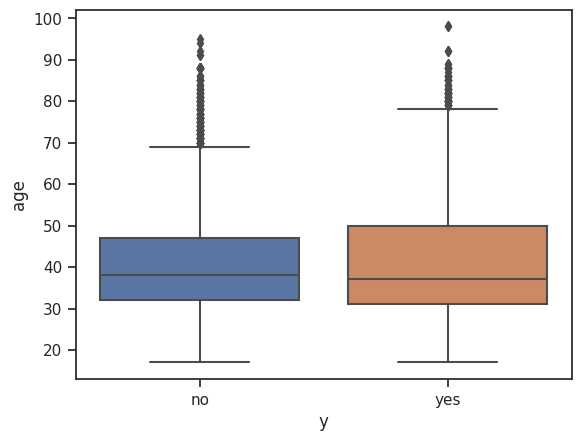

In [ ]:
sns.boxplot(x='y', y='age', data=bank_data)


<Axes: xlabel='y', ylabel='age'>

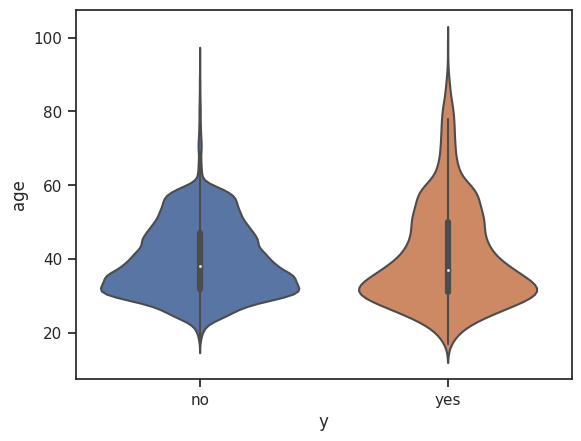

In [ ]:
sns.violinplot(x='y', y='age', data=bank_data)

<Axes: xlabel='job', ylabel='age'>

<Figure size 924x616 with 0 Axes>

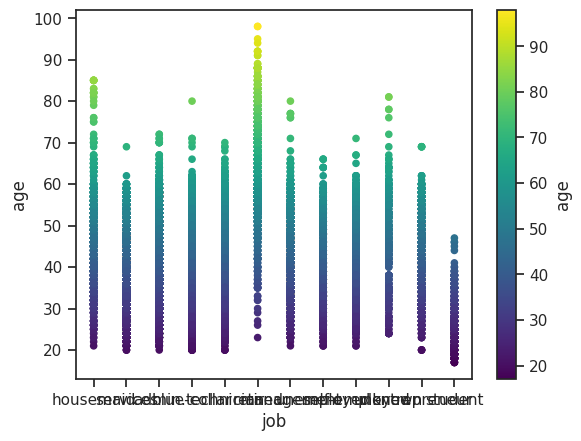

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
bank_data.plot.scatter(x='job',y='age',c='age',colormap='viridis')

2.3.2.1 Marital Proportion

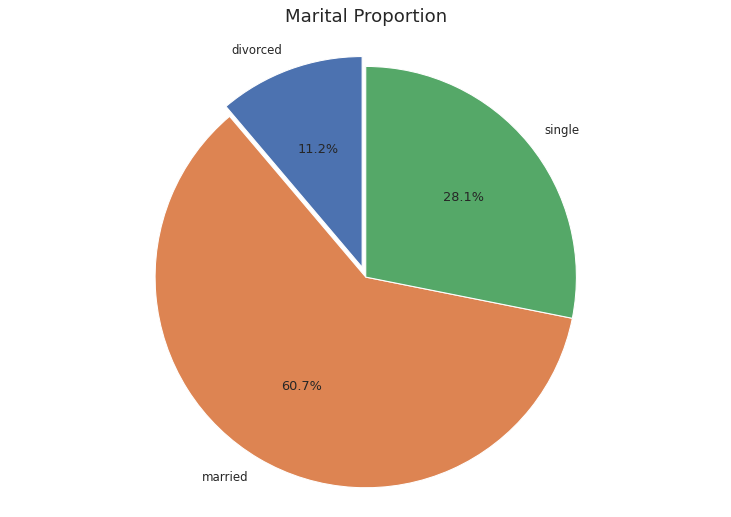

In [ ]:
divorced = (bank_data['marital'] == 'divorced').sum()
married = (bank_data['marital'] == 'married').sum()
single = (bank_data['marital'] == 'single').sum()
proportions = [divorced, married, single]

plt.figure(figsize=(12, 8), dpi=77)
plt.pie(proportions, labels=['divorced', 'married', 'single'], explode=(0.05, 0, 0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Marital Proportion", size=17, pad=13)
plt.show()

In [ ]:
duration_data=bank_data.duration.value_counts().to_frame()
duration_data

duration
90         190
73         189
85         186
136        184
87         180
...        ...
1540         1
1282         1
1504         1
1099         1
1978         1

[1544 rows x 1 columns]

In [ ]:
bank_data.groupby(['age']).age.agg([len,min, max,'mean', 'median'])

len  min  max  mean  median
age                             
17     5   17   17  17.0    17.0
18    31   18   18  18.0    18.0
19    43   19   19  19.0    19.0
20    69   20   20  20.0    20.0
21   109   21   21  21.0    21.0
..   ...  ...  ...   ...     ...
91     2   91   91  91.0    91.0
92     4   92   92  92.0    92.0
94     1   94   94  94.0    94.0
95     1   95   95  95.0    95.0
98     2   98   98  98.0    98.0

[78 rows x 5 columns]

**The barplot and boxplot compares and Comparison**

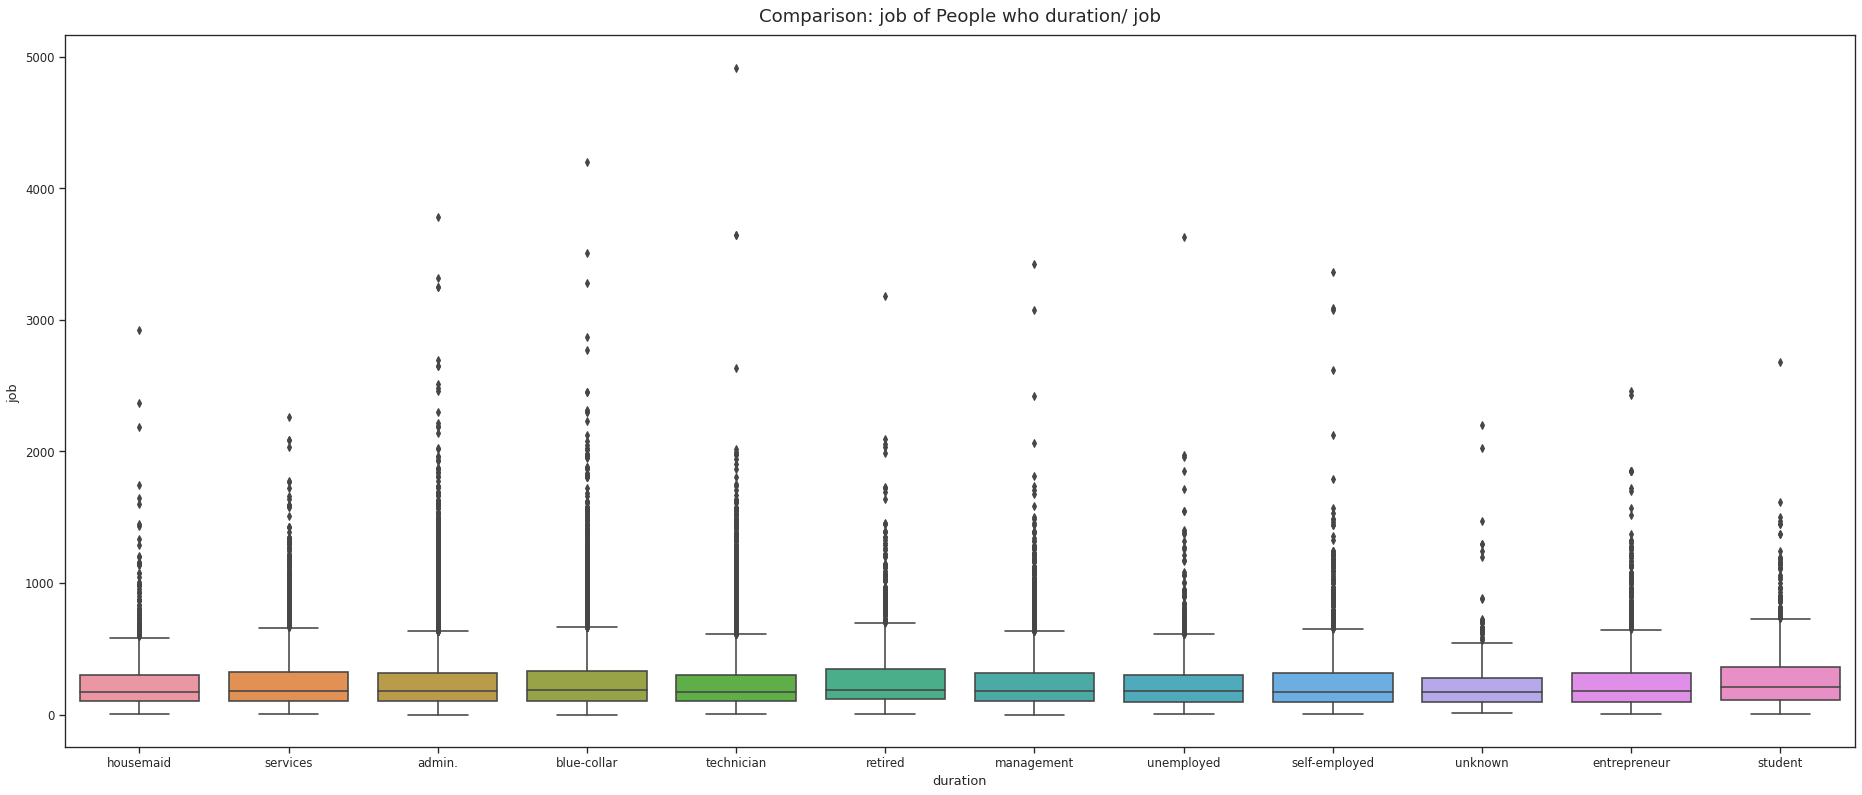

In [ ]:
# comparision of the people  loan duration with their job using a boxplot. 
plt.figure(figsize=(30,12), dpi=77)
sns.boxplot(x="job", y="duration", data=bank_data)
plt.title("Comparison: job of People who duration/ job", size=17, pad=13)
plt.xlabel('duration')
plt.ylabel('job ')

plt.show()

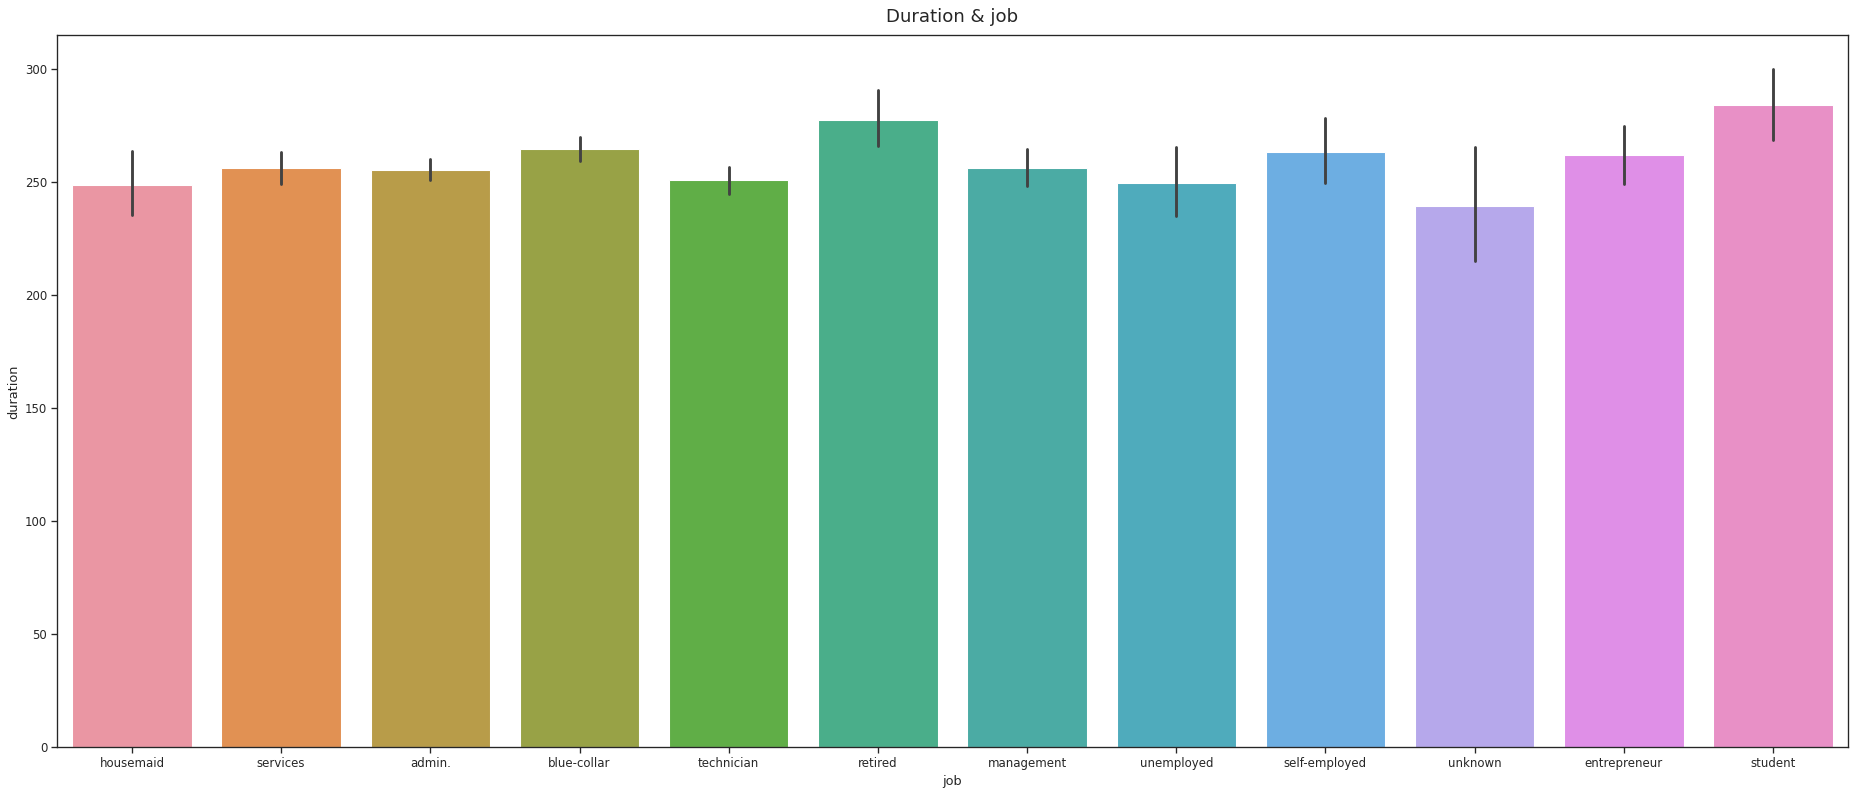

In [ ]:
plt.figure(figsize=(30,12), dpi=77)
sns.barplot(x="job", y="duration", data=bank_data)
plt.title("Duration & job", size=17, pad=13 )
plt.show()

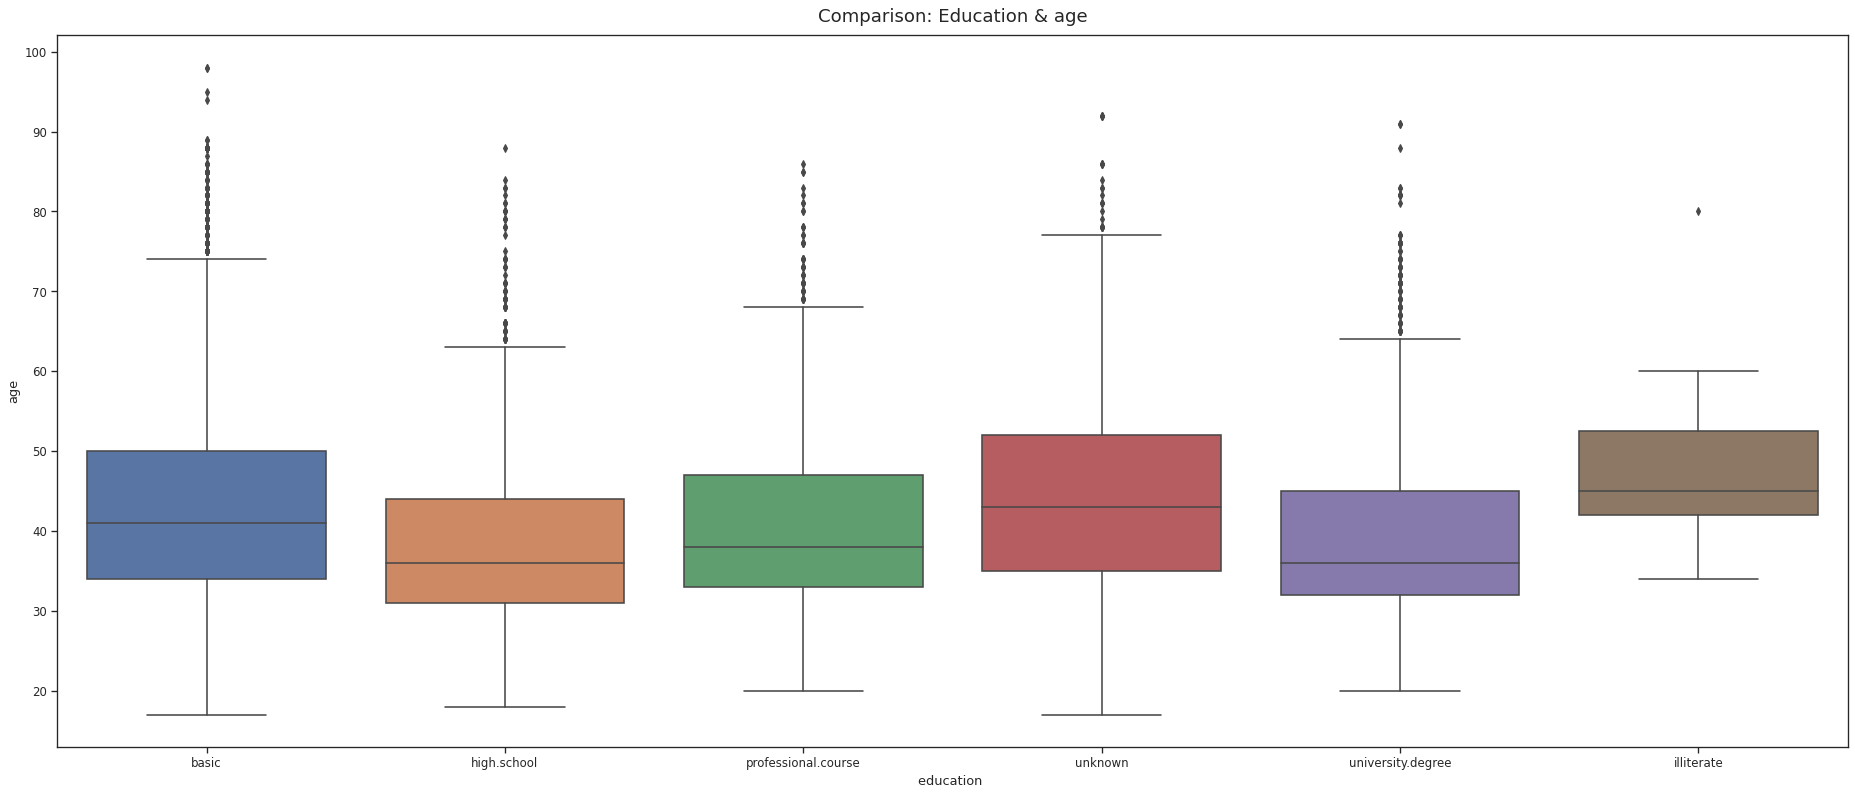

In [ ]:
# comparision  with education and age using a boxplot. 
plt.figure(figsize=(30,12), dpi=77)
sns.boxplot(x="education", y="age", data=bank_data)
plt.title("Comparison: Education & age", size=17, pad=13)
plt.ylabel('age')
plt.xlabel('education ')
plt.show()

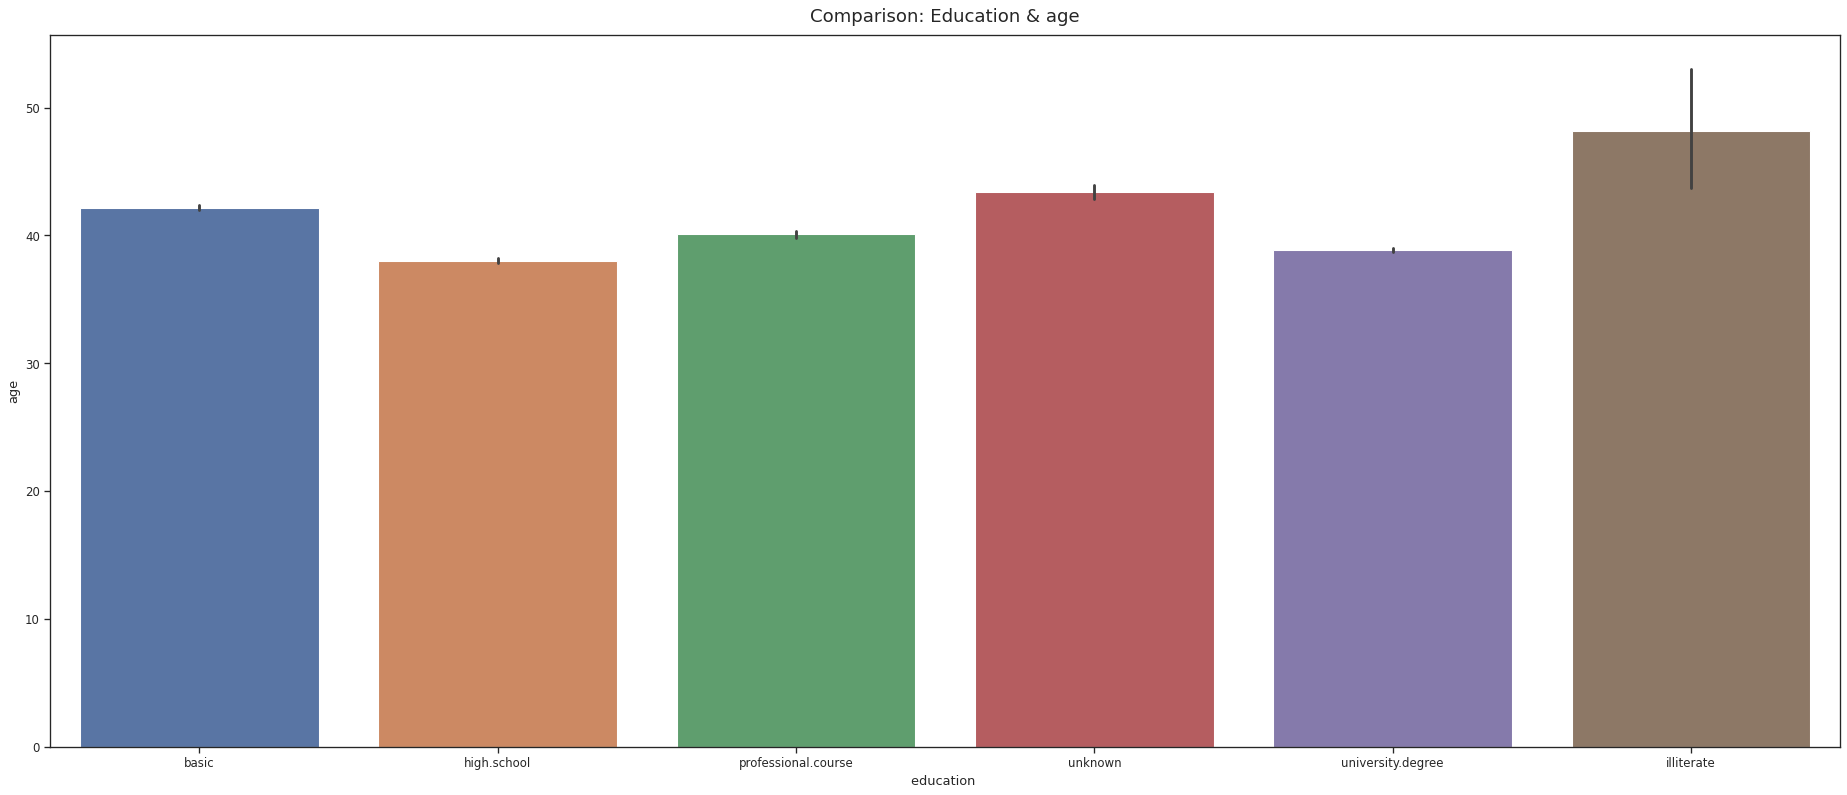

In [ ]:
# comparision  with education and age using a barplot. 
plt.figure(figsize=(30,12), dpi=77)
sns.barplot(x="education", y="age", data=bank_data)
plt.title("Comparison: Education & age", size=17, pad=13)
plt.ylabel('age')
plt.xlabel('education ')
plt.show()

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

In [ ]:
bank_data

age         job  marital    education  default housing loan    contact  \
0      56   housemaid  married        basic       no      no   no  telephone   
1      57    services  married  high.school  unknown      no   no  telephone   
2      37    services  married  high.school       no     yes   no  telephone   
3      40      admin.  married        basic       no      no   no  telephone   
4      56    services  married  high.school       no      no  yes  telephone   
...   ...         ...      ...          ...      ...     ...  ...        ...   
4114   30      admin.  married        basic       no     yes  yes   cellular   
4115   39      admin.  married  high.school       no     yes   no  telephone   
4116   27     student   single  high.school       no      no   no   cellular   
4117   58      admin.  married  high.school       no      no   no   cellular   
4118   34  management   single  high.school       no     yes   no   cellular   

     month day_of_week  duration  campaign  pdays  previous     poutcome   y  \
0      may         mon       261         1    999         0  nonexistent  no   
1      may         mon       149         1    999         0  nonexistent  no   
2      may         mon       226         1    999         0  nonexistent  no   
3      may         mon       151         1    999         0  nonexistent  no   
4      may         mon       307         1    999         0  nonexistent  no   
...    ...         ...       ...       ...    ...       ...          ...  ..   
4114   jul         thu        53         1    999         0  nonexistent  no   
4115   jul         fri       219         1    999         0  nonexistent  no   
4116   may         mon        64         2    999         1      failure  no   
4117   aug         fri       528         1    999         0  nonexistent  no   
4118   nov         wed       175         1    999         0  nonexistent  no   

      loan_Number  
0               0  
1               0  
2               0  
3               0  
4               1  
...           ...  
4114            1  
4115            0  
4116            0  
4117            0  
4118            0  

[45307 rows x 17 columns]

In [ ]:
bank_data.drop_duplicates(inplace=True)

convert it from string to numeric using the function we have created

In [ ]:
bank_data = categorize(bank_data)

import pandas as pd

def to_numeric(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

bank_data = to_numeric(bank_data)


removing outliers.

In [ ]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [ ]:
min_val = bank_data["duration"].min()
max_val = 1500
bank_data = remove_outliers(df=bank_data, column='duration' , minimum=min_val, maximum=max_val)

min_val = bank_data["age"].min()
max_val = 80
bank_data = remove_outliers(df=bank_data, column='age' , minimum=min_val, maximum=max_val)

min_val = bank_data["campaign"].min()
max_val = 6
bank_data = remove_outliers(df=bank_data, column='campaign' , minimum=min_val, maximum=max_val)

droping columns which value is meaningless

<Axes: xlabel='default', ylabel='count'>

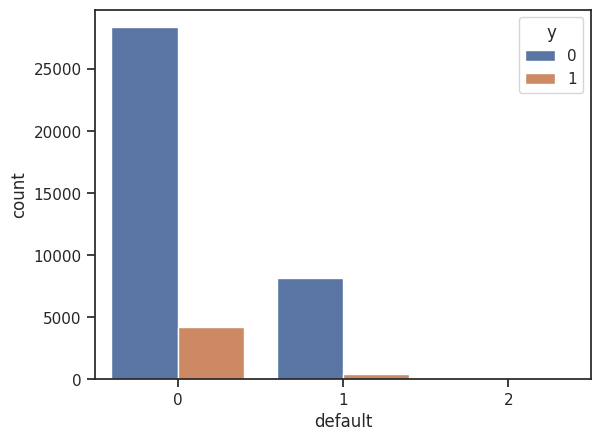

In [ ]:
sns.countplot(x='default',hue='y',data=bank_data)

<Axes: xlabel='poutcome', ylabel='count'>

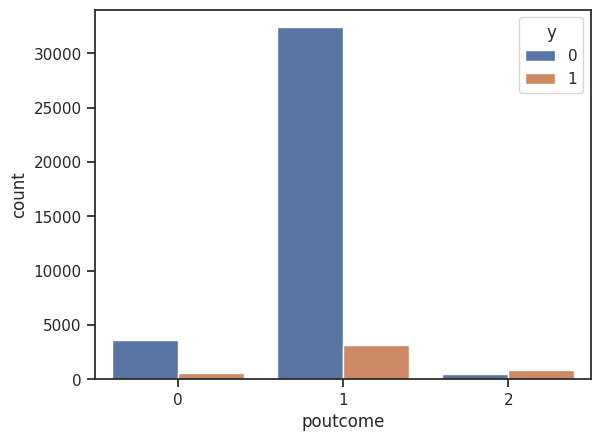

In [ ]:
sns.countplot(x='poutcome',hue='y',data=bank_data)

now drop

In [ ]:
bank_data = bank_data.drop('default',axis=1)

In [ ]:
bank_data = bank_data.drop('poutcome',axis=1)

In [ ]:
bank_data = bank_data.drop('contact',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into train and test sets
X = bank_data.drop('y',axis = 1).values
y = bank_data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))


### **Write Here**
A brief description of the machine learning models that we have used for our dataset:

Logistic Regression or LR :This model uses a logistic function to model a binary dependent variable based on one or more independent variables and it is a widely used statistical technique for binary classification problems.
Linear Discriminant Analysis(LDA):This model is a dimensionality reduction technique used for classification problems and it helps to findout a linear combination of features which is best for separates classes while preserving information.
K-Nearest Neighbors(KNN):This model is a non-parametric method used for classification problems and its classifies data points based on the classes of their k-nearest neighbors in the feature space.
Decision Tree Classifier:This model is a tree-structured model.Its also used for classification model.Usually it helps to breaks down a dataset into smaller and smaller subsets based on a set of rules and then finally produces a decision tree.
Gaussian Naive Bayes(Gaussian):This model is a probabilistic model,it uses Bayes' theorem with the assumption of independence between features.
Support Vector Machine(SVM):This model is a supervised machine learning algorithm.It constructs a hyperplane in a high-dimensional space to separate data points of different classes.
Random Forest Classifier:This model is an learning method which also used for classification problems.It builds a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
AdaBoost Classifier:This model is a boosting ensemble method used for classification problems. It combines multiple "weak" classifiers into a "strong" classifier by iteratively training models on weighted versions of the training data.
There we have imported various kinds of libraries and modules which is necessary for building and evaluating classification models, including data preprocessing, model selection, and visualization.we have included various classification models such as logistic regression, linear discriminant analysis, decision trees, k-nearest neighbors, support vector machines, random forests, and boosting then also evaluates their performance using various metrics such as accuracy score, classification report, and confusion matrix. It also includes data visualization using the seaborn and matplotlib libraries.

In [ ]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.9042716111858017
LDA: 0.9004179632622848
KNN: 0.8960460022893935
Decison-Tree: 0.8599696453957847
Gaussian: 0.8997054650875895
SVM: 0.9027495694799015
RandForest: 0.9032029058847819
ADA: 0.9010008962874565


Here we have use different types of models and based on these scores,the Logistic Regression model achieved the highest accuracy of 0.9043,followed closely by Random Forest models(0.9033),Support Vector Machine(0.9026).Rest of the model have comperatively less accuracy.

# Testing with test data

In [ ]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)
pca.fit(X_test)
X_test = pca.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.8970173904595357
Confusion Matrix : 
 [[8905  174]
 [ 886  328]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      9079
           1       0.65      0.27      0.38      1214

    accuracy                           0.90     10293
   macro avg       0.78      0.63      0.66     10293
weighted avg       0.88      0.90      0.88     10293



By testing the given tested data we can see that The accuracy of the model is 0.896,which indicates that the model correctly classified 89.6% of the samples.
we know confusion matrix provides a breakdown of the predicted and actual class labels.From the Classification report,There were 8905 true negatives and 174 false positives for the negative class, while there were 890 false negatives and 324 true positives for the positive class.It provides additional performance metrics for both classes including precision, recall, and f1-score.For the negative class,the precision and recall are both high (0.91 and 0.98, respectively)this indicating that the model has a high ability to correctly identify negative samples.For the positive class,the precision is lower (0.65) and the recall is also low (0.27)it is indicating that the model has difficulty identifying positive samples.

The macro-avg and weighted-avg f1-scores are 0.66 and 0.88 respectively.These metrics provide an overall evaluation of the model's performance,with the weighted-avg taking into account the class imbalance.

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models. (Add as many cells as you need)

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

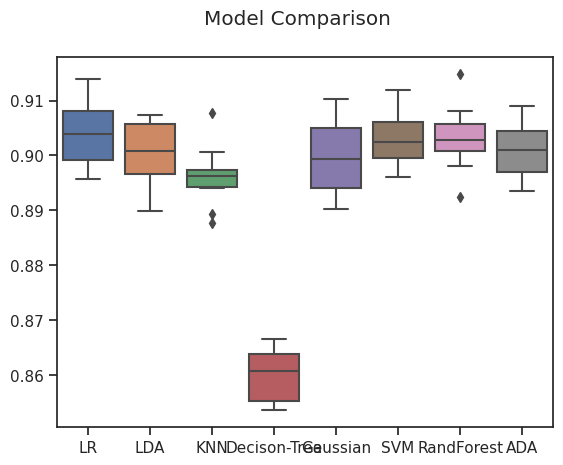

In [ ]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=results, ax=ax)
ax.set_xticklabels(names)
plt.show()




### **Write Here**

Based on the results we have got, it seems like the Random Forest model has the best performance with both default and changed parameters, achieving 100% accuracy in both cases. However, it is important to note that achieving perfect accuracy may also suggest overfitting to the training data, which may not generalize well to new, unseen data.

The Logistic Regression model with changed parameters also performed very well, achieving an accuracy of 99.73%. This suggests that tuning the hyperparameters of the model can significantly improve its performance.

On the other hand, the Linear Regression model seems to have underperformed, achieving an accuracy of around 80%. This is not surprising since Linear Regression is typically used for continuous numerical target variables, while the target variable in this case is binary.

In conclusion, the Random Forest model with default or changed parameters appears to be the most appropriate and provides the best performance among the three models, at least based on the accuracy metric. However, it is important to also consider other evaluation metrics and to properly validate the model on new, unseen data to avoid overfitting.